> the data will drive us.

# 1. Data Exploration and Visualization:
  - Summary Statistics and Data Distribution.
  - Demographics Analysis.
  - Product Purchases and Preferences.
  - campigns
  - overall correlation.
  - what is the kind of the distributions ?

## Summary Statistics and Data Distribution.

### constant

In [1]:
# constant 
RAW_DATA = "../data/raw/marketing_campaign.csv" 


### Libraries


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats
from fitter import Fitter


# set the max columns to none
pd.set_option('display.max_columns', None)

### Read the data

In [3]:
data = pd.read_csv(RAW_DATA, sep="\t").drop(['ID'],axis=1)

### Exploration

In [4]:
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
data.shape

(2240, 28)

In [6]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain  Z_CostContact  Z_Revenue     Response  
count  2240.000000         2240.0     2240.0  2240.000000  
mean      0.009375            3.0       11.0     0.149107  
std       0.096391            0.0        0.0     0.356274  
min       0.000000            3.0       11.0     0.000000  
25%       0.000000            3.0       11.0     0.000000  
50%       0.000000            3.0       11.0     0.000000  
75%       0.000000            3.0       11.0     0.000000  
max       1.000000            3.0       11.0     1.000000

 - income: may has a outliers
 - mean of Kidhome and Teenhome is less than one: may be most of customers are singles ?!
 - Response: in the dataset description is the last campaign but i think it is something else.

In [9]:
for column in data.select_dtypes(include=['object']).columns:
    print(f'{column}: {data[column].nunique()} unique values')


Education: 5 unique values
Marital_Status: 8 unique values
Dt_Customer: 663 unique values


- Marital_Status is 8 unique values !
- Dt_Customer need to convert to date

In [10]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- income has 24 null values, drop or impute ( mean, median or ML for impute)

## Distributions

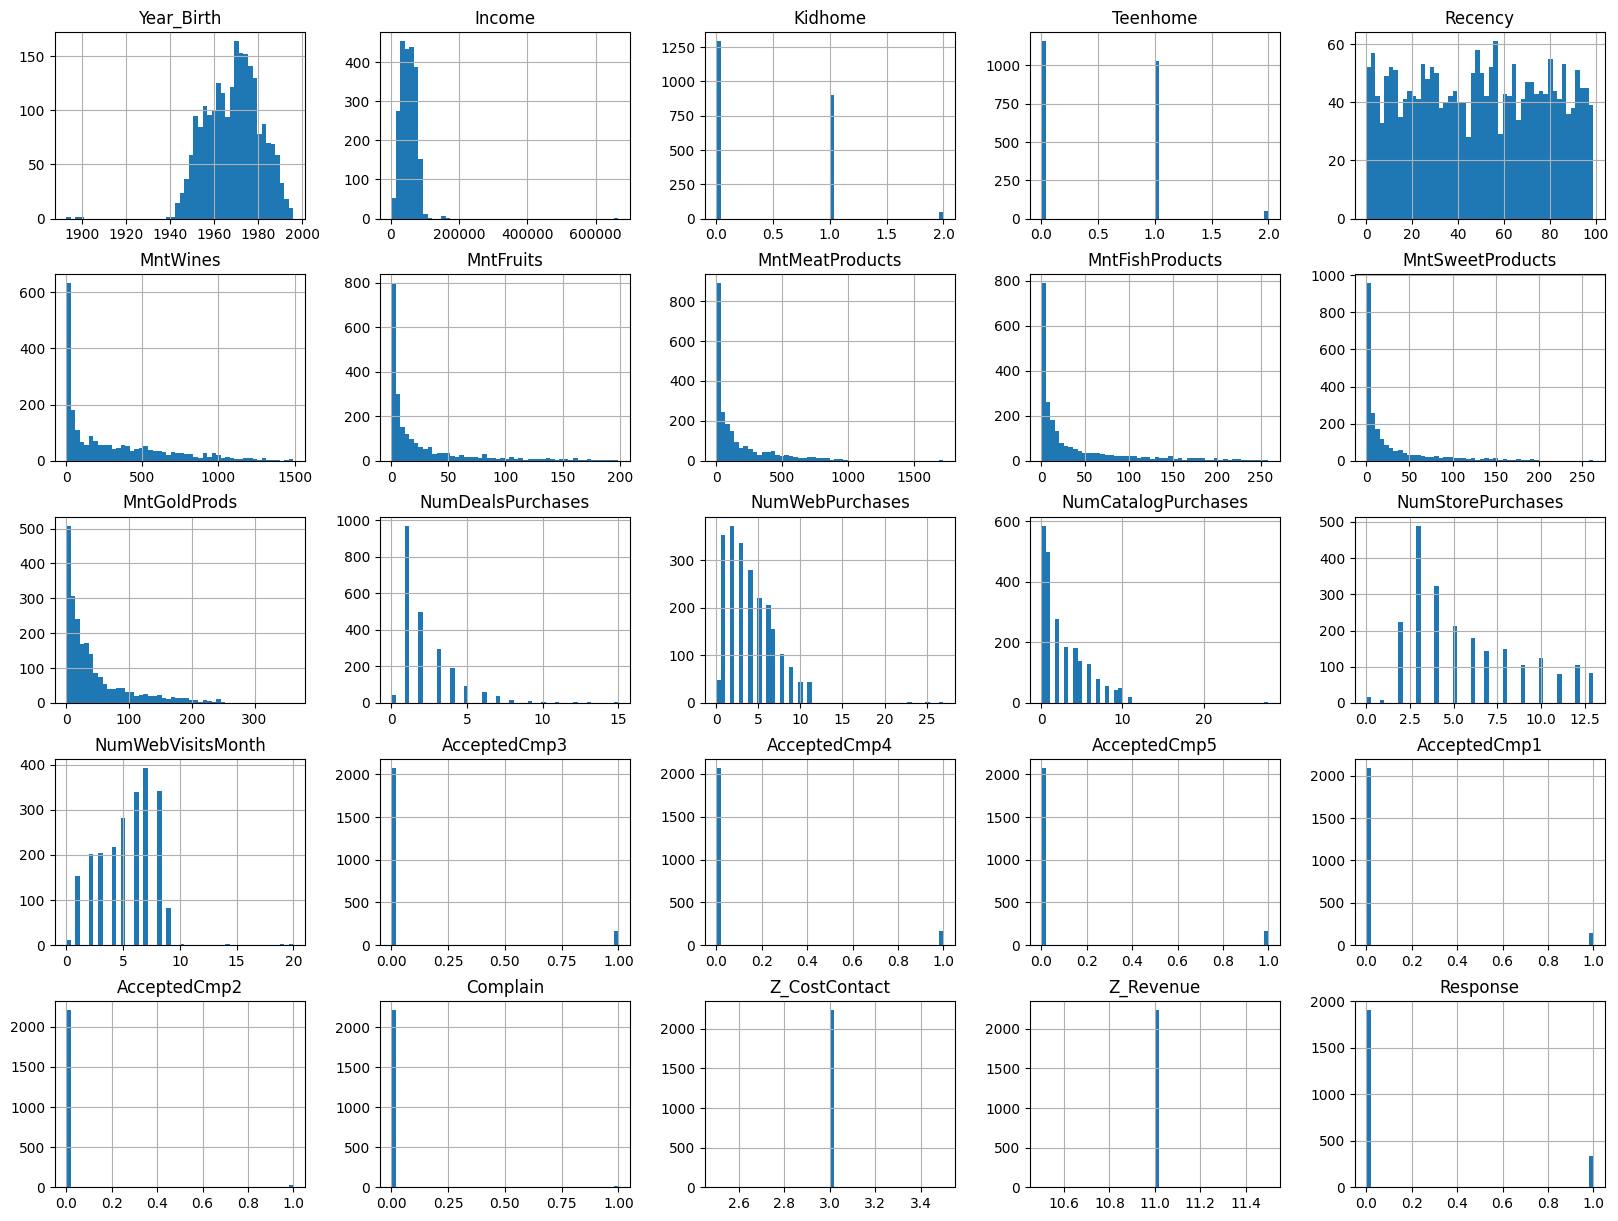

In [11]:
# look at the distributions
data.hist(bins=50, figsize=(20, 15))
plt.show()

### income may has an outliers ?

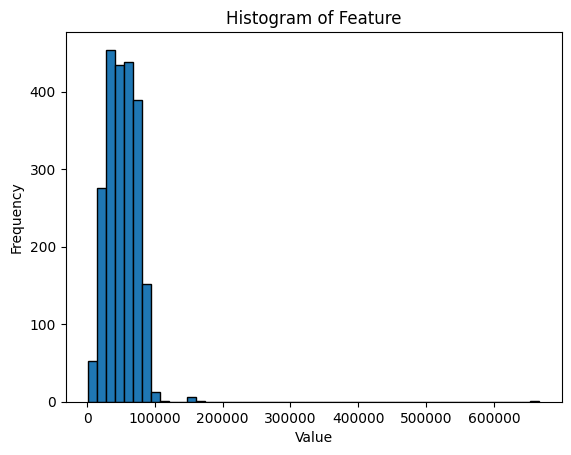

In [12]:
# income may has an outliers ?
plt.hist(data['Income'], bins=50, edgecolor='k')
plt.title('Histogram of Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Income'>

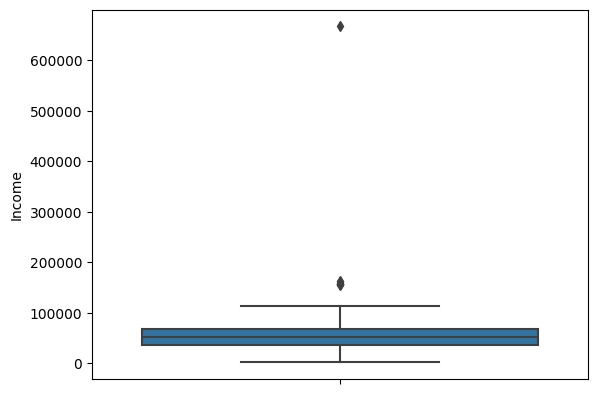

In [13]:
sns.boxplot(data,y='Income')

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


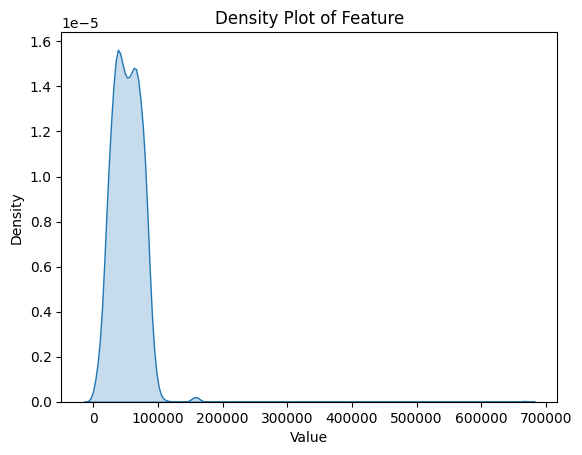

In [14]:
sns.kdeplot(data['Income'], fill=True)
plt.title('Density Plot of Feature')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


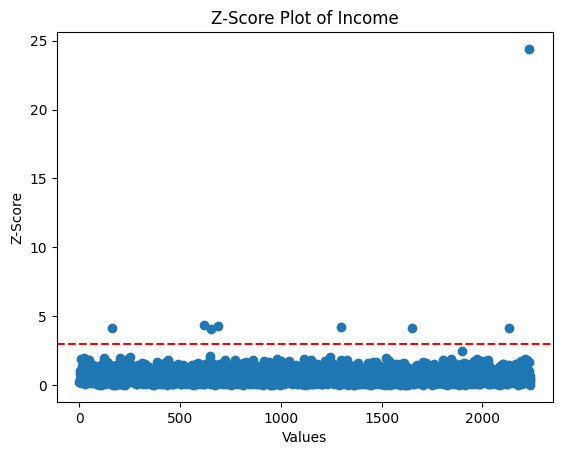

In [15]:
# Calculate z-scores
z_scores = np.abs((data['Income'] - data['Income'].mean()) / data['Income'].std())

plt.plot(z_scores, 'o')
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Z-Score Plot of Income')
plt.xlabel('Values')
plt.ylabel('Z-Score')
plt.show()

In [16]:
# the big numbers are real and important ?
data[z_scores > 3] 

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164   01-03-2014       98        20          2             1582   
617   03-06-2013       31        85          1               16   
655   07-02-2014       81         1          1                1   
687   04-08-2012       21        55         16             1622   
1300  04-06-2013       37        39          1                9   
1653  29-04-2013       13         1          0             1725   
2132  29-08-2013       85         2          1                2   
2233  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
164              0             0         0              3         11         0  
617              0             0         0              3         11         0  
655              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1300             0             0         0              3         11         0  
1653             0             0         0              3         11         0  
2132             0             0         0              3         11         0  
2233             0             0         0              3         11         0

### outliers ( extreme values ) 

In [17]:
selected_columns = [feature for feature in data.select_dtypes(['float', 'int']).columns if data[feature].nunique() > 3] # to avoid numeric values that may be cat

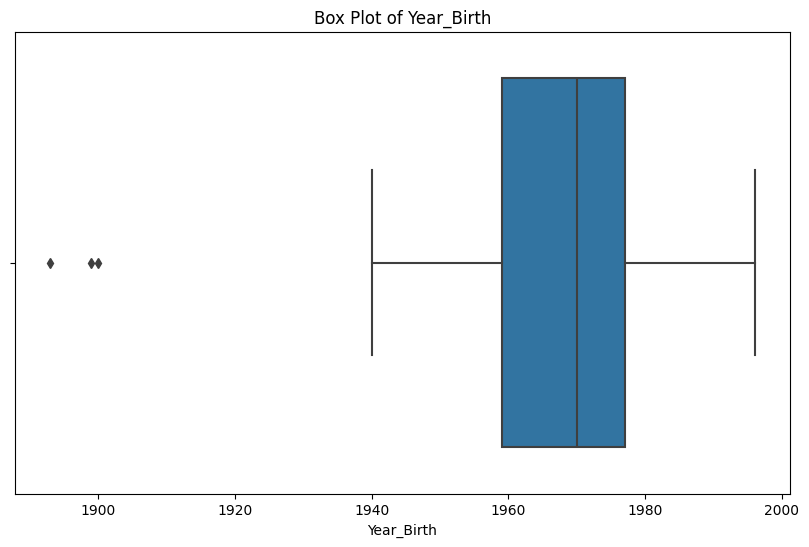

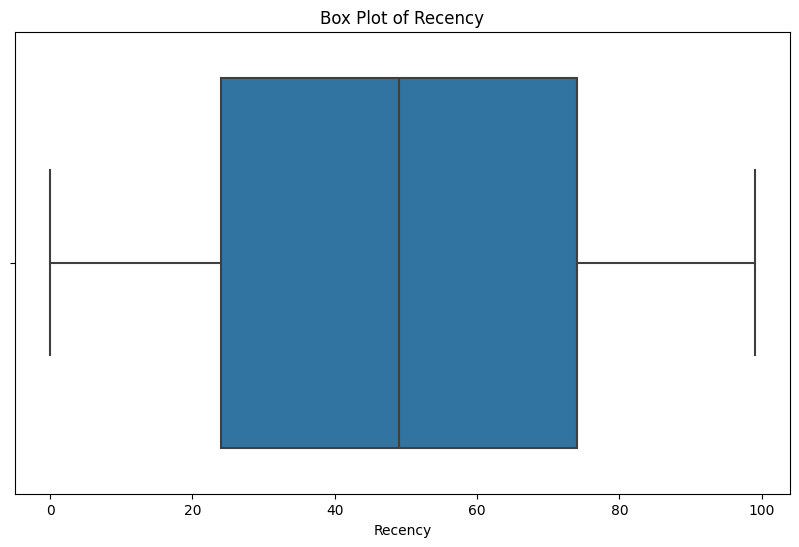

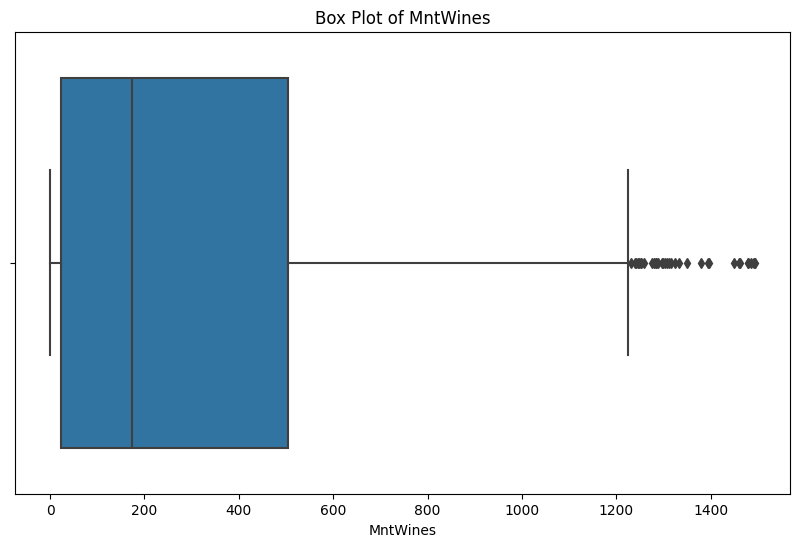

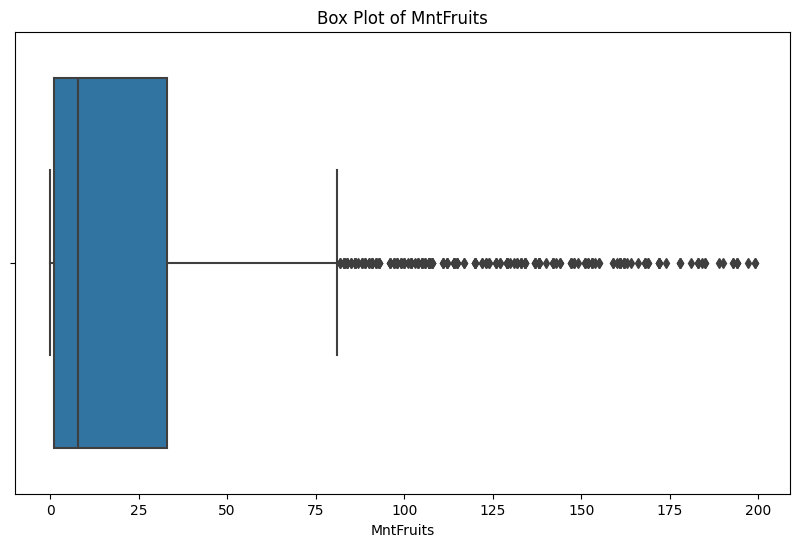

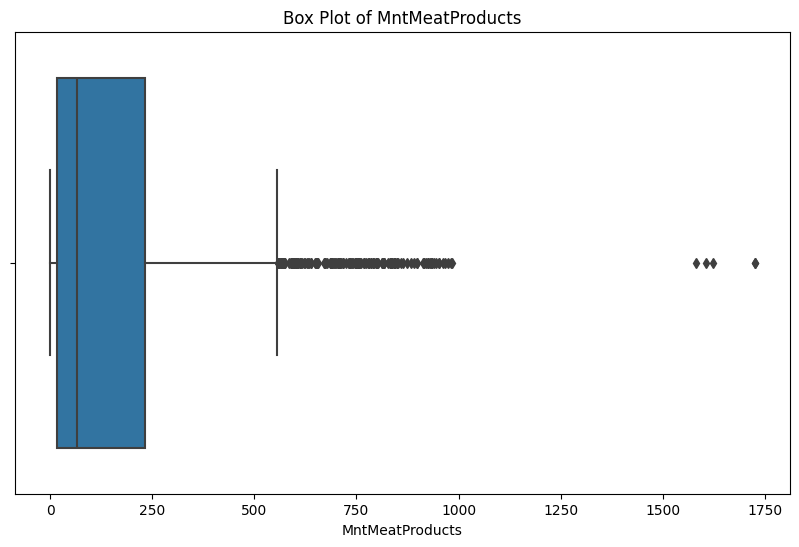

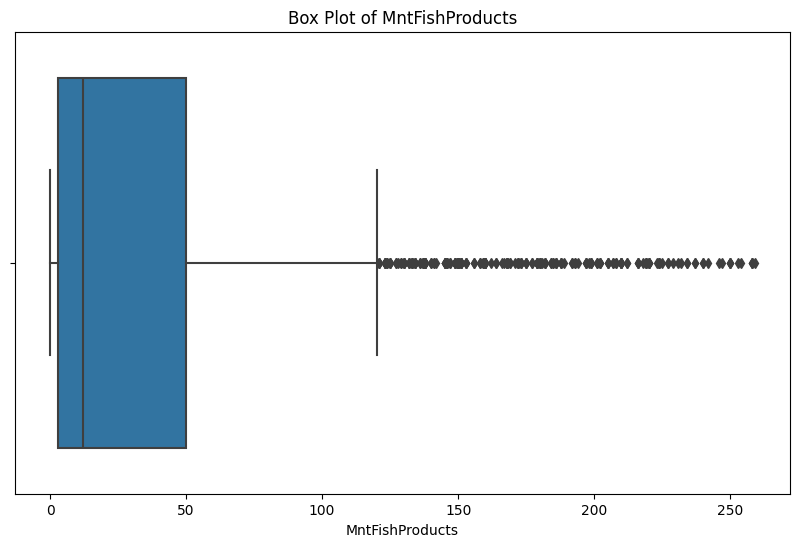

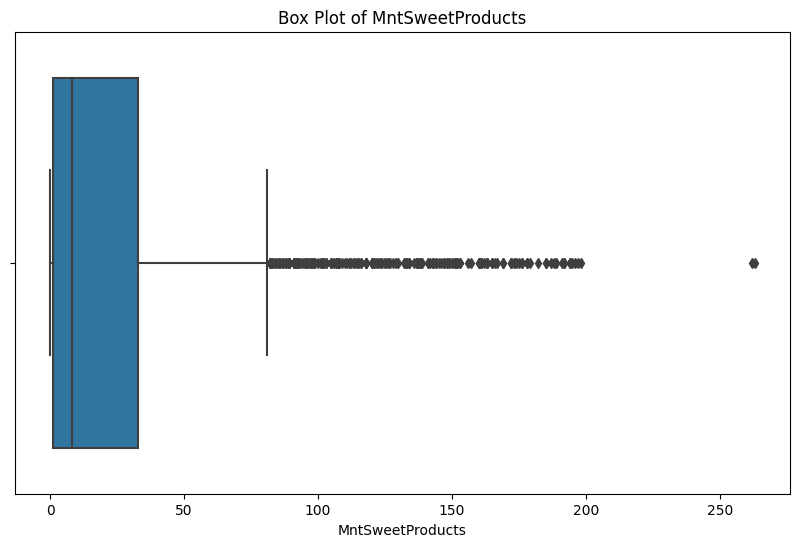

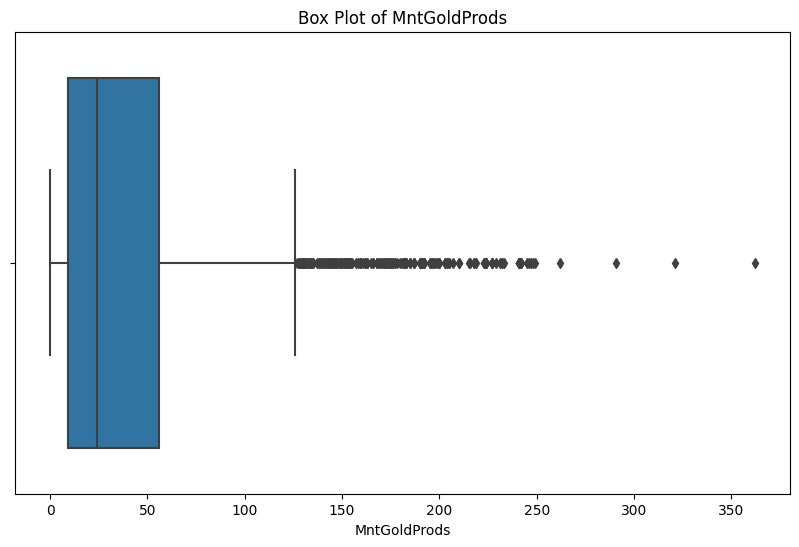

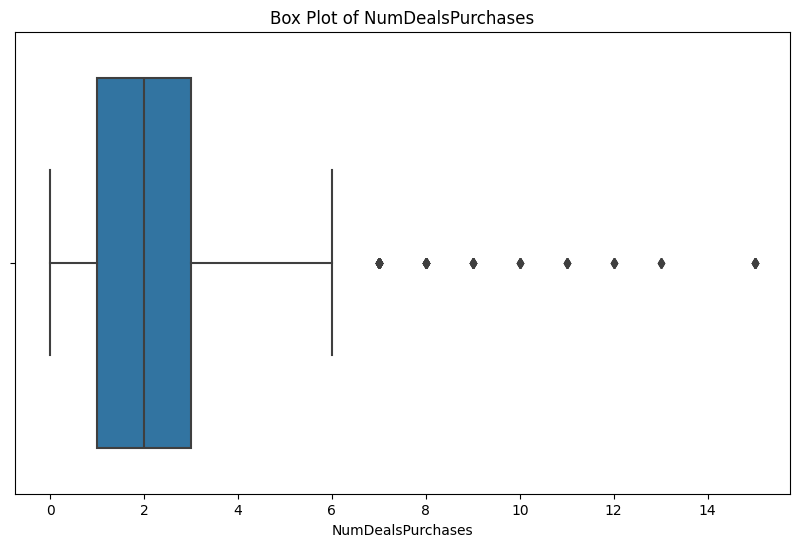

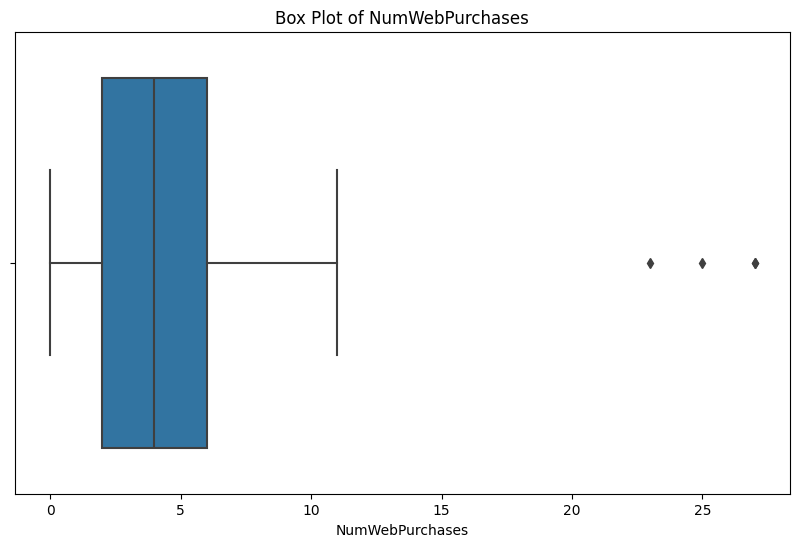

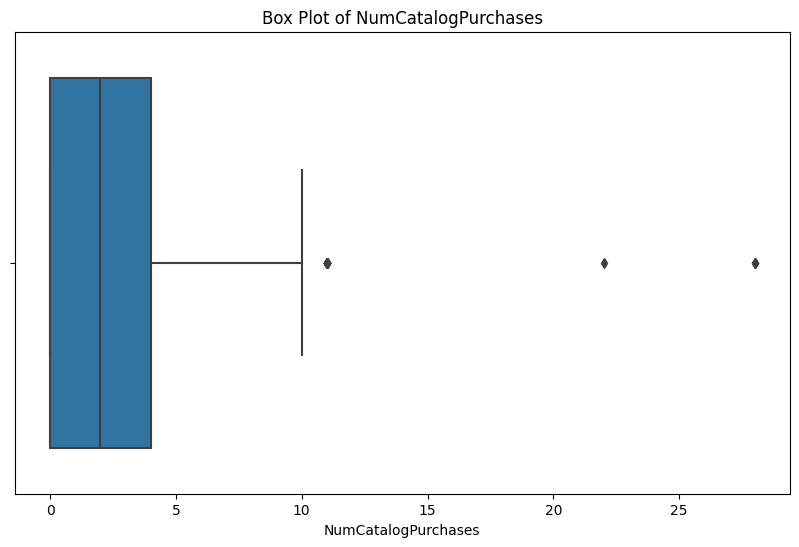

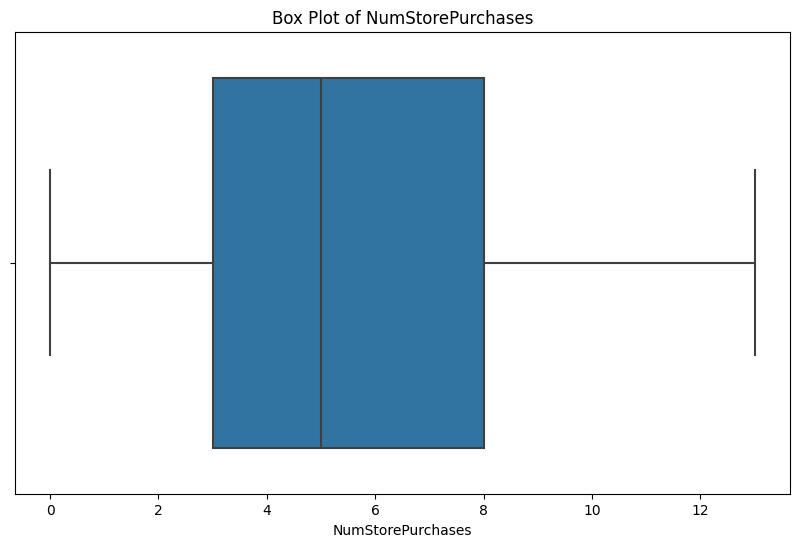

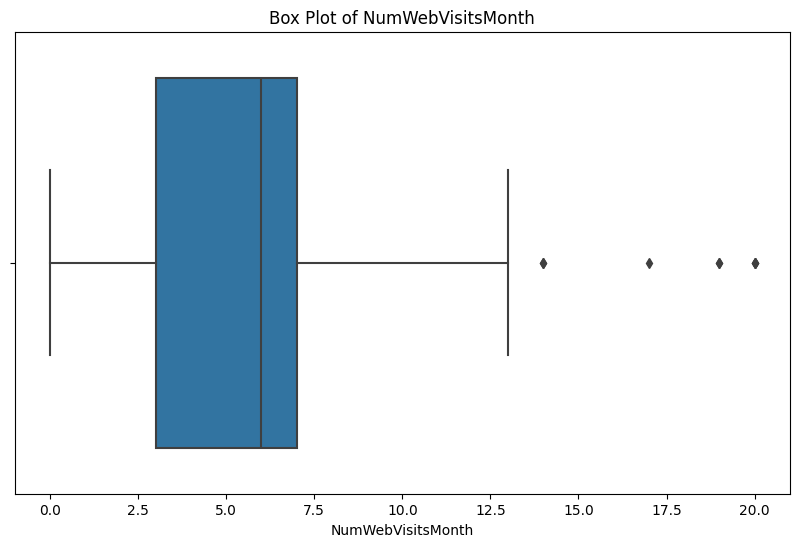

In [18]:
# Box plot 
# IQR
for feature_name in selected_columns:
    # Plotting the box plot for the 'Income' feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature_name])
    plt.title(f'Box Plot of {feature_name}')
    plt.xlabel(feature_name)
    plt.show()

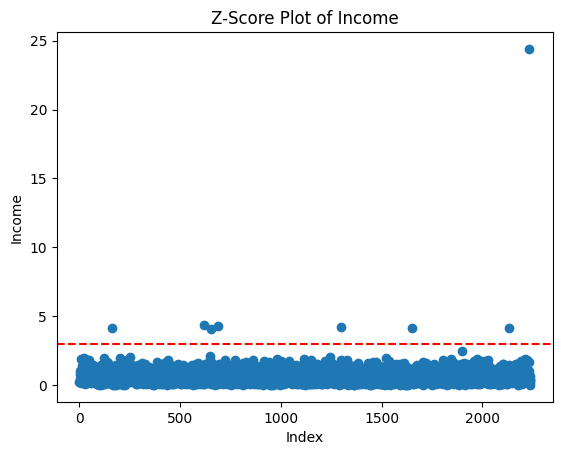

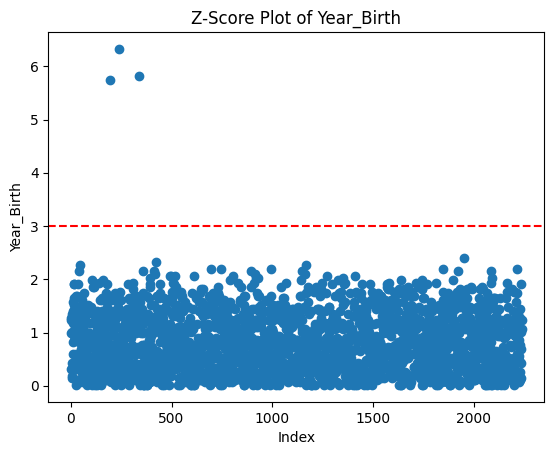

In [19]:
#z_scores for only like normal ones
for col in ['Income','Year_Birth']:
    # Calculate z-scores
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())

    plt.plot(z_scores, 'o')
    plt.axhline(y=3, color='r', linestyle='--')
    plt.title(f'Z-Score Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()
        


## Demographics Analysis

- Education Levels, Marital Status, Income and Age.

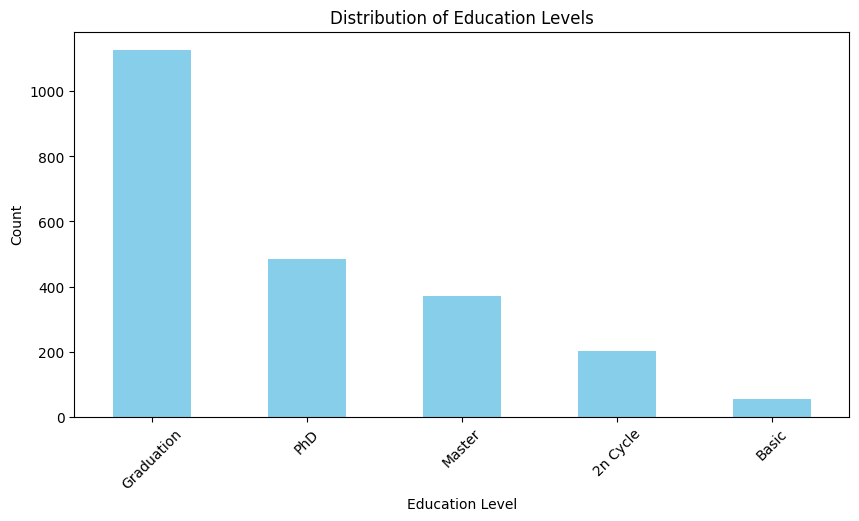

In [20]:
# categorical distributions..-> distinct non-numeric value.

# Plot Education
plt.figure(figsize=(10, 5))
data['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

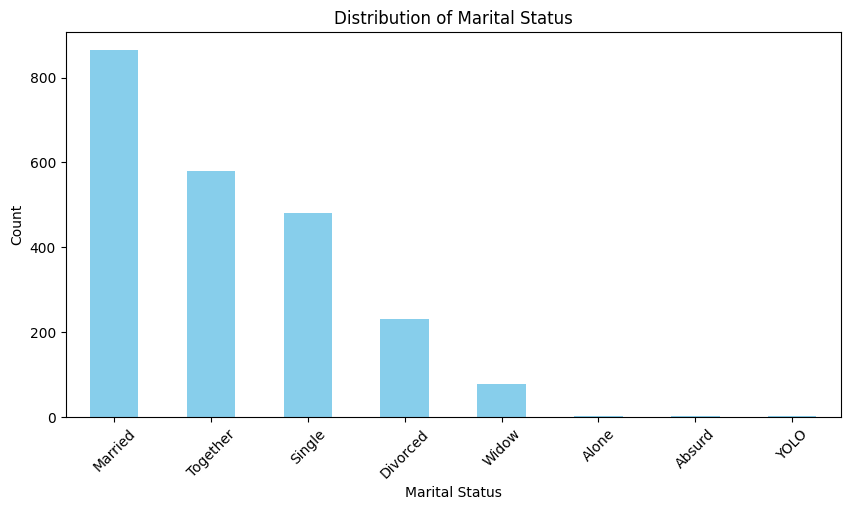

In [21]:
# Plot Marital Status
plt.figure(figsize=(10, 5))
data['Marital_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

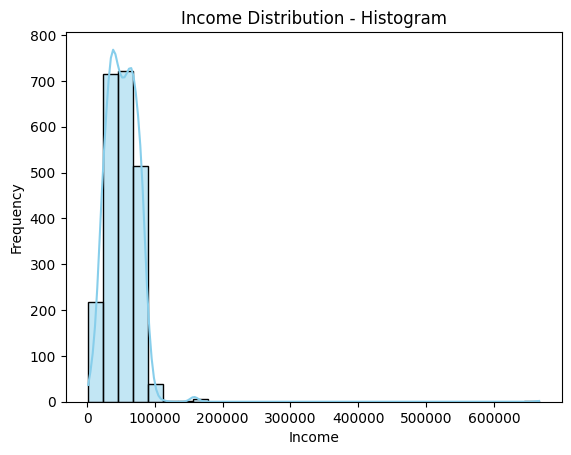

In [22]:
# Income distribution
# Histogram
sns.histplot(data.Income, bins=30, kde=True, color='skyblue')
plt.title('Income Distribution - Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')


- what is the right Age? when this data was collect?

In [23]:
# Idea to know the time when data was collected
df_master = data[data['Education'] == 'Master']
arr = df_master.Year_Birth.values 
np.sort(arr)[365:]

array([1990, 1991, 1991, 1992, 1992])

> i will consider that the near of year birth of Master people may that they age between 22 and 24 ---> like 1992,1991

In [24]:
# age (year birth)
year_data_collected = 2012
print(max(year_data_collected - data.Year_Birth))
print(min(year_data_collected - data.Year_Birth))
print(np.sort(year_data_collected - data.Year_Birth)[2000:])

119
16
[ 59  59  59  59  59  59  60  60  60  60  60  60  60  60  60  60  60  60
  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60  60
  60  60  60  60  61  61  61  61  61  61  61  61  61  61  61  61  61  61
  61  61  61  61  61  61  61  61  61  61  61  61  61  61  61  61  61  61
  61  61  61  61  61  61  61  61  61  61  61  62  62  62  62  62  62  62
  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62
  62  62  62  62  63  63  63  63  63  63  63  63  63  63  63  63  63  63
  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  64  64
  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64
  64  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65  66
  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  67  67  67
  67  67  67  67  67  68  68  68  68  68  68  68  69  69  69  69  69  69
  69  71  72 112 113 119]


/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


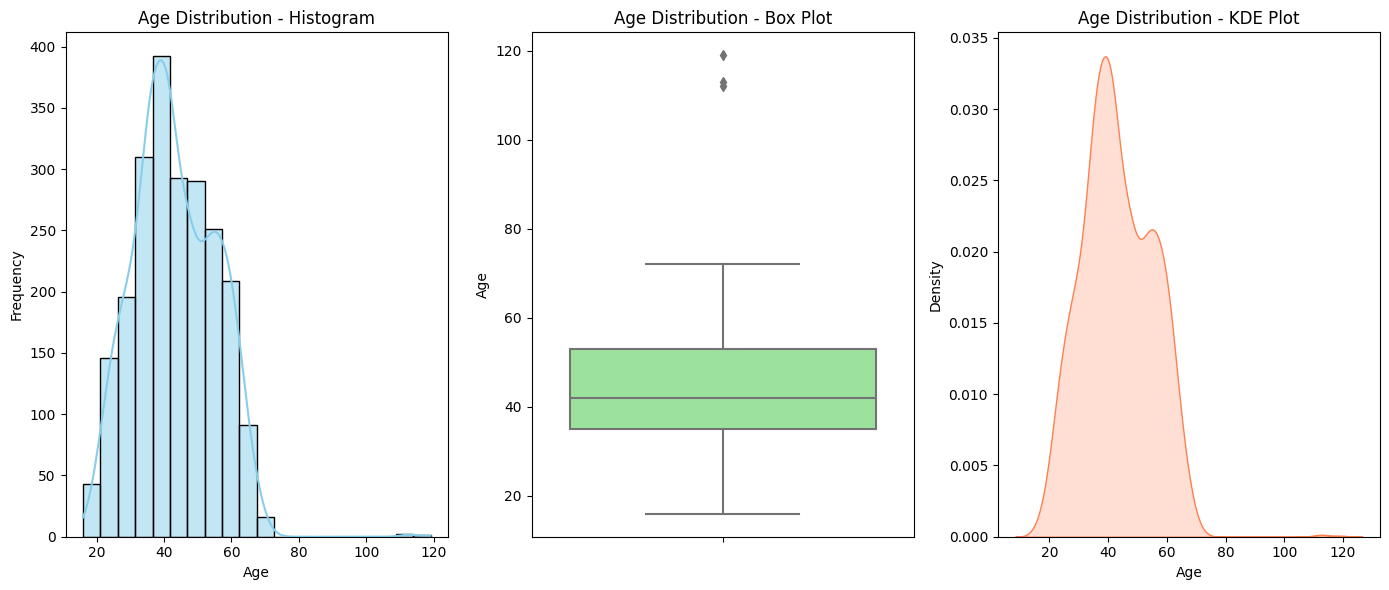

In [25]:
# we have 3 outliers
Age = 2012 - data.Year_Birth

# Set up the plotting area
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(Age, bins=20, kde=True, color='skyblue')
plt.title('Age Distribution - Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(y=Age, color='lightgreen')
plt.title('Age Distribution - Box Plot')
plt.ylabel('Age')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(Age, fill=True, color='coral')
plt.title('Age Distribution - KDE Plot')
plt.xlabel('Age')

# Show the plots
plt.tight_layout()
plt.show()


> we may replace Year_Birth by Age values .

## Product Purchases and Preferences

- which are the most important features?
   - i will use std as a feature selection
   - > IMPORTANT NOTE: variance or std only not the right way, for our step now i will see correlation else, there many other methods but almost of them for supervised tasks. 

In [26]:
# Using standard deviation might select more features because the values are on a more comparable scale (square root of variance), the larg no be very very larg.

selected_columns = [feature for feature in data.select_dtypes(['float', 'int']).columns if data[feature].nunique() > 3] # to avoid numeric values that may be cat
num_data =  data[selected_columns]

# Calculate std and mean of standardized features
std = num_data.std()
means = num_data.mean()

# Scaled std, to avoid the magnitud
scaled_std = std / means

# Sort features by variance in descending order
sorted_std = scaled_std.sort_values(ascending=False)
print("Sorted std:\n",  sorted_std )


Sorted std:
 MntSweetProducts       1.525351
MntFruits              1.512170
MntFishProducts        1.455785
MntMeatProducts        1.351994
MntGoldProds           1.185034
MntWines               1.107462
NumCatalogPurchases    1.098062
NumDealsPurchases      0.831070
NumWebPurchases        0.680254
Recency                0.589754
NumStorePurchases      0.561461
Income                 0.481807
NumWebVisitsMonth      0.456435
Year_Birth             0.006087
dtype: float64


In [27]:
# Calculate cumulative variance
cumulative_std = sorted_std.cumsum()
print("Cumulative Variance:\n", cumulative_std)


Cumulative Variance:
 MntSweetProducts        1.525351
MntFruits               3.037521
MntFishProducts         4.493306
MntMeatProducts         5.845300
MntGoldProds            7.030334
MntWines                8.137796
NumCatalogPurchases     9.235859
NumDealsPurchases      10.066929
NumWebPurchases        10.747182
Recency                11.336936
NumStorePurchases      11.898397
Income                 12.380204
NumWebVisitsMonth      12.836639
Year_Birth             12.842726
dtype: float64


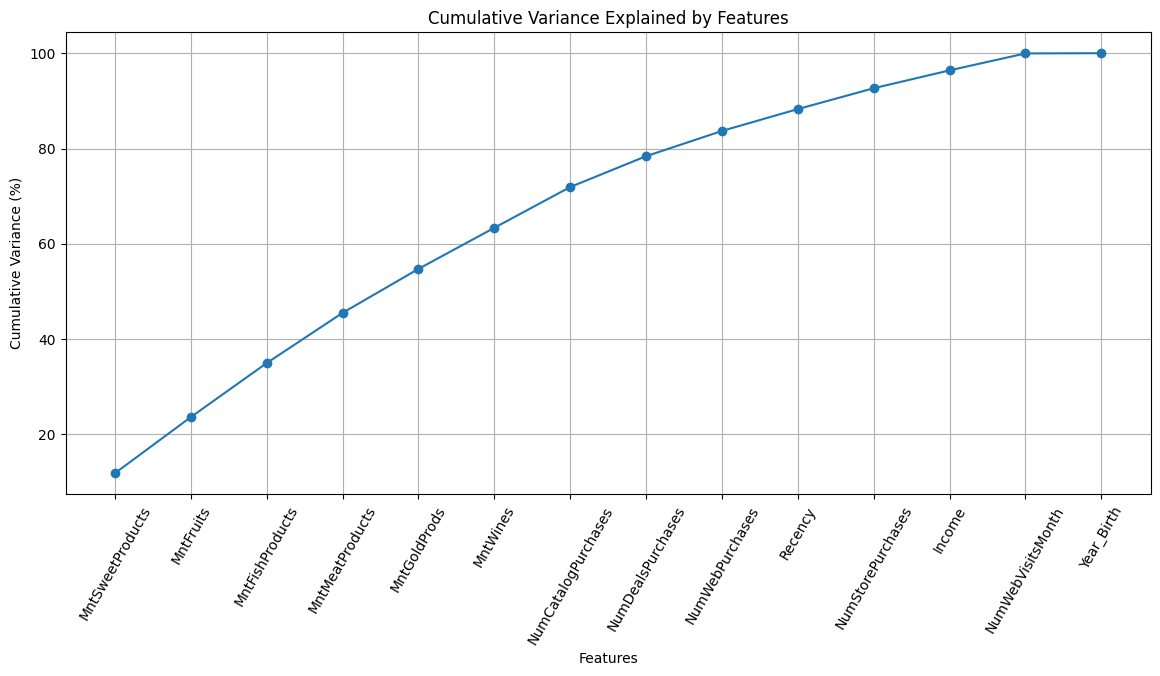

In [28]:
# Convert cumulative variance to percentage
cumulative_variance_percentage = cumulative_std / cumulative_std.iloc[-1] * 100

# Plot the cumulative variance
plt.figure(figsize=(14, 6))
plt.plot(cumulative_variance_percentage, marker='o')
plt.xticks(range(len(cumulative_variance_percentage)), cumulative_variance_percentage.index, rotation=60)
plt.xlabel('Features')
plt.ylabel('Cumulative Variance (%)')
plt.title('Cumulative Variance Explained by Features')
plt.grid(True)
plt.show()

> NOTE: may have little variance but have strong correlation.

> Important Note: I avoid work with columns with binary values, for many reason:
                                                                                 >  - we have to use other methods and experiments to work with this kind of features.  
                                                                                 >  - it's more likely to be categorical
                                                                                 >  - my way in scaling is very sentitive to mean near to zero.

- Product Purchases and Preferences

In [29]:
# sum product
data['SumProduct'] = data['MntMeatProducts'] +  data['MntFishProducts'] + data['MntSweetProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntWines']

# sum purchases
data['SumPurchases'] = (data['NumDealsPurchases'] + 
                       data['NumWebPurchases'] + 
                       data['NumCatalogPurchases'] + 
                       data['NumStorePurchases'])


ProductColumns = ['SumProduct','MntMeatProducts','MntFishProducts','MntSweetProducts','MntFruits','MntGoldProds','MntWines']
PurchasesColumns = ['SumPurchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

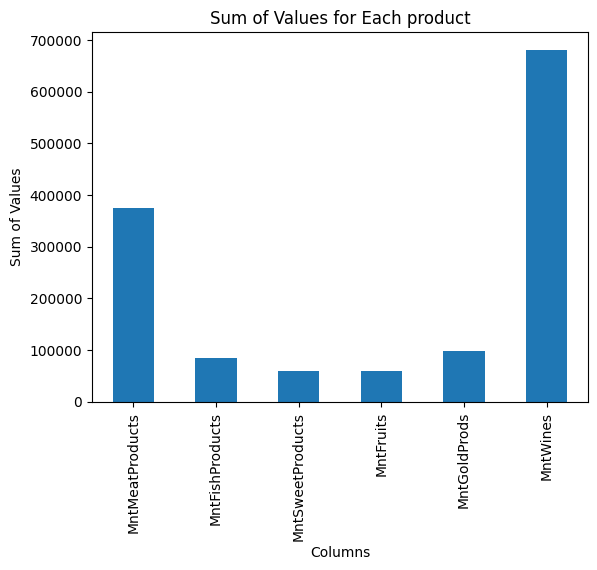

In [30]:

sums_every_product =  data[ProductColumns].drop('SumProduct',axis = 1).sum() # drop the sum

# Plot products

# Plotting
sums_every_product.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each product')

# Display the plot
plt.show()

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


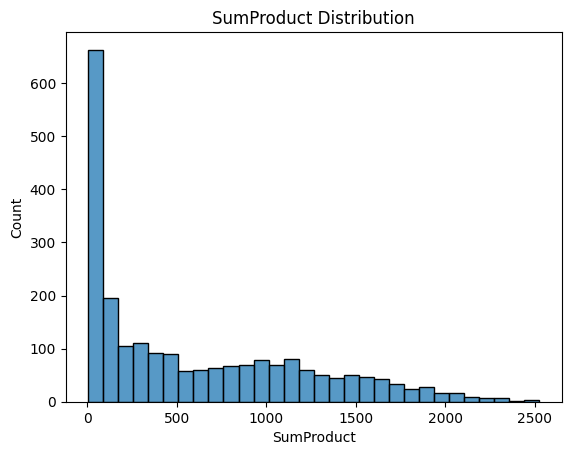

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


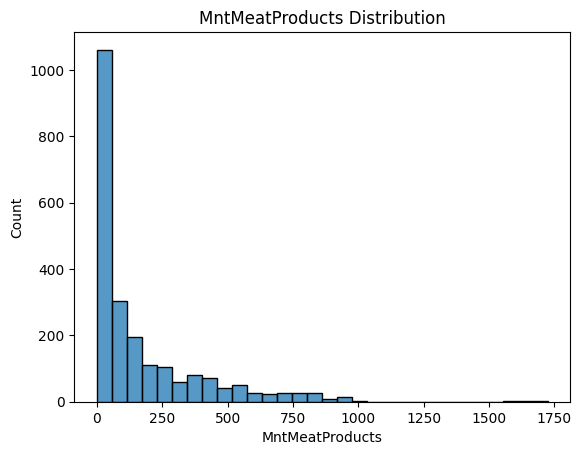

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


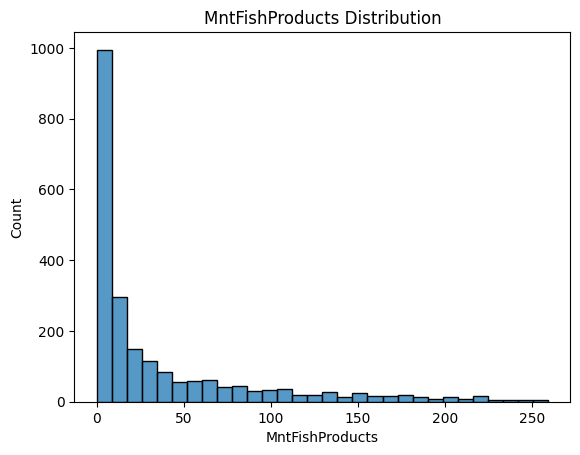

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


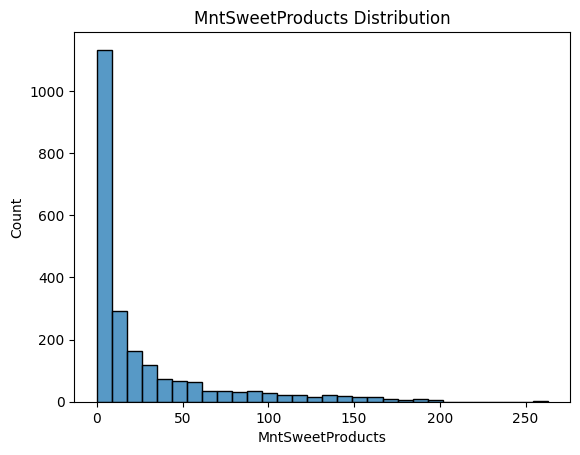

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


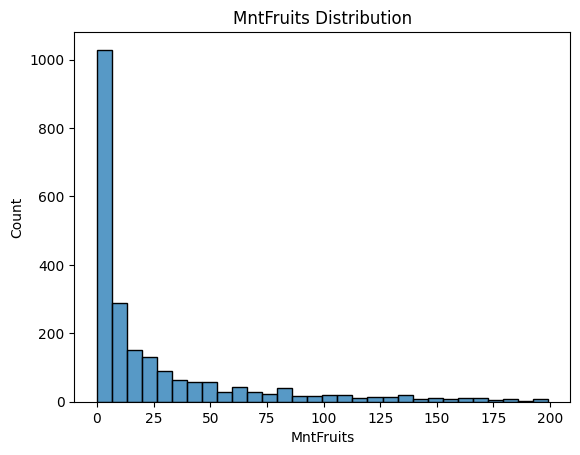

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


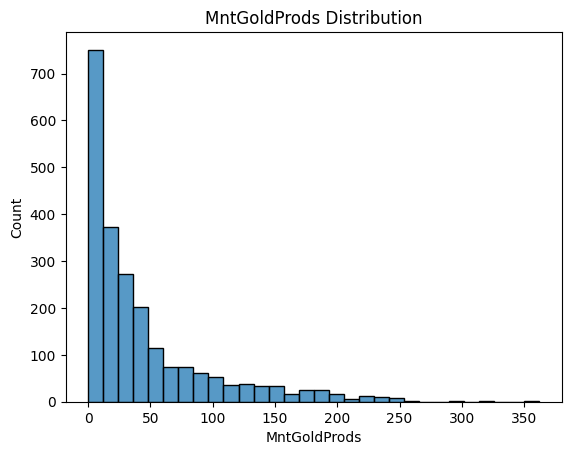

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


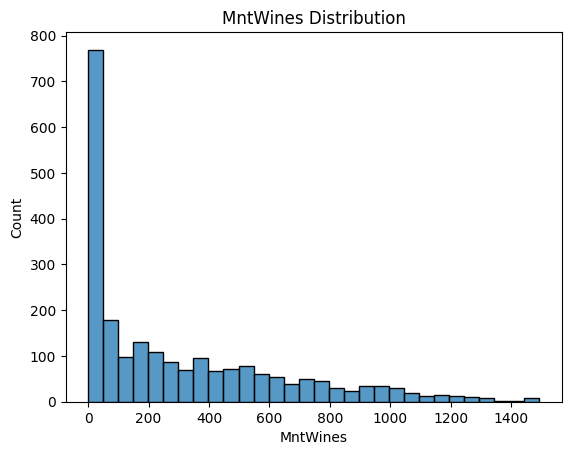

In [31]:
# Distribution of purchases for each product category
for col in ProductColumns:
    sns.histplot(data[col], bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

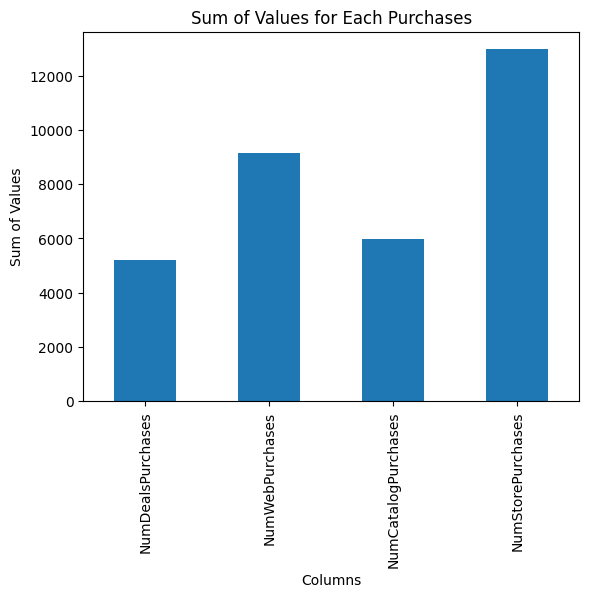

In [32]:
# Purchases ways
sums_every_Purchases = data[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plotting
sums_every_Purchases.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Sum of Values for Each Purchases')


# Display the plot
plt.show()

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


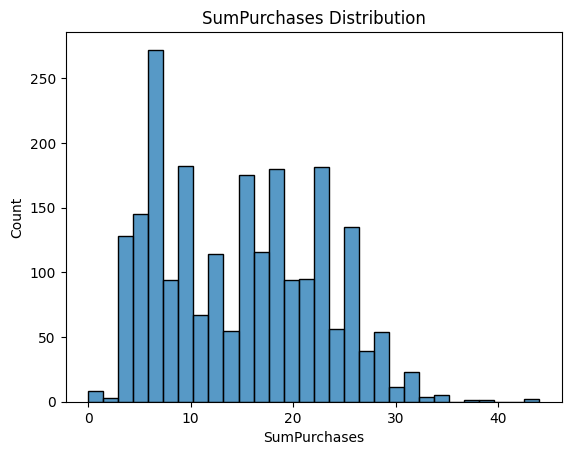

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


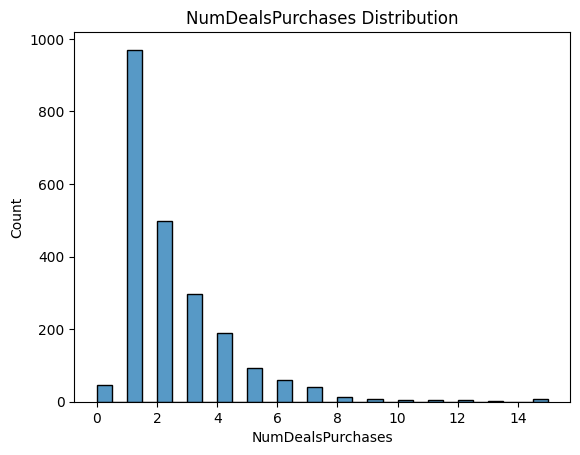

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


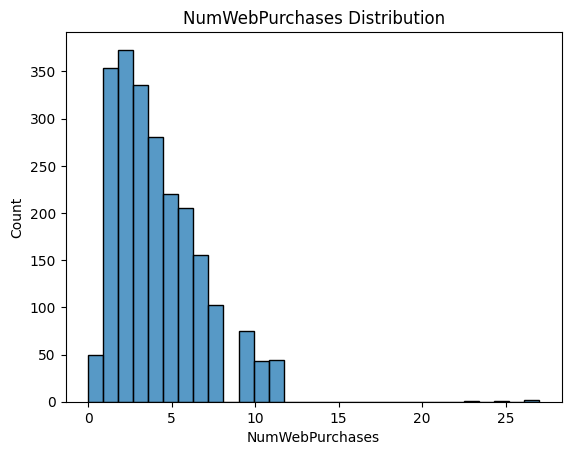

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


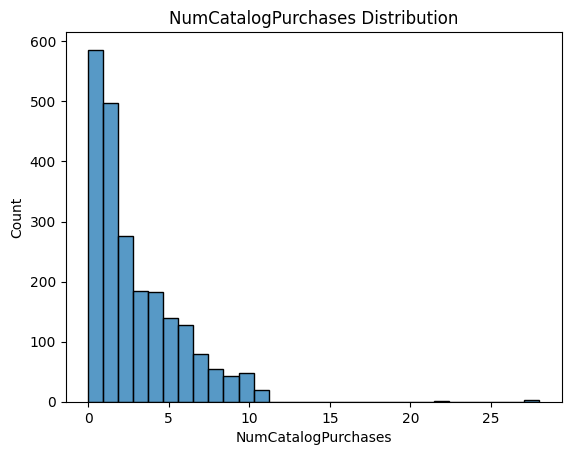

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


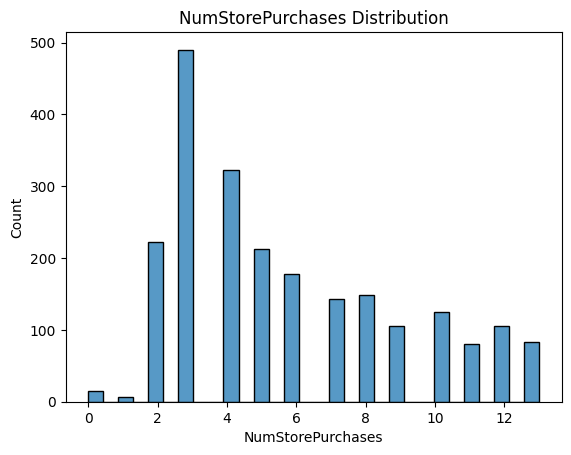

In [33]:
for col in PurchasesColumns:
    sns.histplot(data[col], bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

### Income with products and Purchases.

> may be a little variance or std but there an a good correlation

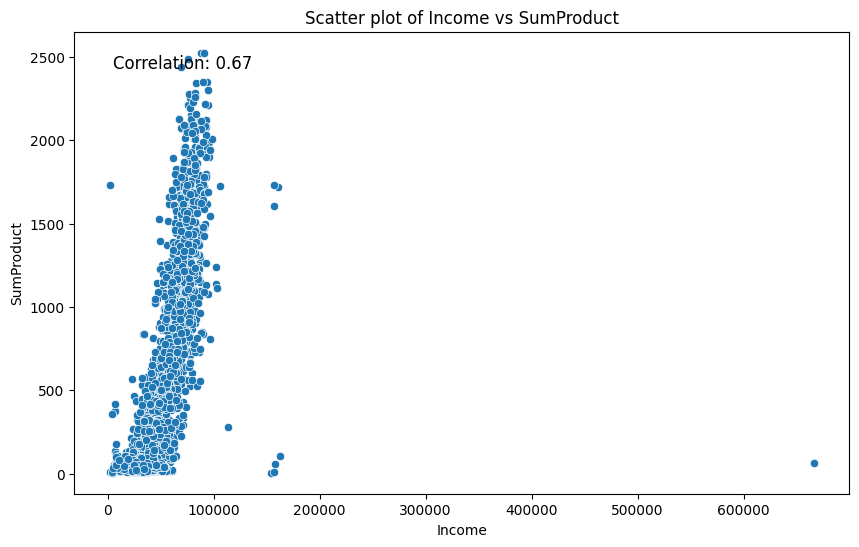

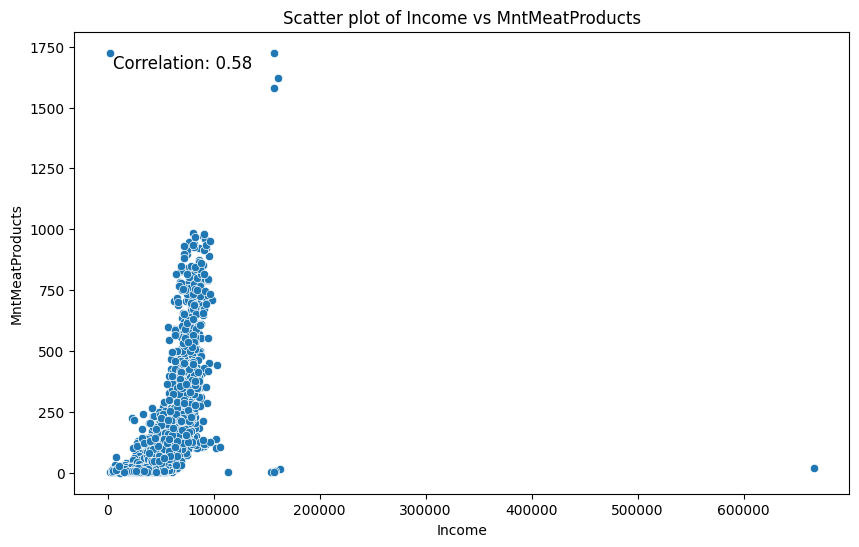

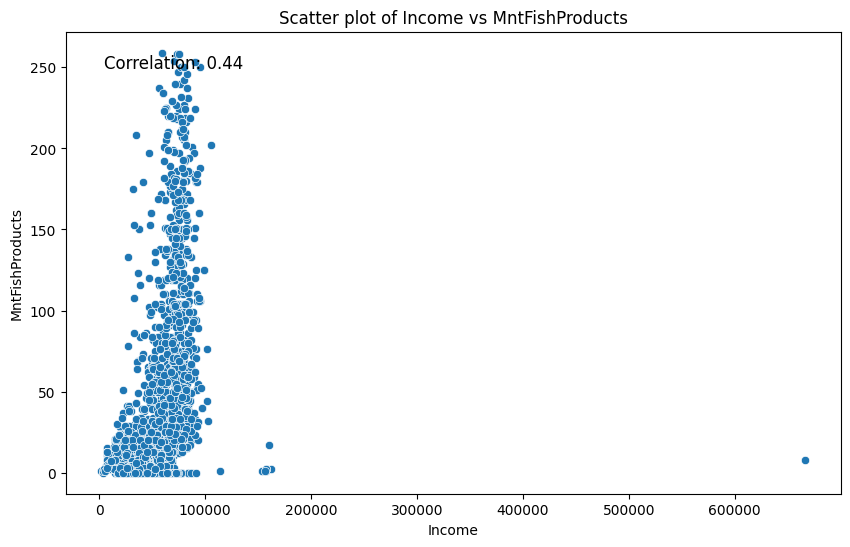

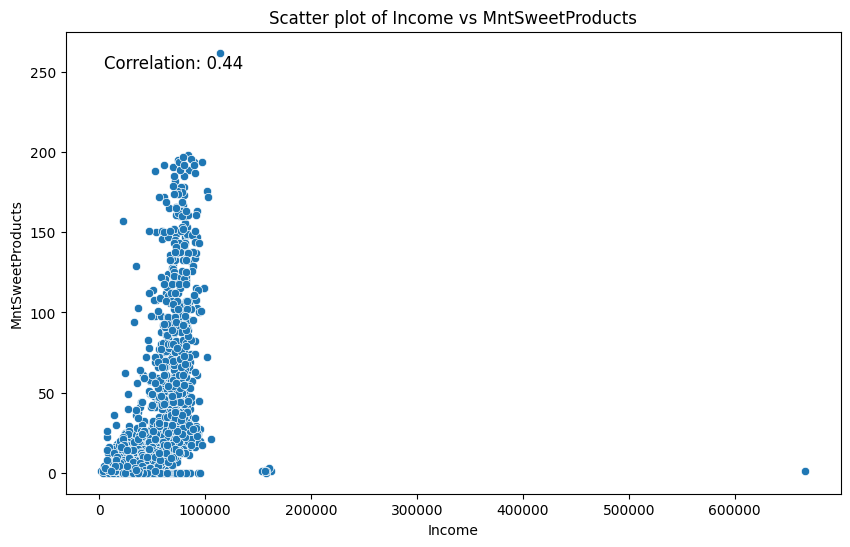

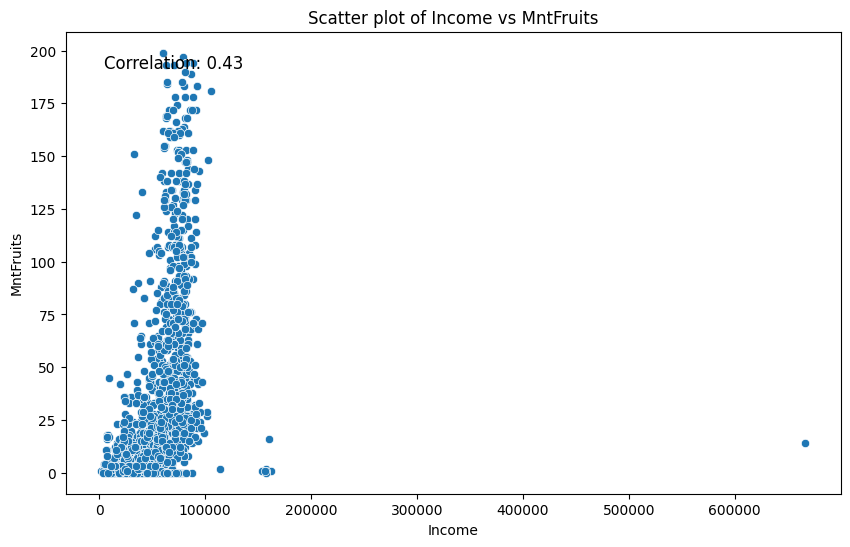

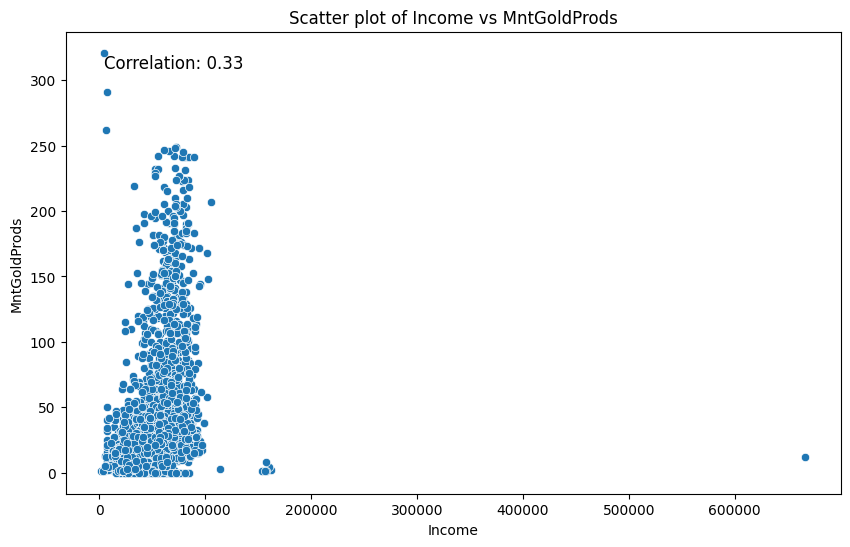

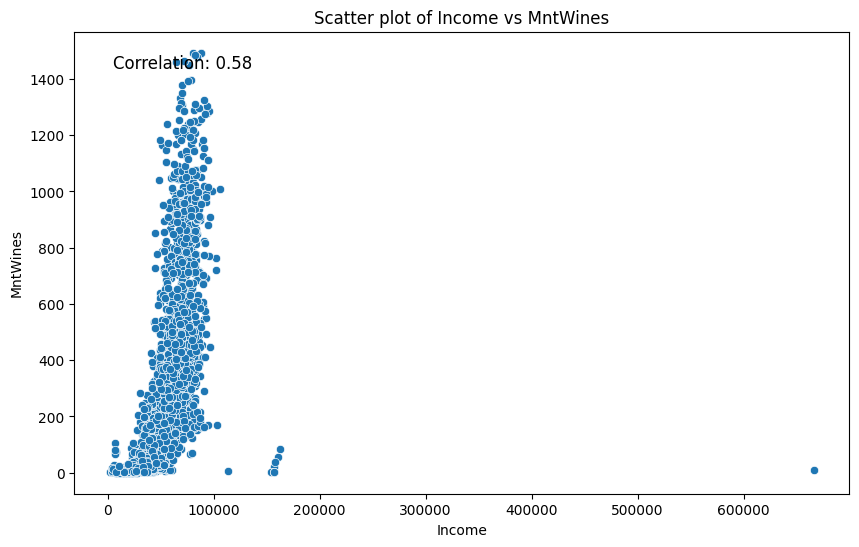

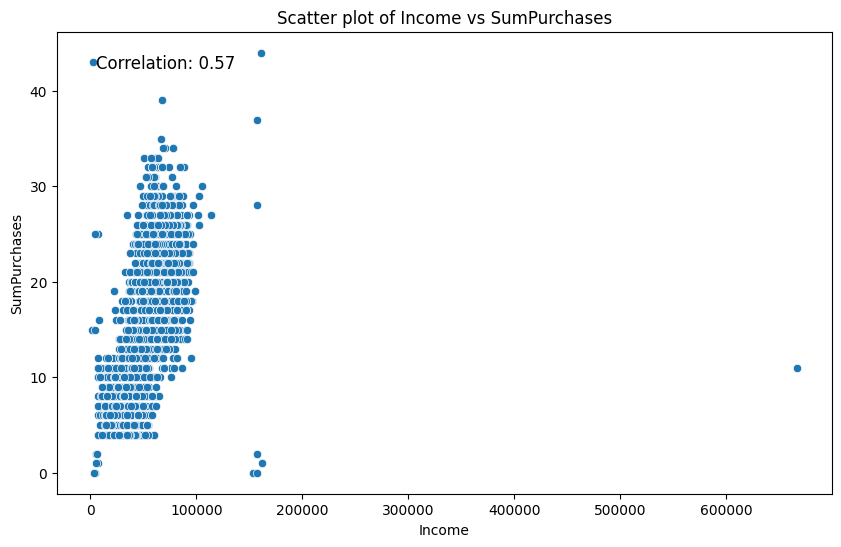

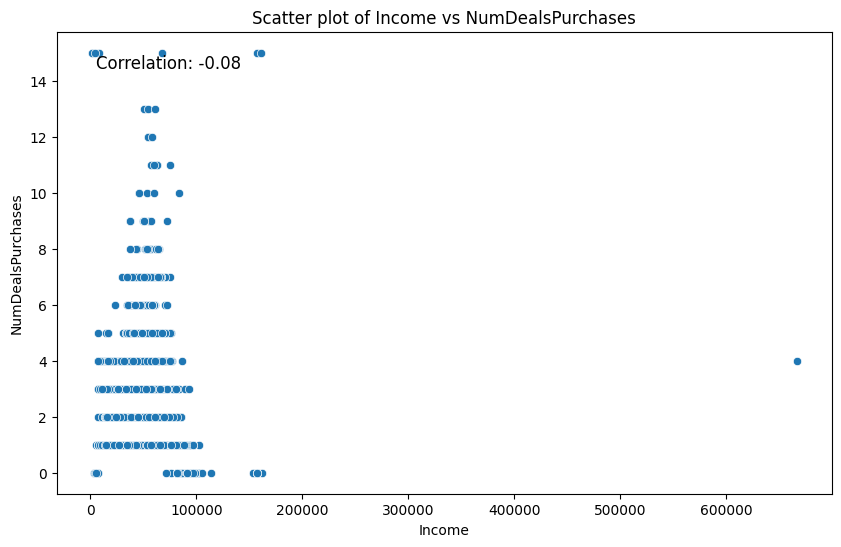

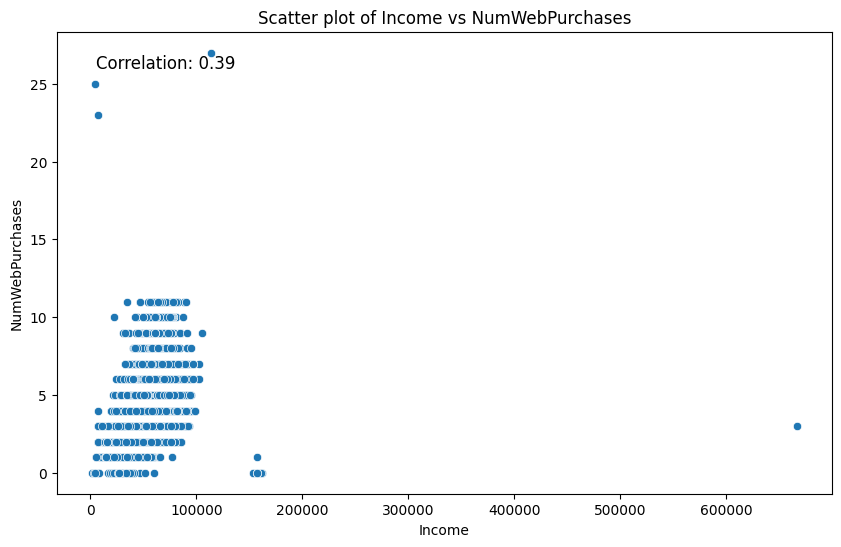

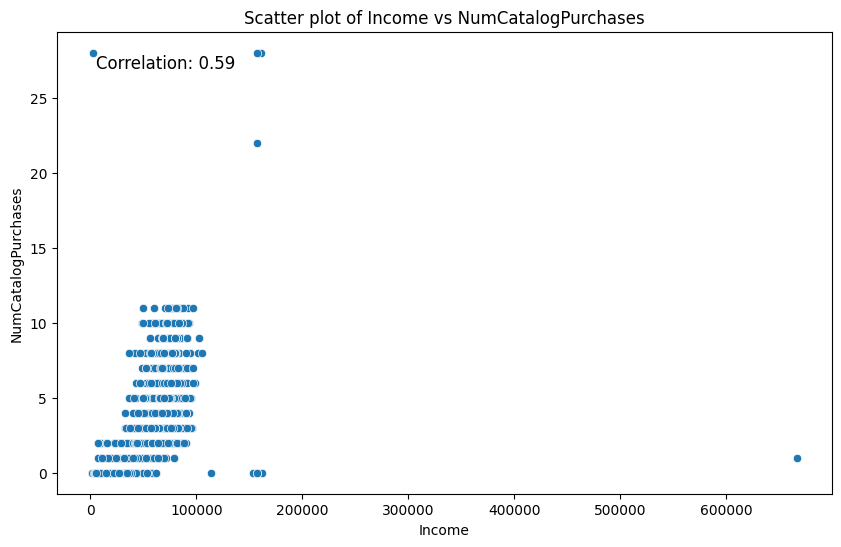

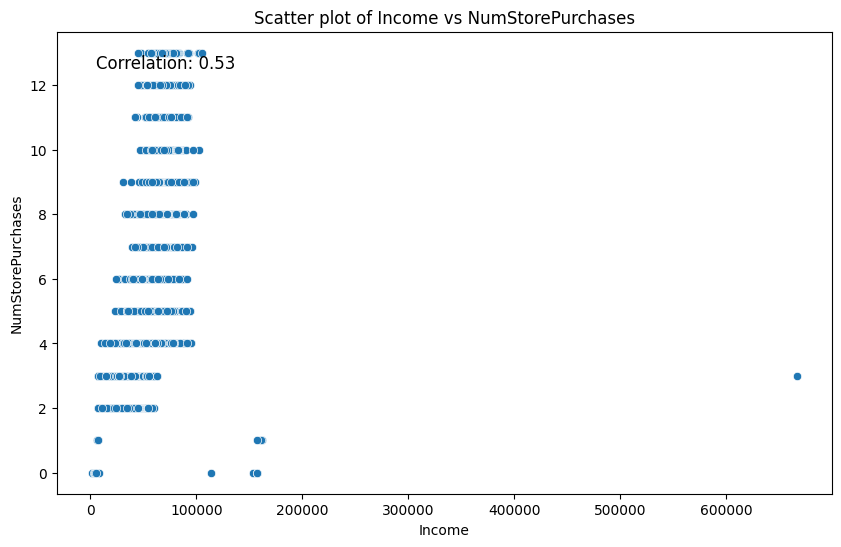

In [34]:
# Income with products and Purchases.

ProductAndPurchases = [ProductColumns,PurchasesColumns]
income = "Income"


def scatter_correlation(data,col1,col2):
                # Calculate correlation
                correlation = data[col1].corr(data[col2])

                # Create the scatter plot
                plt.figure(figsize=(10, 6))
                sns.scatterplot(data=data, x=col1, y=col2)

                # Annotate the correlation coefficient
                plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                        transform=plt.gca().transAxes, 
                        fontsize=12, verticalalignment='top')

                plt.title(f'Scatter plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()


for columns in ProductAndPurchases:
        for column in columns:
                scatter_correlation(data,income,column)
                

        

### each Purchase take the same number of procucts ? same question : Product and Purchases have strong positive correlation?  
> the normal case to be a good and not strong postive correlation.

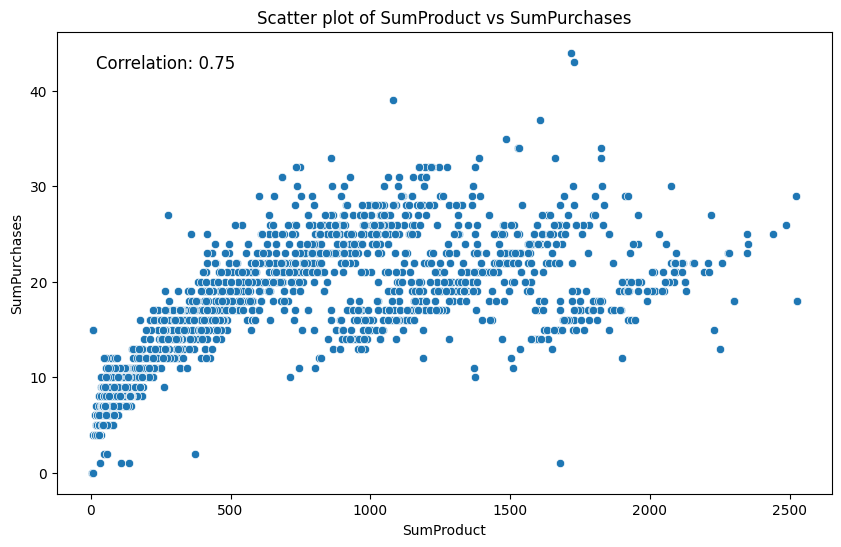

In [35]:
# sum products and sum purchases
scatter_correlation(data,"SumProduct","SumPurchases")

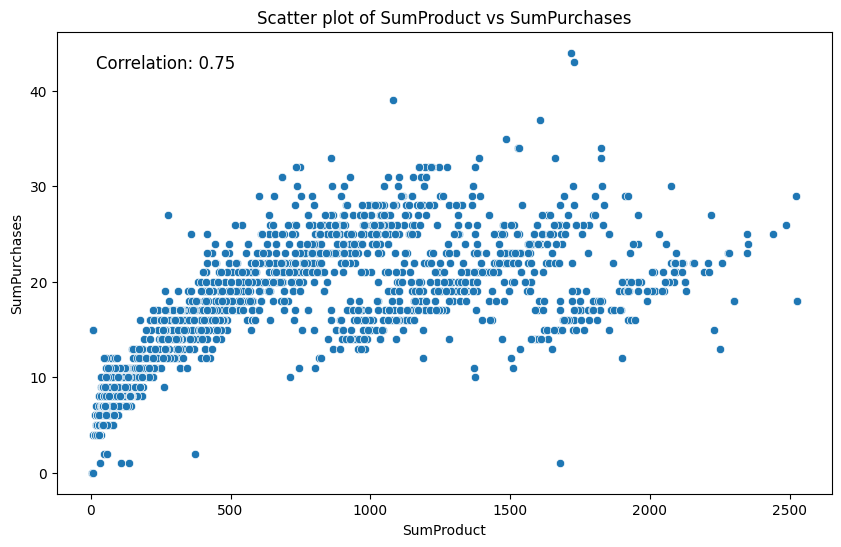

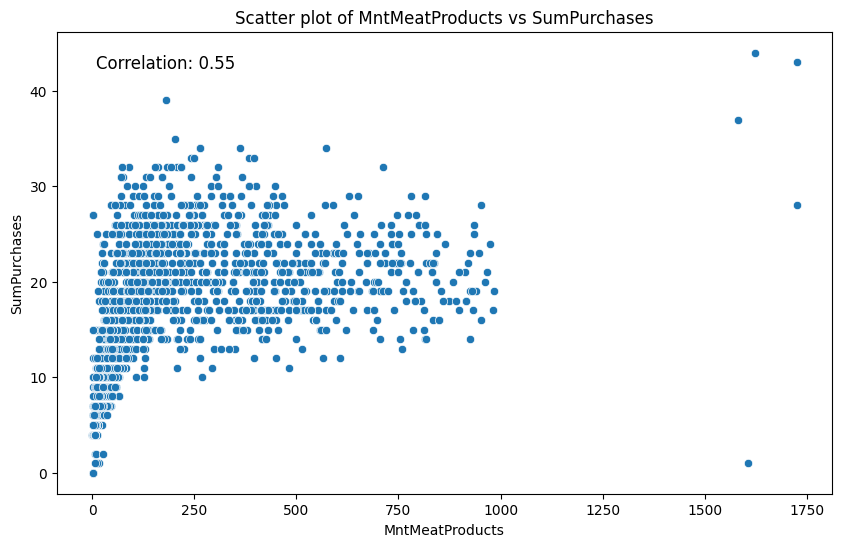

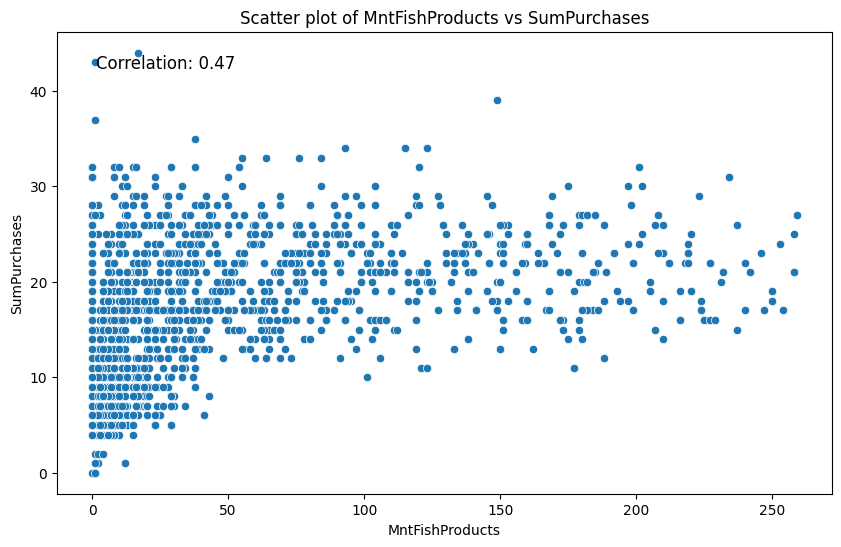

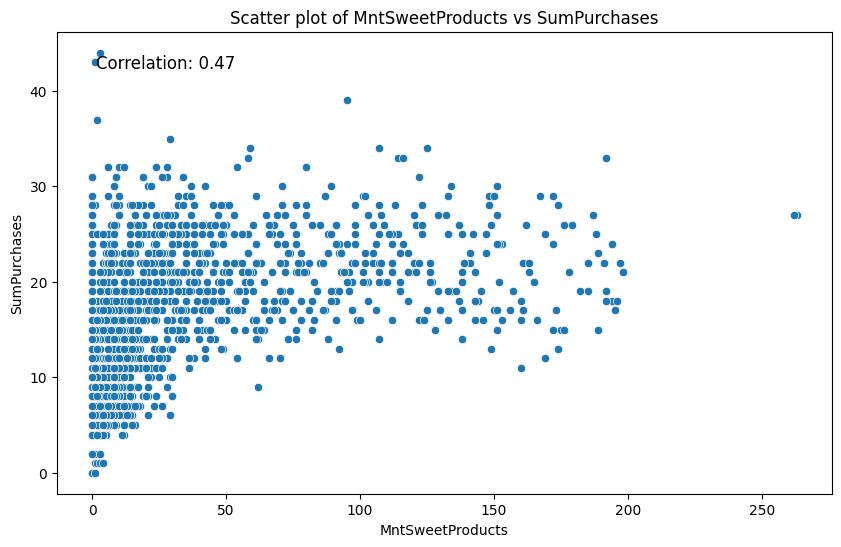

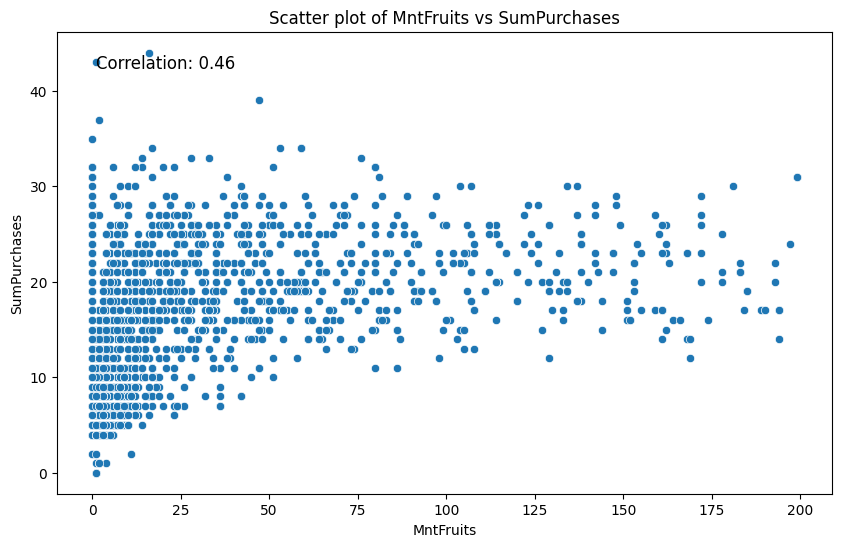

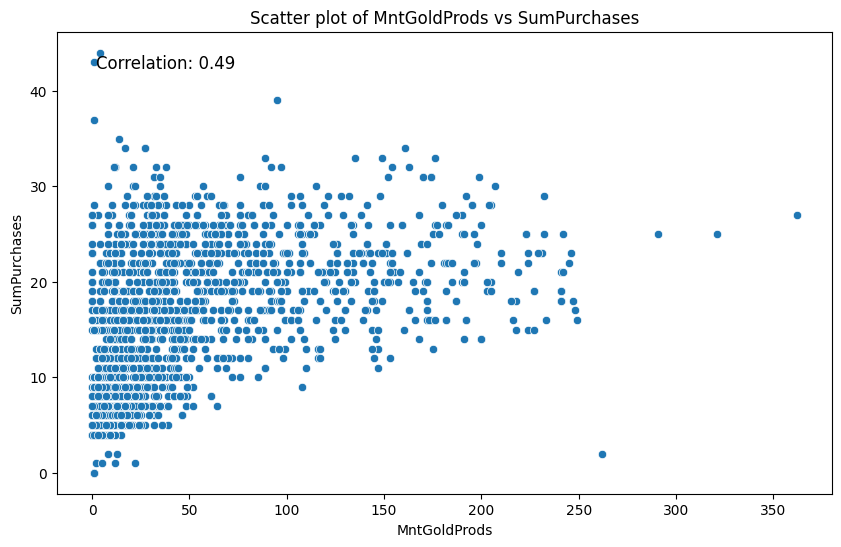

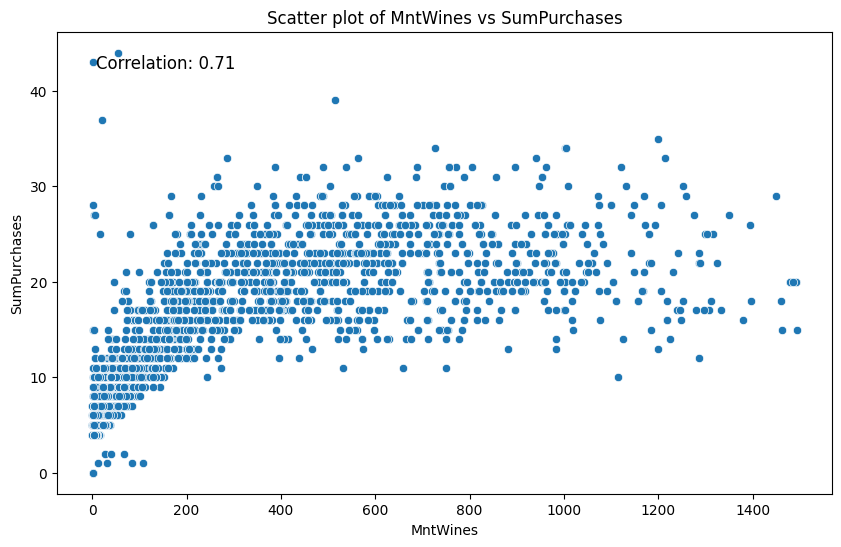

In [36]:
# look at all
for col in ProductColumns:
    scatter_correlation(data,col,"SumPurchases")

### campaign

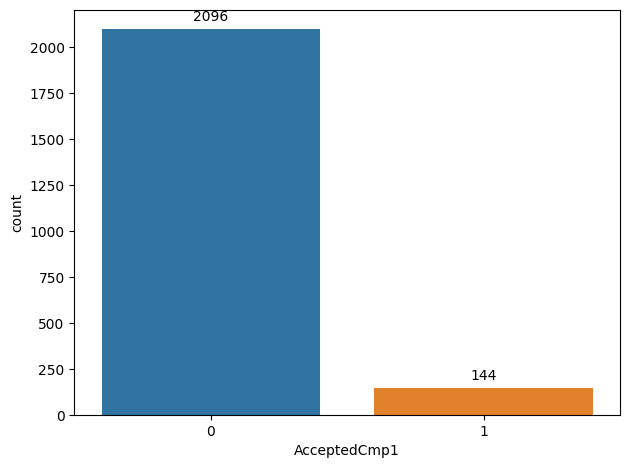

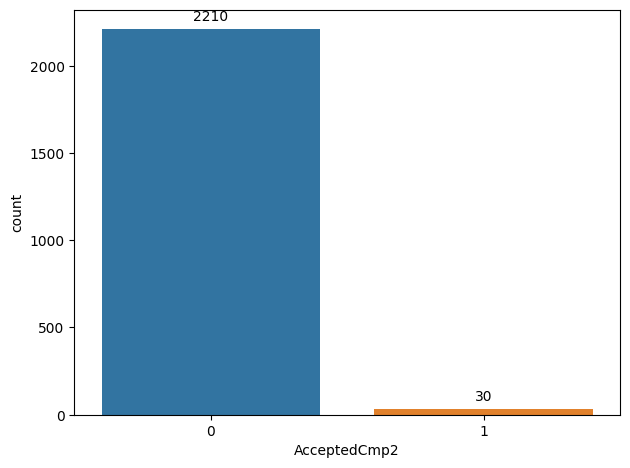

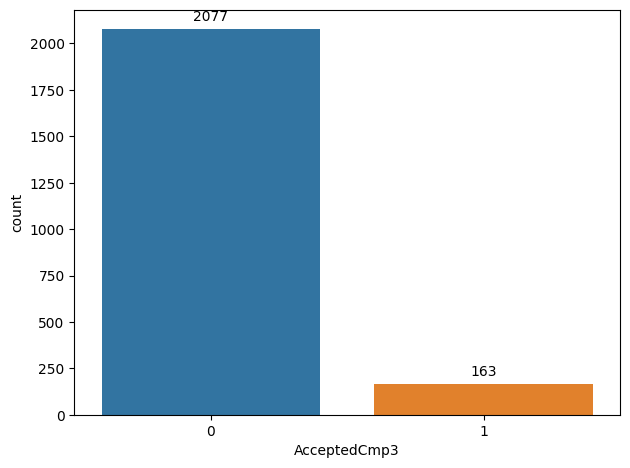

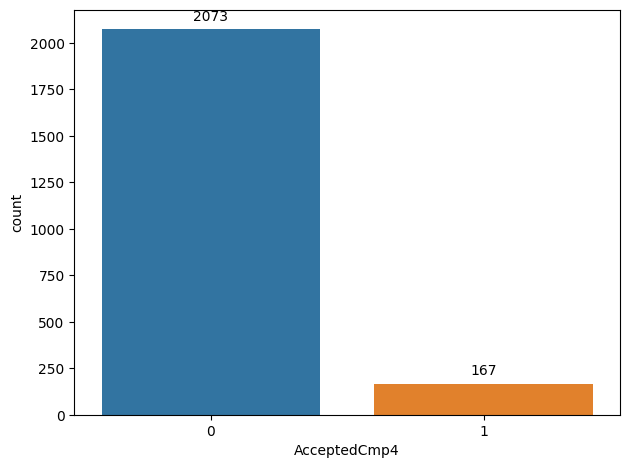

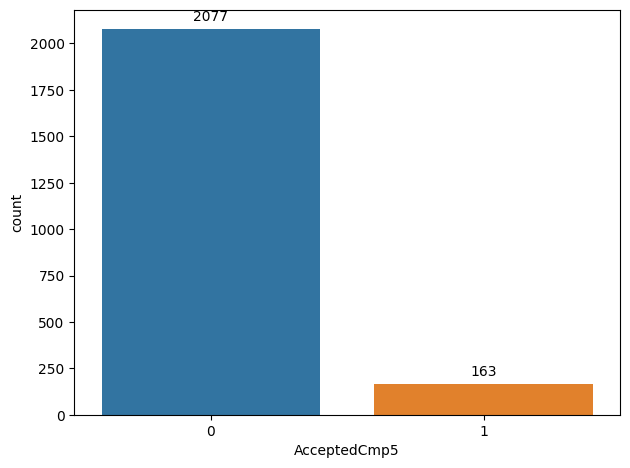

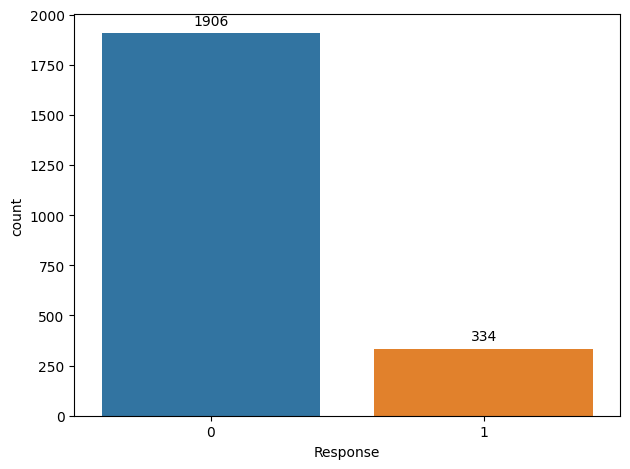

In [37]:
# look at campaign
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']


# how many people participate in every campaign
for cam in campaigns:
    ax = sns.countplot(data,x = cam)
    
    # Add the count above the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    


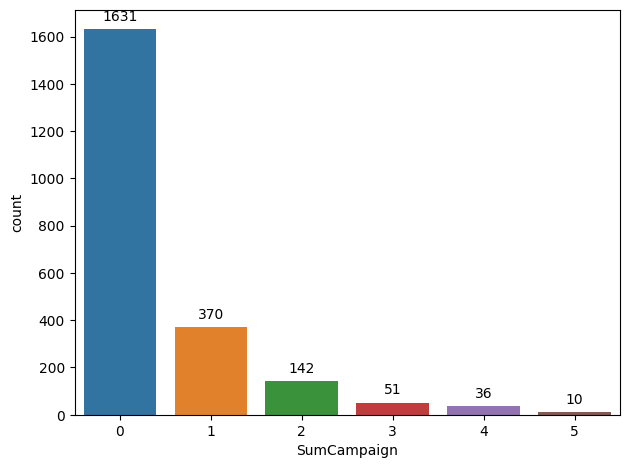

In [38]:
# how many people participate in more than campaign
data['SumCampaign'] =  (data['AcceptedCmp1'] + 
                       data['AcceptedCmp2'] + 
                       data['AcceptedCmp3'] + 
                       data['AcceptedCmp4'] + 
                       data['AcceptedCmp5'] + 
                       data['Response']) # respons is the last campaign




#camCount =  pd.DataFrame(data.groupby('SumCampaign').count()['ID'].reset_index())
#camCount.columns = ['SumCampaign','count']
#sns.histplot(camCount,x="count")

ax = sns.countplot(data,x="SumCampaign")

# Add the count above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()


- most customers not participate in any campaign

### overall correlation.

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


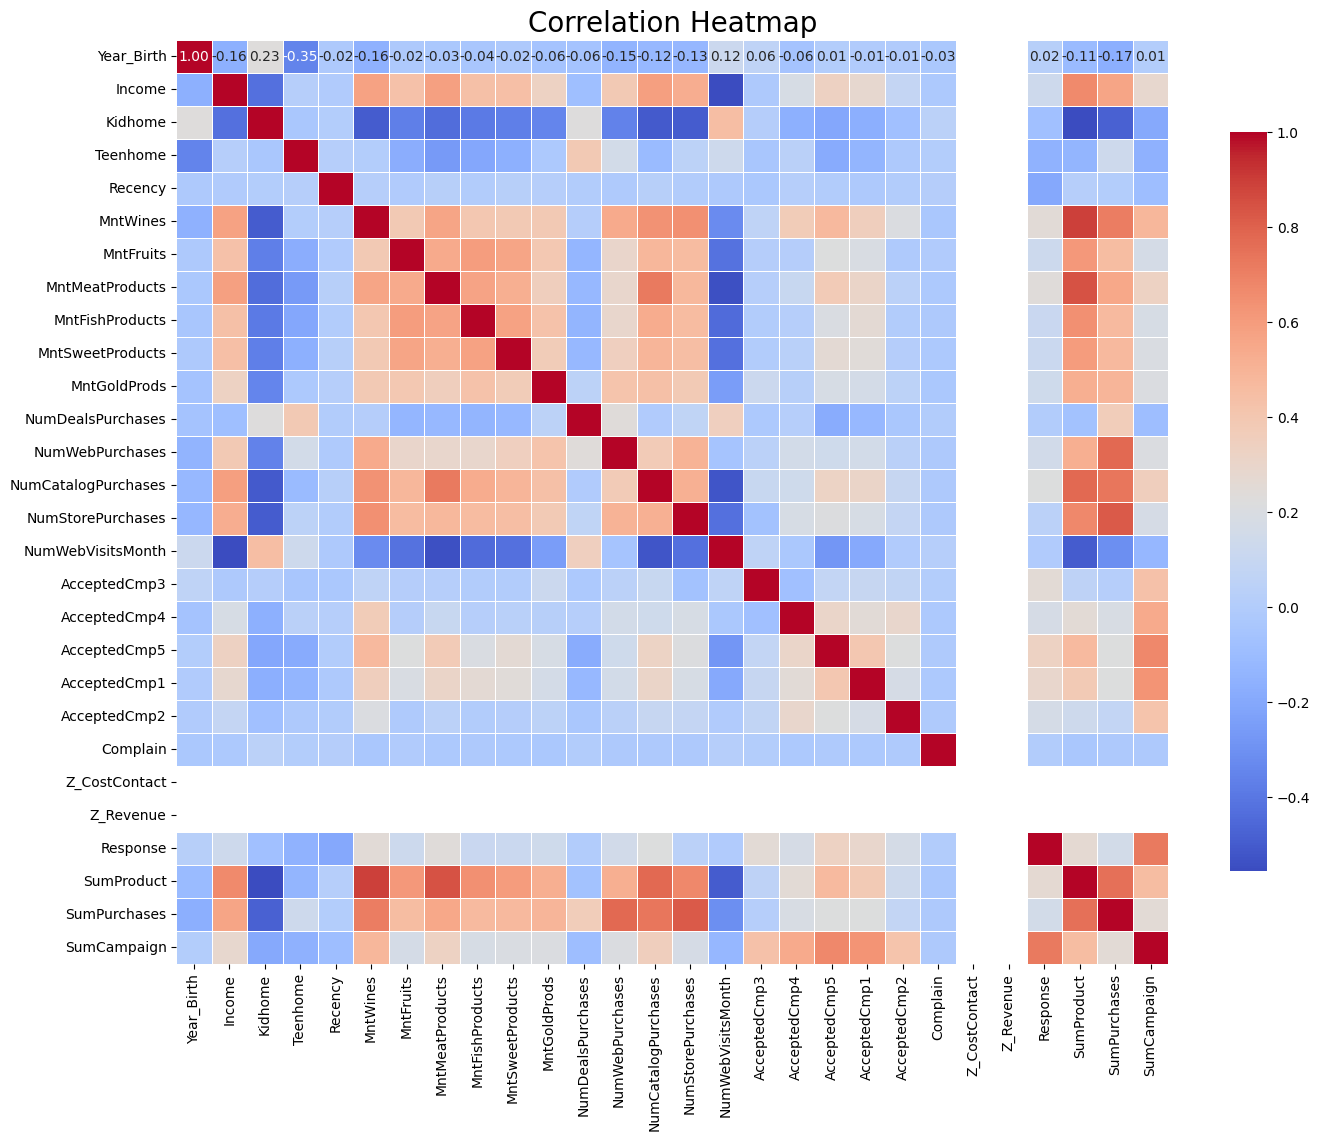

In [39]:
# a look at correlation 
# Set the figure size for a bigger image
plt.figure(figsize=(16, 12))

# Create the heatmap with annotations and a coolwarm colormap
sns.heatmap(data.select_dtypes(['float', 'int']).corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',  # Format the annotations to 2 decimal places
            linewidths=0.5,  # Add lines between cells for better readability
            cbar_kws={'shrink': 0.8})  # Shrink the color bar to fit better

# Add a title for context
plt.title('Correlation Heatmap', fontsize=20)

# Display the heatmap
plt.show()

In [40]:
print(f"Z_Revenue nunique = {data.Z_Revenue.nunique()}")
print(f"Z_CostContact nunique = {data.Z_CostContact.nunique()}")

Z_Revenue nunique = 1
Z_CostContact nunique = 1


## what is the kind of the distributions ?

- i will work with some discrete features as a continuous for two reason: 
    - big nunique number. 
    - the ordinal is matter.

### Normal ?

In [41]:
# first drop null points
null_out_data = data.dropna() 
null_out_data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
SumProduct             0
SumPurchases           0
SumCampaign            0
dtype: int64

Shapiro-Wilk Test Statistic: 0.9755173325538635
p-value: 0.00000000000000000048
 Year_Birth is Not normal


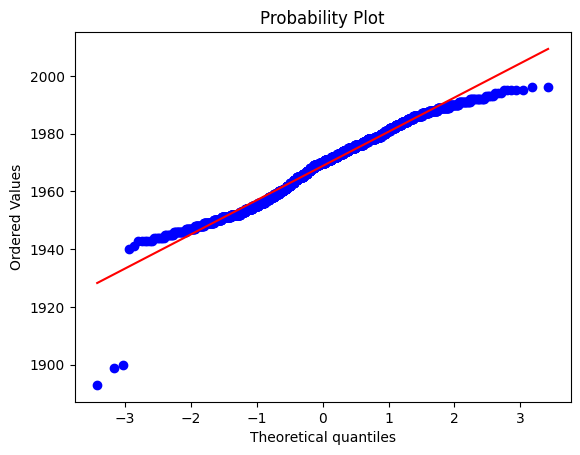

Shapiro-Wilk Test Statistic: 0.7770531177520752
p-value: 0.00000000000000000000
 Income is Not normal


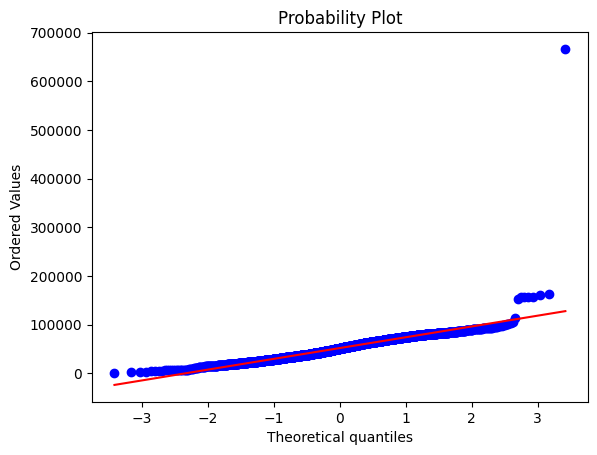

Shapiro-Wilk Test Statistic: 0.954283595085144
p-value: 0.00000000000000000000
 Recency is Not normal


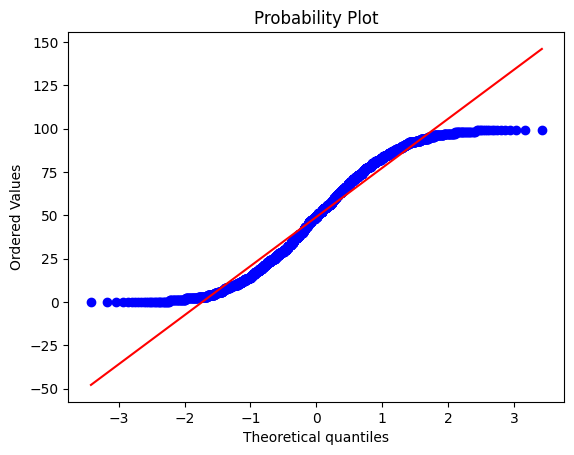

Shapiro-Wilk Test Statistic: 0.8388119339942932
p-value: 0.00000000000000000000
 MntWines is Not normal


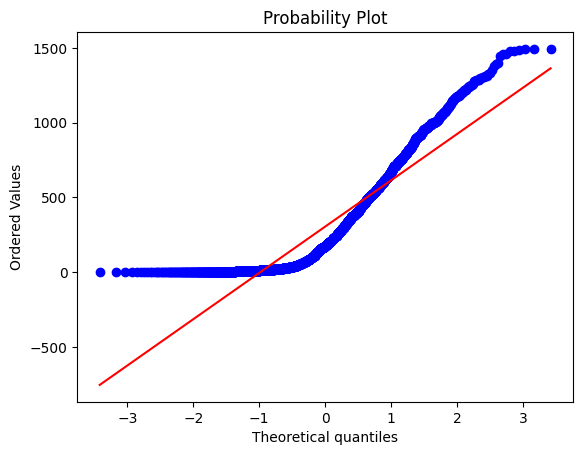

Shapiro-Wilk Test Statistic: 0.6896465420722961
p-value: 0.00000000000000000000
 MntFruits is Not normal


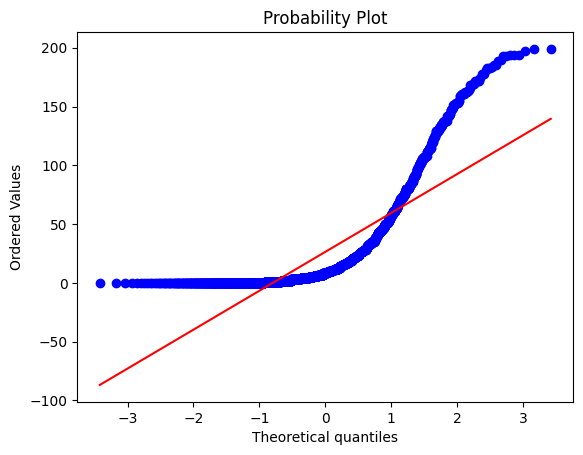

Shapiro-Wilk Test Statistic: 0.7337419986724854
p-value: 0.00000000000000000000
 MntMeatProducts is Not normal


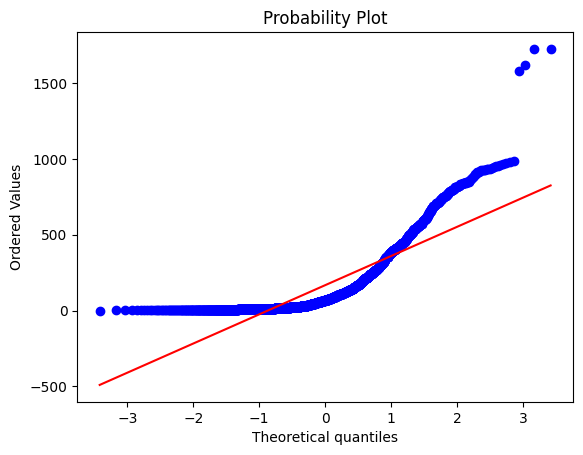

Shapiro-Wilk Test Statistic: 0.7088431119918823
p-value: 0.00000000000000000000
 MntFishProducts is Not normal


Shapiro-Wilk Test Statistic: 0.6883111596107483
p-value: 0.00000000000000000000
 MntSweetProducts is Not normal


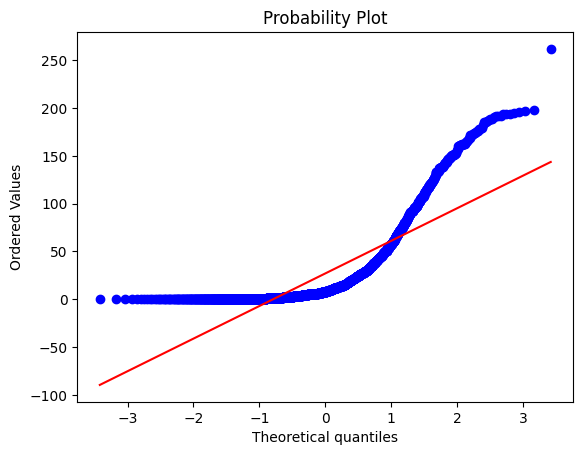

Shapiro-Wilk Test Statistic: 0.7695824503898621
p-value: 0.00000000000000000000
 MntGoldProds is Not normal


Shapiro-Wilk Test Statistic: 0.7403451204299927
p-value: 0.00000000000000000000
 NumDealsPurchases is Not normal


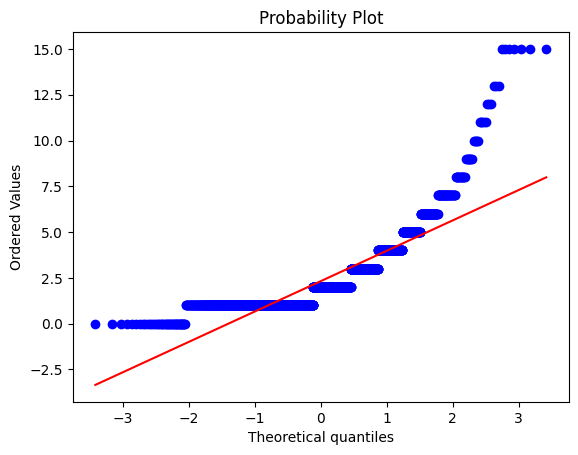

Shapiro-Wilk Test Statistic: 0.9085198640823364
p-value: 0.00000000000000000000
 NumWebPurchases is Not normal


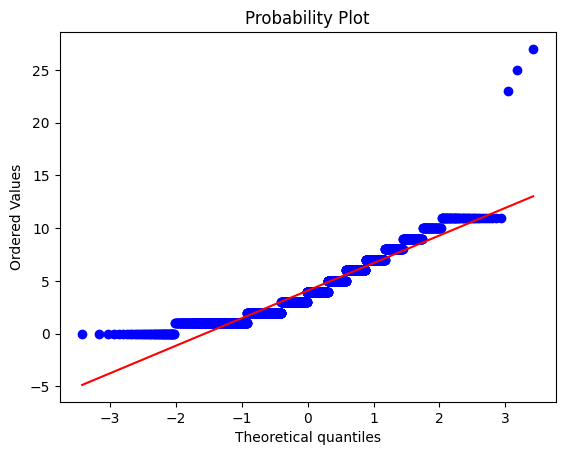

Shapiro-Wilk Test Statistic: 0.8153939247131348
p-value: 0.00000000000000000000
 NumCatalogPurchases is Not normal


Shapiro-Wilk Test Statistic: 0.9040797352790833
p-value: 0.00000000000000000000
 NumStorePurchases is Not normal


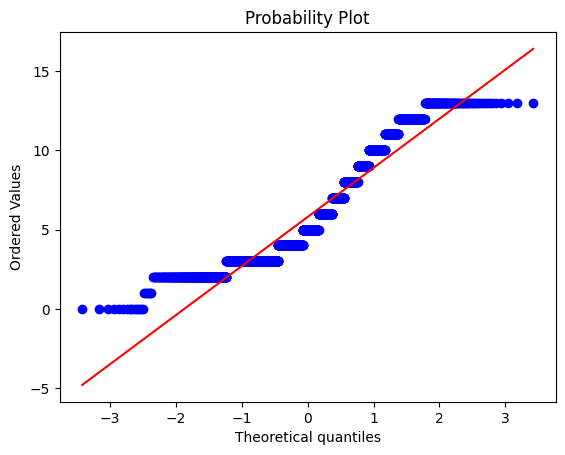

Shapiro-Wilk Test Statistic: 0.9297239780426025
p-value: 0.00000000000000000000
 NumWebVisitsMonth is Not normal


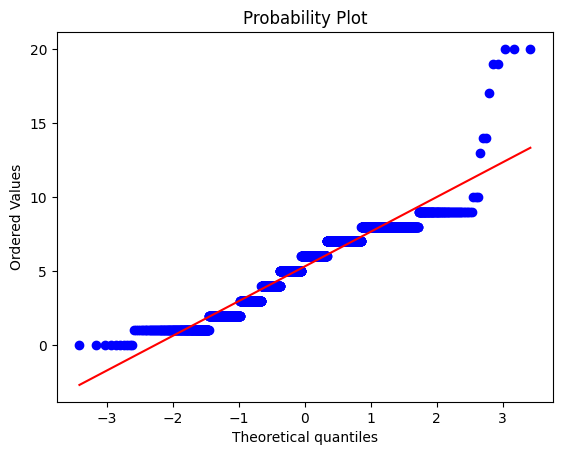

In [42]:
# # Shapiro-Wilk Test
for feature_name in selected_columns:
    feature = null_out_data[feature_name]
    
    # Shapiro-Wilk Test
    stat, p_value = stats.shapiro(feature)
    print('Shapiro-Wilk Test Statistic:', stat)
    print('p-value:', format(p_value,'.20f'))

    if p_value >= 0.05:
        print(f" {feature_name} is Normal")
    else:
        print(f" {feature_name} is Not normal")

    # Q-Q Plot
    stats.probplot(feature, dist="norm", plot=plt)
    plt.show()


### Not normal, is or near to what ?

In [43]:
distributions = [
    'norm', 'expon', 'lognorm', 'gamma', 'beta', 'weibull_min', 'weibull_max', 
    'cauchy', 'chi2', 'f', 't', 'laplace', 'logistic', 'uniform', 'pareto', 
    'powerlaw', 'rayleigh', 'gumbel_r', 'gumbel_l', 'sech', 'invgauss', 'triang'
] # may use this list instead of testing 80 ( fitter will test all scipy distrbutions, they are 80 distribution )

2024-08-06 13:41:04.903 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.003399)
2024-08-06 13:41:04.930 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.01984)
2024-08-06 13:41:04.981 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.009275)
2024-08-06 13:41:05.052 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.001575)
2024-08-06 13:41:05.056 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.001439)
2024-08-06 13:41:05.062 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.012481)
2024-08-06 13:41:05.076 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.001428)
2024-08-06 13:41:05.178 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted unif

     index  sumsquare_error
0     norm         0.001428
1    gamma         0.001439
2  lognorm         0.001460
3     chi2         0.001575
-------------------------- Year_Birth ------------------------------------


2024-08-06 13:41:05.563 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2024-08-06 13:41:05.566 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2024-08-06 13:41:05.570 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.0)
2024-08-06 13:41:05.571 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.0)
2024-08-06 13:41:05.575 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.0)
2024-08-06 13:41:05.642 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.0)
2024-08-06 13:41:05.669 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.0)
2024-08-06 13:41:05.701 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponpow distribution with error=0

  index  sumsquare_error
0  norm     7.091449e-11
-------------------------- Income ------------------------------------


2024-08-06 13:41:06.456 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0)
2024-08-06 13:41:06.469 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.0)


2024-08-06 13:41:06.666 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.002943)
2024-08-06 13:41:06.667 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.000505)
2024-08-06 13:41:06.668 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.001804)
2024-08-06 13:41:06.669 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.001671)
2024-08-06 13:41:06.675 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.002907)
2024-08-06 13:41:06.704 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.001804)
2024-08-06 13:41:06.709 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.0188)
2024-08-06 13:41:06.736 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted ch

     index  sumsquare_error
0  uniform         0.000505
-------------------------- Recency ------------------------------------


2024-08-06 13:41:07.152 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.000114)
2024-08-06 13:41:07.153 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.000183)
2024-08-06 13:41:07.154 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.000201)
2024-08-06 13:41:07.155 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.000175)
2024-08-06 13:41:07.163 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.000163)
2024-08-06 13:41:07.219 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=5.5e-05)
2024-08-06 13:41:07.221 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=2.9e-05)
2024-08-06 13:41:07.250 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gam

      index  sumsquare_error
0  powerlaw         0.000029
-------------------------- MntWines ------------------------------------


2024-08-06 13:41:07.513 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.009276)
2024-08-06 13:41:07.516 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.017751)
2024-08-06 13:41:07.516 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.020204)
2024-08-06 13:41:07.519 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.016784)
2024-08-06 13:41:07.524 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.009143)
2024-08-06 13:41:07.573 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.020327)
2024-08-06 13:41:07.581 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.001761)
2024-08-06 13:41:07.586 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted 

   index  sumsquare_error
0  gamma         0.001761
-------------------------- MntFruits ------------------------------------


2024-08-06 13:41:07.738 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponpow distribution with error=0.002304)


2024-08-06 13:41:07.943 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.000123)
2024-08-06 13:41:07.946 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.00032)
2024-08-06 13:41:07.946 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.000258)
2024-08-06 13:41:07.948 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.000242)
2024-08-06 13:41:07.958 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.000154)
2024-08-06 13:41:07.992 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=9.3e-05)
2024-08-06 13:41:08.003 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1.3e-05)
2024-08-06 13:41:08.040 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted c

     index  sumsquare_error
0  lognorm         0.000013
-------------------------- MntMeatProducts ------------------------------------


2024-08-06 13:41:08.327 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.005591)
2024-08-06 13:41:08.329 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.010173)
2024-08-06 13:41:08.332 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.009664)
2024-08-06 13:41:08.339 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.011364)
2024-08-06 13:41:08.341 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.00566)
2024-08-06 13:41:08.398 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.00114)
2024-08-06 13:41:08.405 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.003155)
2024-08-06 13:41:08.414 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerl

   index  sumsquare_error
0  gamma          0.00114
-------------------------- MntFishProducts ------------------------------------


2024-08-06 13:41:08.752 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.008109)
2024-08-06 13:41:08.753 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.016807)
2024-08-06 13:41:08.757 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.014605)
2024-08-06 13:41:08.758 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.013886)
2024-08-06 13:41:08.766 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.007929)
2024-08-06 13:41:08.800 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.016677)
2024-08-06 13:41:08.836 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.000937)
2024-08-06 13:41:08.837 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted 

   index  sumsquare_error
0  gamma         0.000937
-------------------------- MntSweetProducts ------------------------------------


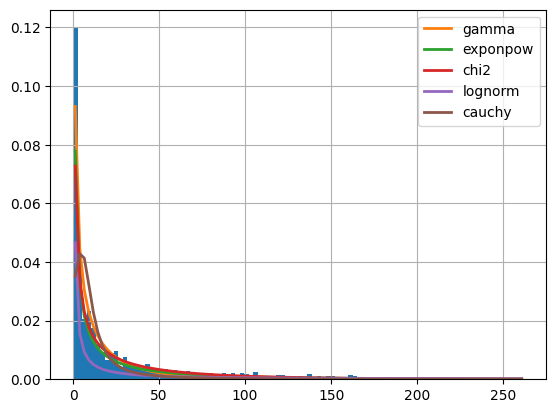

2024-08-06 13:41:09.136 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.000405)
2024-08-06 13:41:09.137 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.002362)
2024-08-06 13:41:09.138 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.003555)
2024-08-06 13:41:09.139 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.002029)
2024-08-06 13:41:09.147 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.001293)
2024-08-06 13:41:09.183 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.002303)
2024-08-06 13:41:09.203 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.001913)
2024-08-06 13:41:09.222 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitte

   index  sumsquare_error
0   chi2         0.000099
1  gamma         0.000104
-------------------------- MntGoldProds ------------------------------------


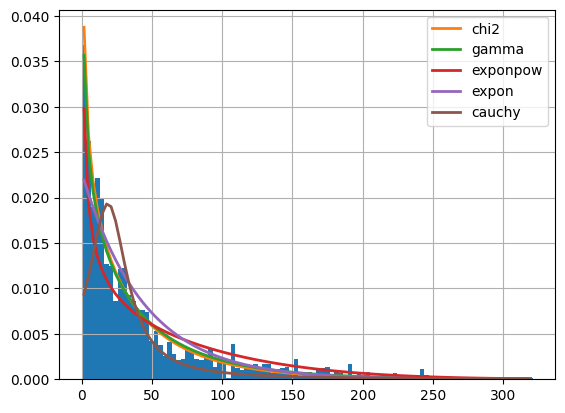

2024-08-06 13:41:09.496 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=10.603822)
2024-08-06 13:41:09.498 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=10.588473)
2024-08-06 13:41:09.500 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=11.340467)
2024-08-06 13:41:09.502 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=10.448454)
2024-08-06 13:41:09.505 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=10.408409)
2024-08-06 13:41:09.544 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=10.211317)
2024-08-06 13:41:09.554 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=10.099892)
2024-08-06 13:41:09.565 | INFO     | fitter.fitter:_fit_single_distribution:333 - F

      index  sumsquare_error
0   lognorm        10.099892
1     gamma        10.211317
2    cauchy        10.408409
3  rayleigh        10.448454
4  exponpow        10.552931
-------------------------- NumDealsPurchases ------------------------------------


2024-08-06 13:41:09.874 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=1.270976)
2024-08-06 13:41:09.876 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1.225372)
2024-08-06 13:41:09.877 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=1.480237)
2024-08-06 13:41:09.877 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=1.202353)
2024-08-06 13:41:09.883 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=1.237149)
2024-08-06 13:41:09.887 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1.190072)
2024-08-06 13:41:09.918 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1.196195)
2024-08-06 13:41:09.957 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted p

      index  sumsquare_error
0     gamma         1.190072
1   lognorm         1.196195
2  rayleigh         1.202353
3      norm         1.225372
4    cauchy         1.237149
-------------------------- NumWebPurchases ------------------------------------


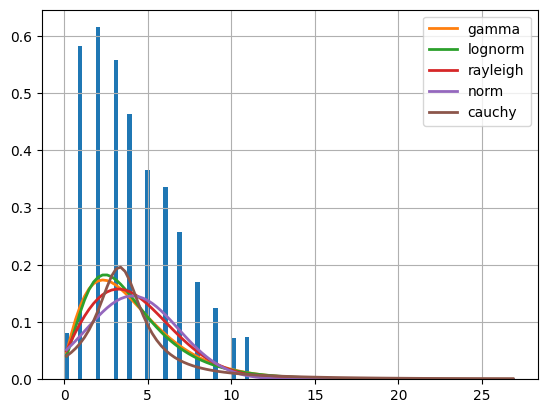

2024-08-06 13:41:10.258 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=1.25149)
2024-08-06 13:41:10.260 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=1.855756)
2024-08-06 13:41:10.260 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1.573739)
2024-08-06 13:41:10.268 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=1.495678)
2024-08-06 13:41:10.269 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=1.525032)
2024-08-06 13:41:10.328 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1.110412)
2024-08-06 13:41:10.348 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=1.902082)
2024-08-06 13:41:10.374 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted c

      index  sumsquare_error
0  exponpow         1.035925
1      chi2         1.063693
2     gamma         1.110412
-------------------------- NumCatalogPurchases ------------------------------------


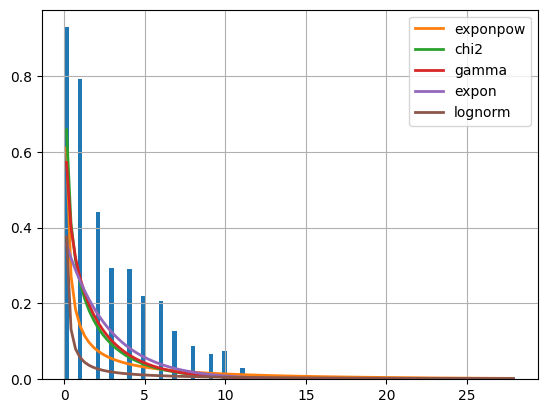

2024-08-06 13:41:10.740 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=6.201168)
2024-08-06 13:41:10.743 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=6.024351)
2024-08-06 13:41:10.743 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=6.068188)
2024-08-06 13:41:10.748 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=5.943937)
2024-08-06 13:41:10.751 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=5.977803)
2024-08-06 13:41:10.758 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=5.906319)
2024-08-06 13:41:10.802 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=5.887179)
2024-08-06 13:41:10.807 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted p

      index  sumsquare_error
0   lognorm         5.887179
1     gamma         5.906319
2  rayleigh         5.943937
3    cauchy         5.977803
4      norm         6.024351
-------------------------- NumStorePurchases ------------------------------------


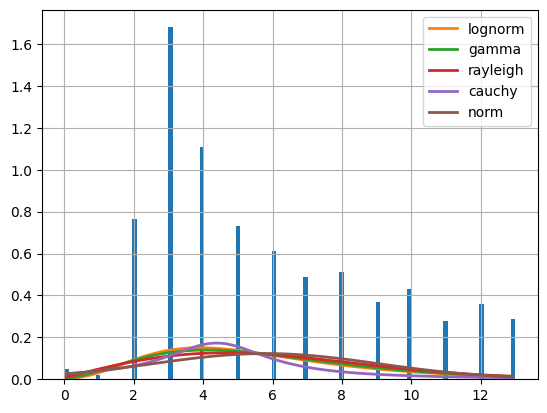

2024-08-06 13:41:11.109 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=2.841211)
2024-08-06 13:41:11.111 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=2.873239)
2024-08-06 13:41:11.112 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=2.565169)
2024-08-06 13:41:11.115 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=2.602543)
2024-08-06 13:41:11.120 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=2.616496)
2024-08-06 13:41:11.157 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=3.44535)
2024-08-06 13:41:11.168 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=2.573355)
2024-08-06 13:41:11.211 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted c

      index  sumsquare_error
0      norm         2.565169
1   lognorm         2.573222
2     gamma         2.573355
3  rayleigh         2.602543
4    cauchy         2.616496
-------------------------- NumWebVisitsMonth ------------------------------------


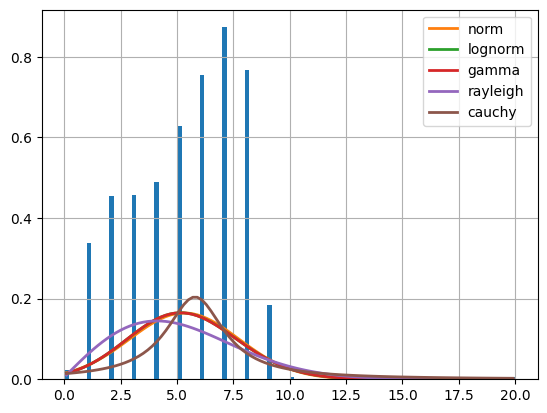

In [44]:
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

repeated_dist_con = defaultdict(int) # store the best repeated and the very near of it.
best_with_parameters_con = {}

scaler = MinMaxScaler() # to scale some discrete values to make the work with them as continus more practical

for feature_name in selected_columns:
    scaled_feature = scaler.fit_transform(null_out_data[feature_name].values.reshape(-1, 1))
    f = Fitter(null_out_data[feature_name], distributions='common' ) # will test 80 distributions 
    f.fit()
    
    # take the best with parameters
    best_with_parameters_con[feature_name] = f.get_best(method='sumsquare_error')

    # work with the top
    df_top = f.summary().iloc[:,0].reset_index() # take first column with the name of distributions
    
    lowest_error = df_top['sumsquare_error'][0]
    
    # select only near error from the lowest ---> this method is relative to the lowest --> lowest may be very big that's mean the feature not fit in any distribution from the list
    consider_error = lowest_error * 1.2 
    considerable_dist_df = df_top[df_top['sumsquare_error'] <= consider_error]
    print(considerable_dist_df)
    
    for dist in considerable_dist_df['index'].values:
        repeated_dist_con[dist] += 1
    print('--------------------------',feature_name,'------------------------------------')
    plt.show()
    
    

In [45]:
best_with_parameters_con

{'Year_Birth': {'norm': {'loc': 1968.8203971119133,
   'scale': 11.982849470420204}},
 'Income': {'norm': {'loc': 52247.25135379061, 'scale': 25167.396174162965}},
 'Recency': {'uniform': {'loc': 0.0, 'scale': 99.0}},
 'MntWines': {'powerlaw': {'a': 0.14628486798205922,
   'loc': -2.2250738585072014e-308,
   'scale': 1493.0000000000002}},
 'MntFruits': {'gamma': {'a': 0.44760992583297865,
   'loc': -3.2169172111582474e-27,
   'scale': 50.16948855686765}},
 'MntMeatProducts': {'lognorm': {'s': 1.6249348896326476,
   'loc': -0.07109594624250429,
   'scale': 59.22179252636816}},
 'MntFishProducts': {'gamma': {'a': 0.6683865829774187,
   'loc': -9.965671027150693e-28,
   'scale': 29.327220101126805}},
 'MntSweetProducts': {'gamma': {'a': 0.4116622946420774,
   'loc': -2.6118294104587824e-28,
   'scale': 30.369517782436304}},
 'MntGoldProds': {'chi2': {'df': 1.4416180421510116,
   'loc': -2.0546695889901157e-13,
   'scale': 26.12174512769487}},
 'NumDealsPurchases': {'lognorm': {'s': 0.6073

In [46]:
repeated_dist_con

defaultdict(int,
            {'norm': 5,
             'gamma': 10,
             'lognorm': 6,
             'chi2': 3,
             'uniform': 1,
             'powerlaw': 1,
             'cauchy': 4,
             'rayleigh': 4,
             'exponpow': 2})

### what about discrete distributions ?

Fitter library did not work with me in discrete distributions, when i check all distributions of it, all of them are countinus!, in the Fitter doc that Fitter work in both!

In [47]:
# get discrete columns

cat_columns = [feature for feature in data.select_dtypes(['int']).columns if data[feature].nunique() < 4]
cat_columns

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000654] [n=1] [p=0.408756] [chi^2=0.000654]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000795] [n=1] [p=0.470208] [chi^2=0.000795]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0] [n=1] [p=0.073556] [chi^2=nan]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discre

[distfit] >INFO> [distfit] >[binomial] [RSS=1.23e-32] [n=1] [p=0.0740072] [chi^2=nan]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0] [n=1] [p=0.0731047] [chi^2=nan]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0] [n=1] [p=0.0640794] [chi^2=nan]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transf

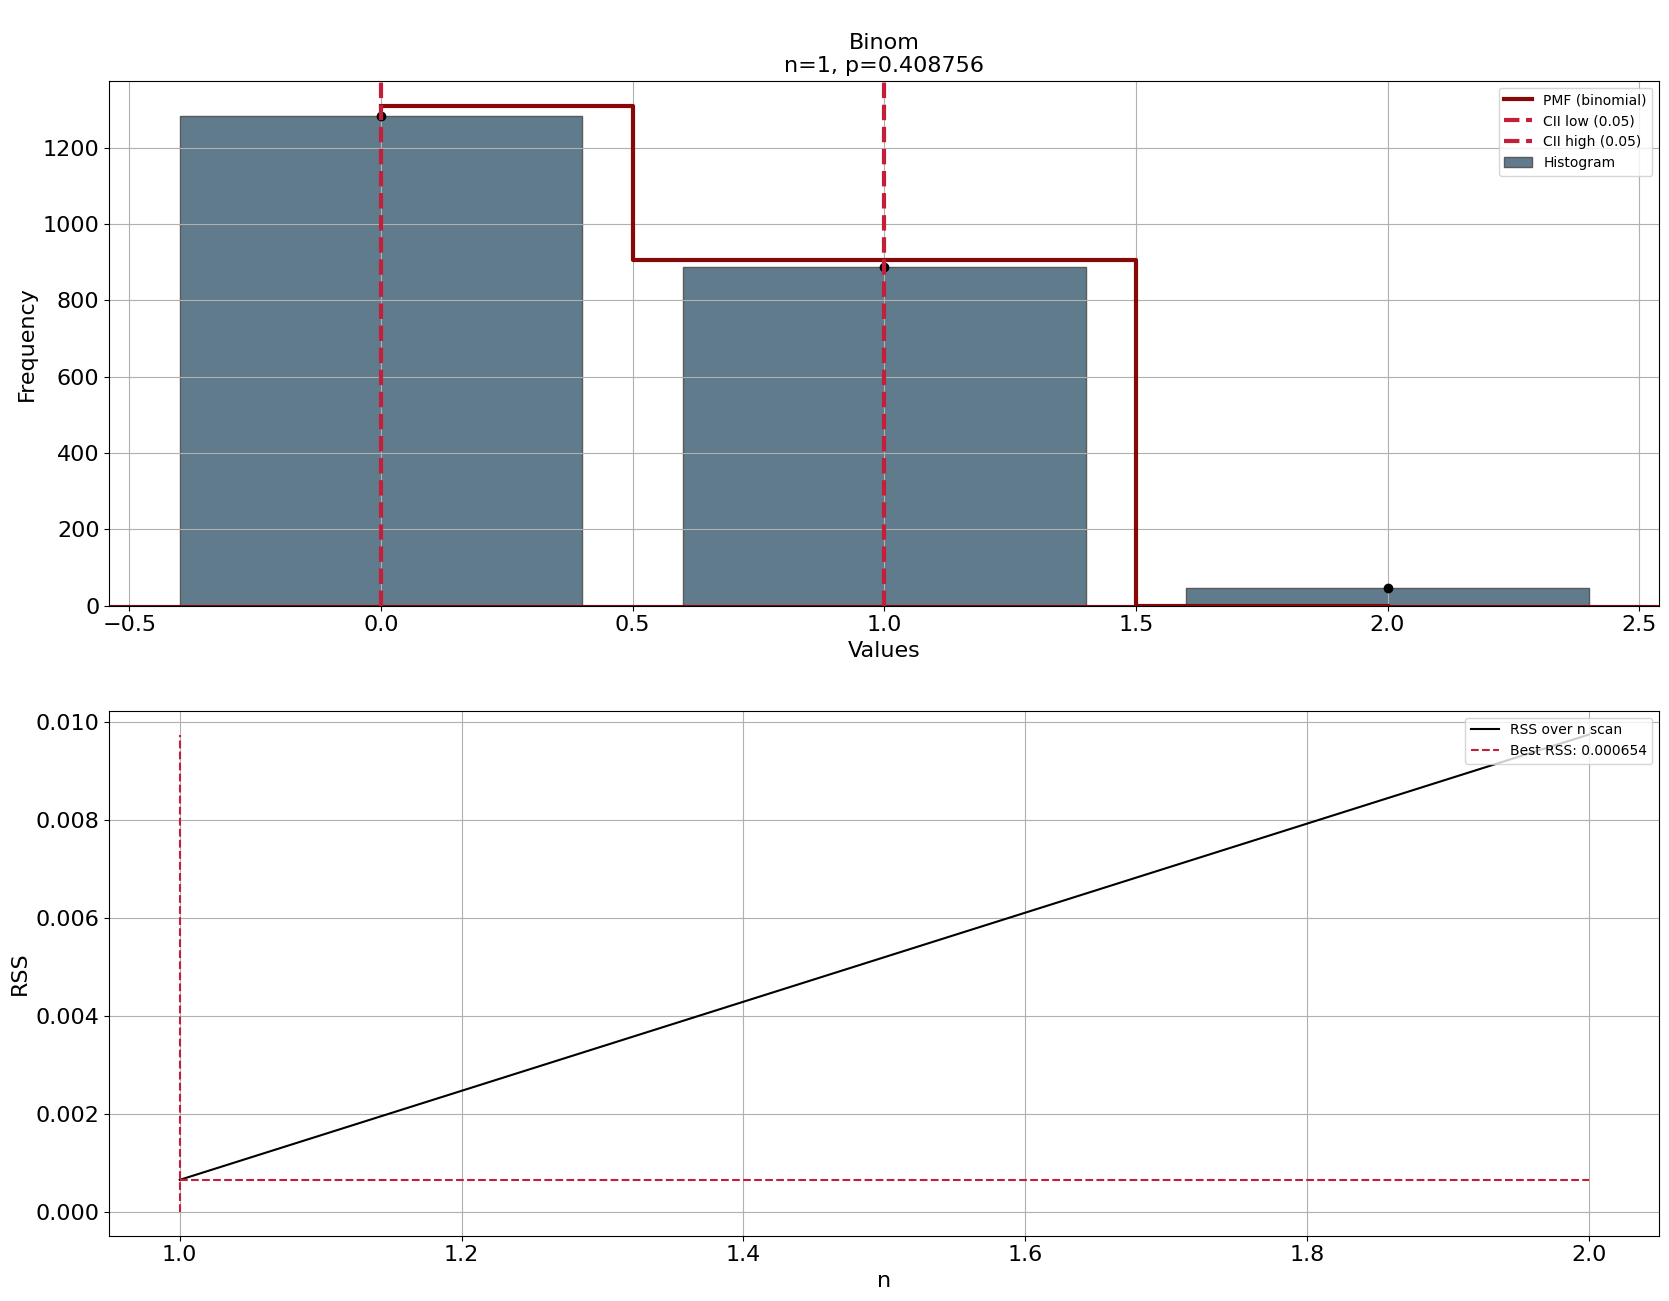

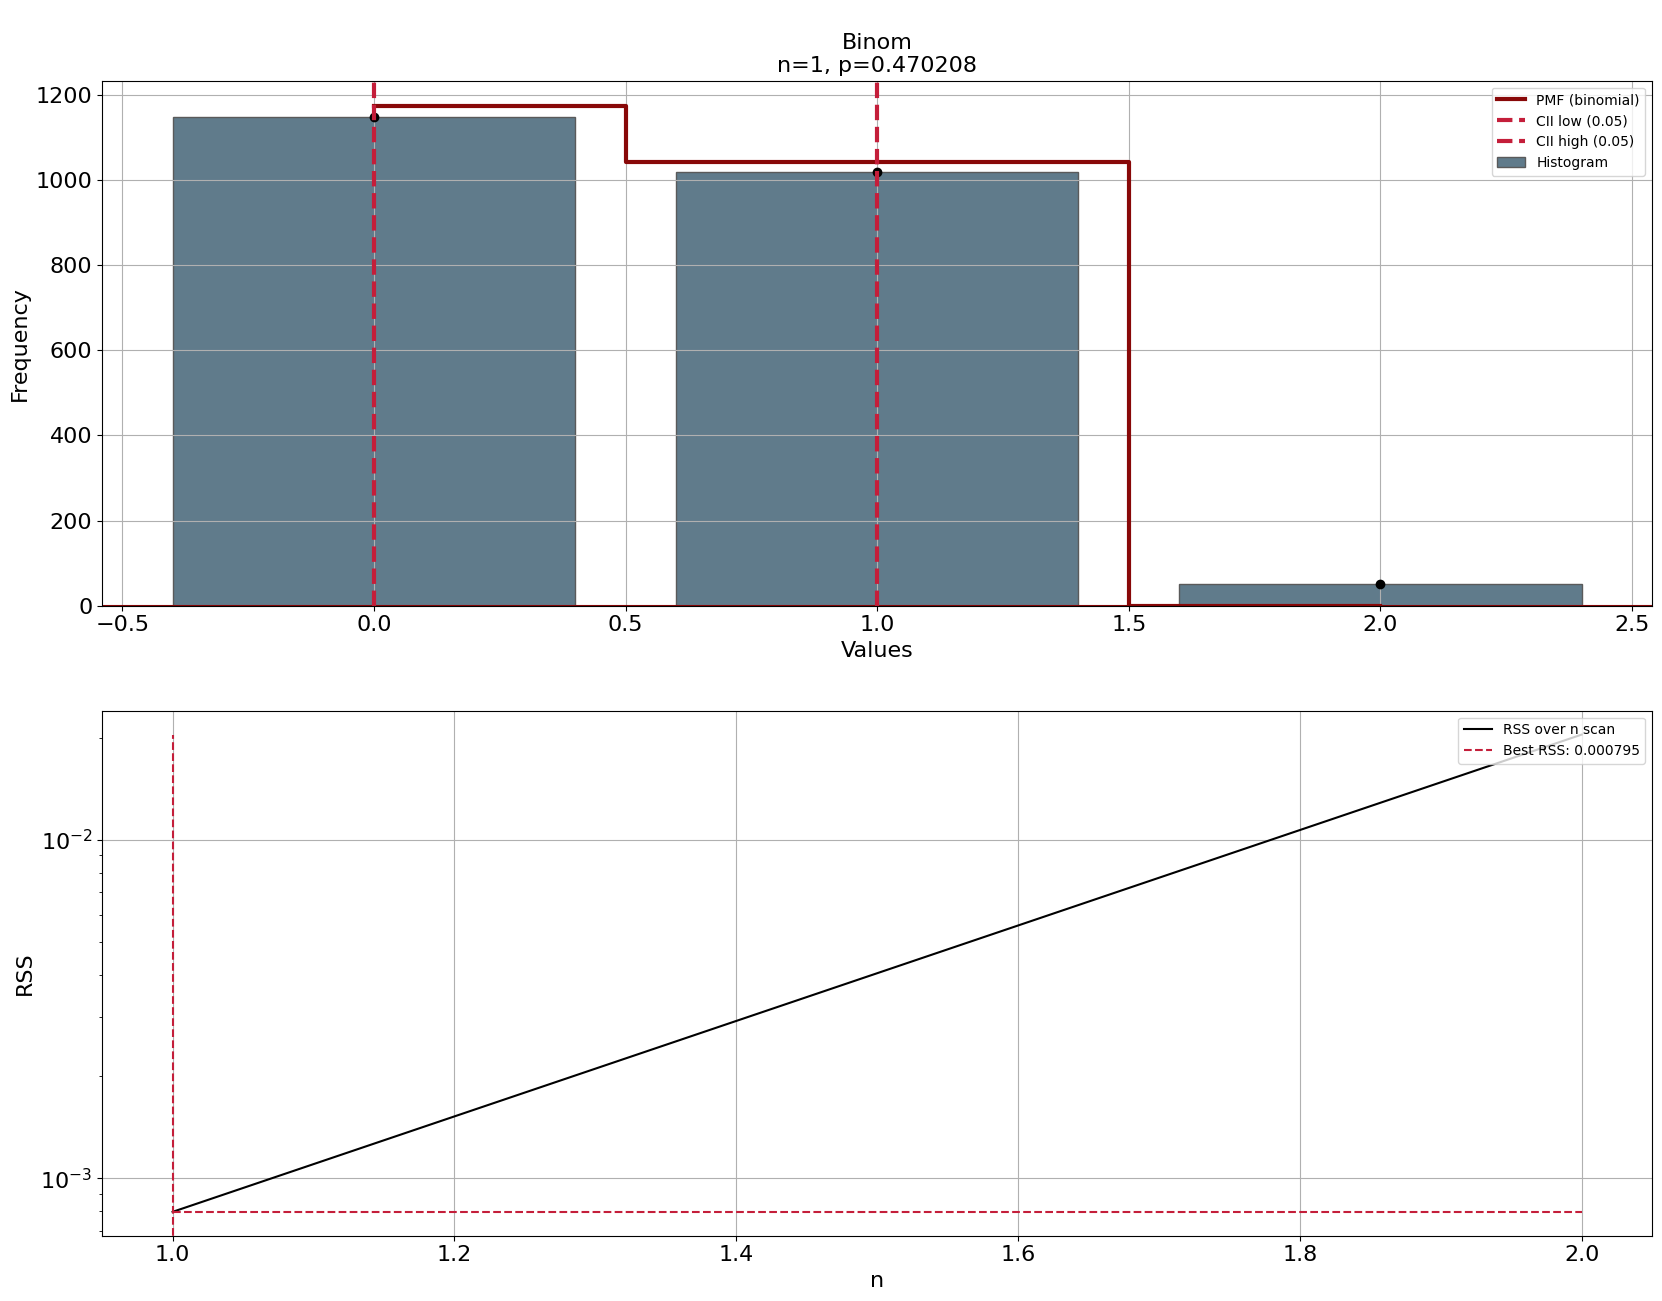

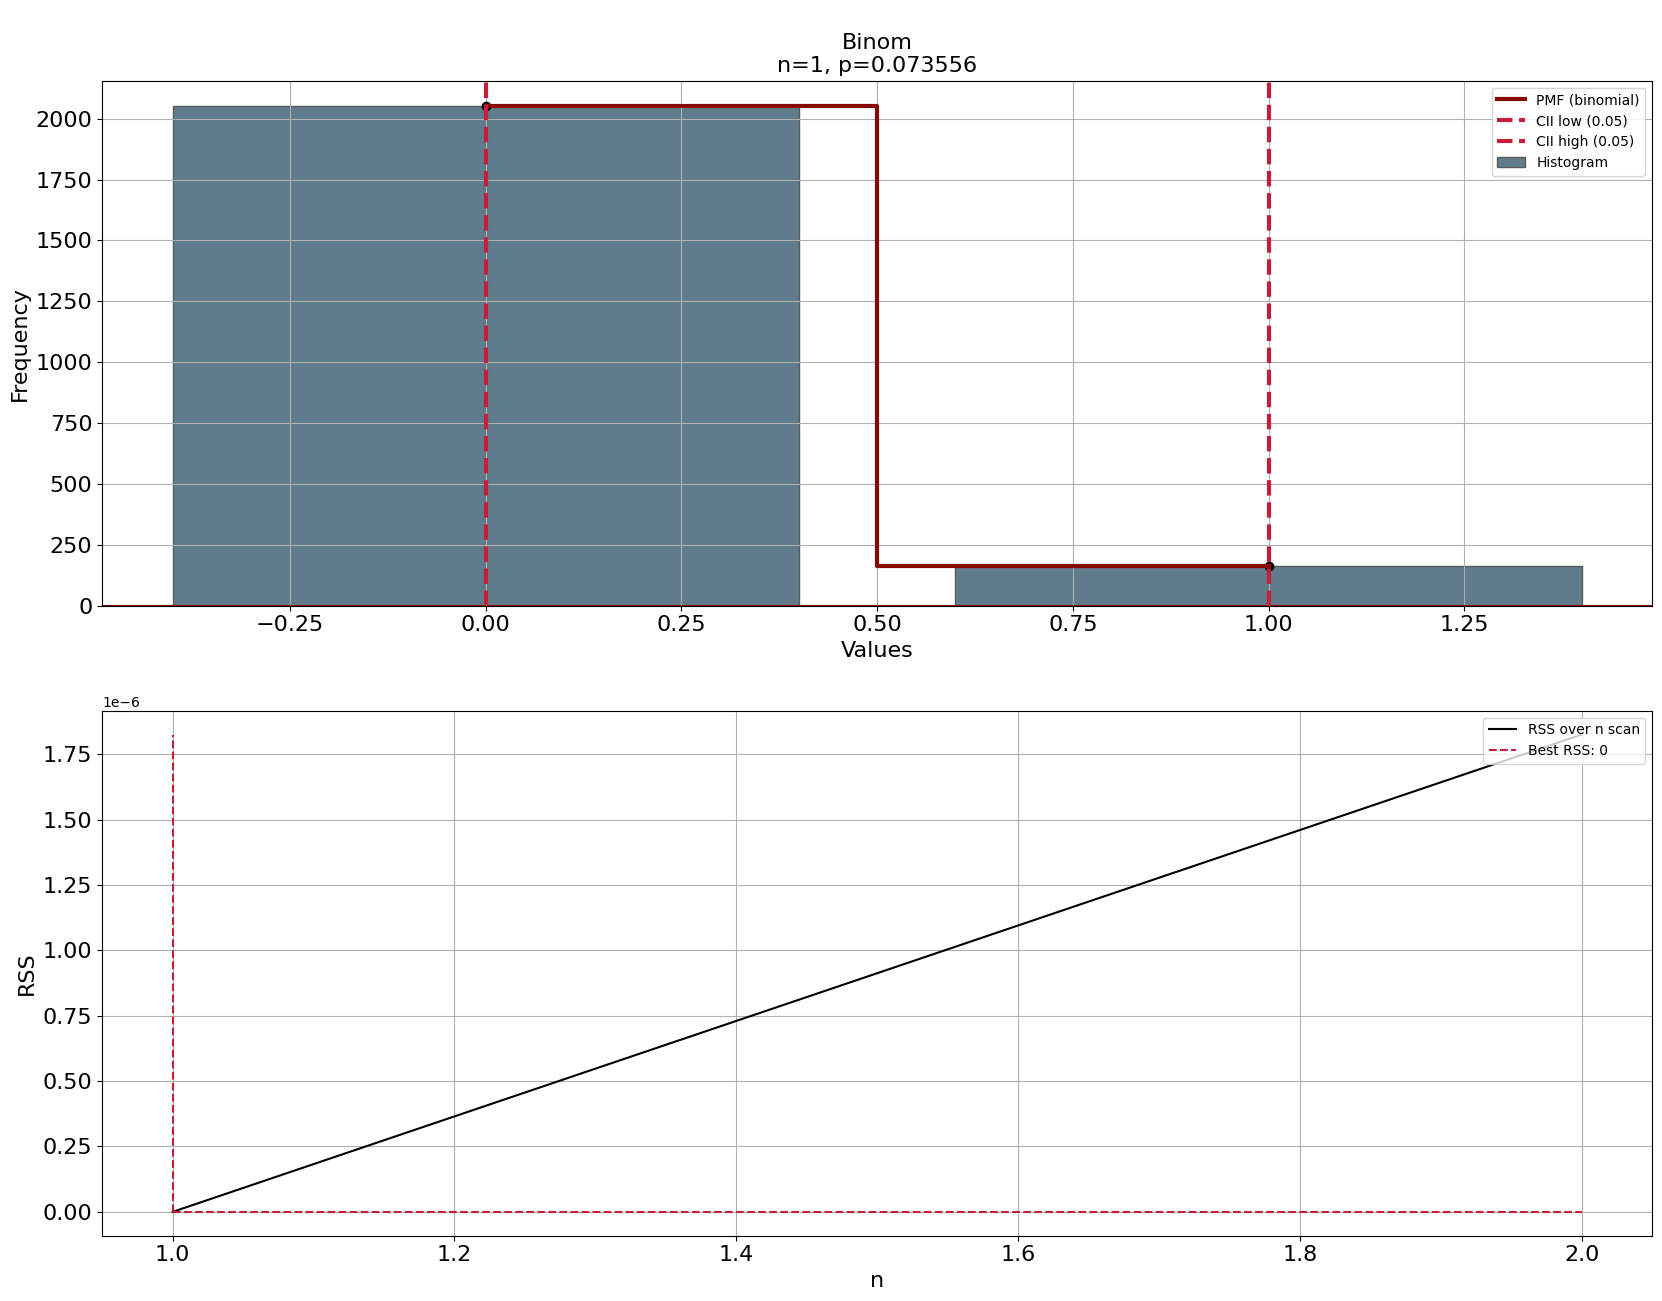

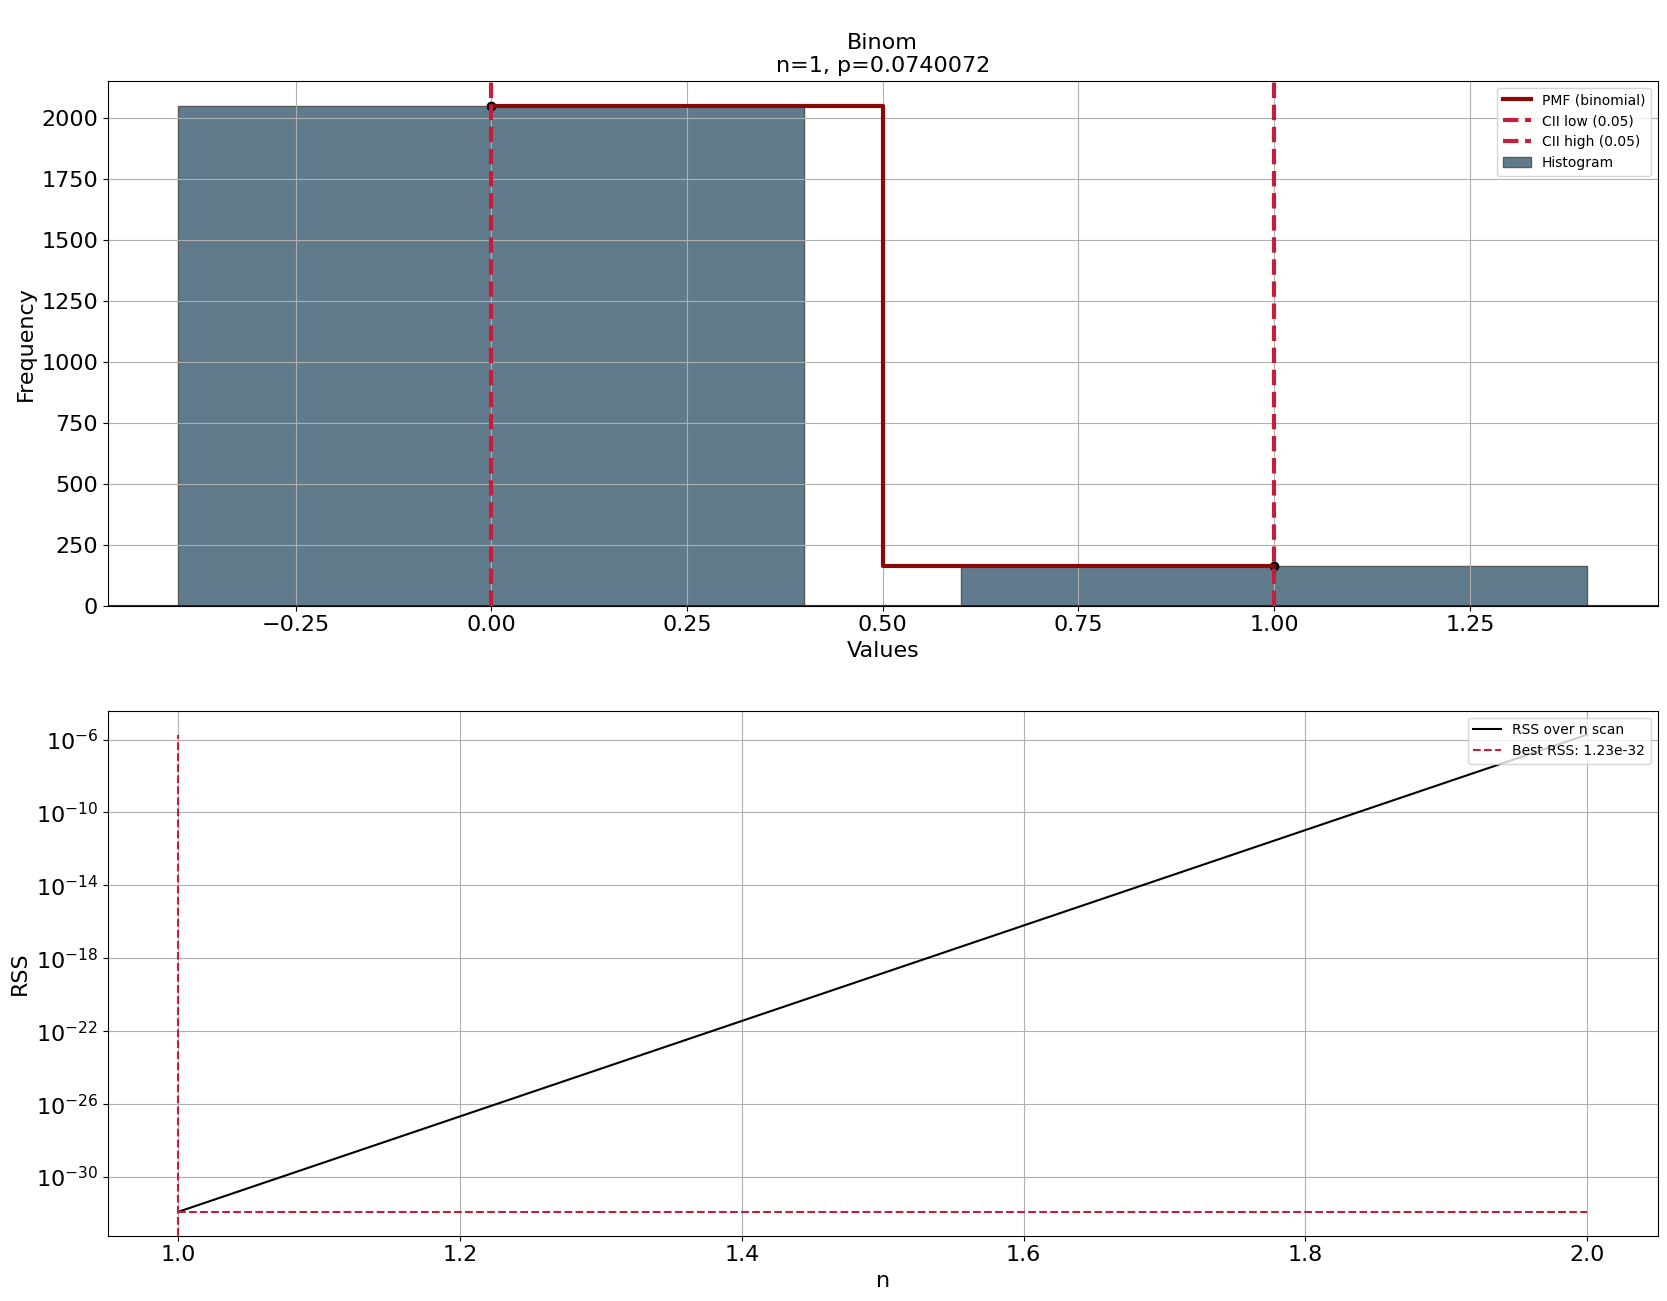

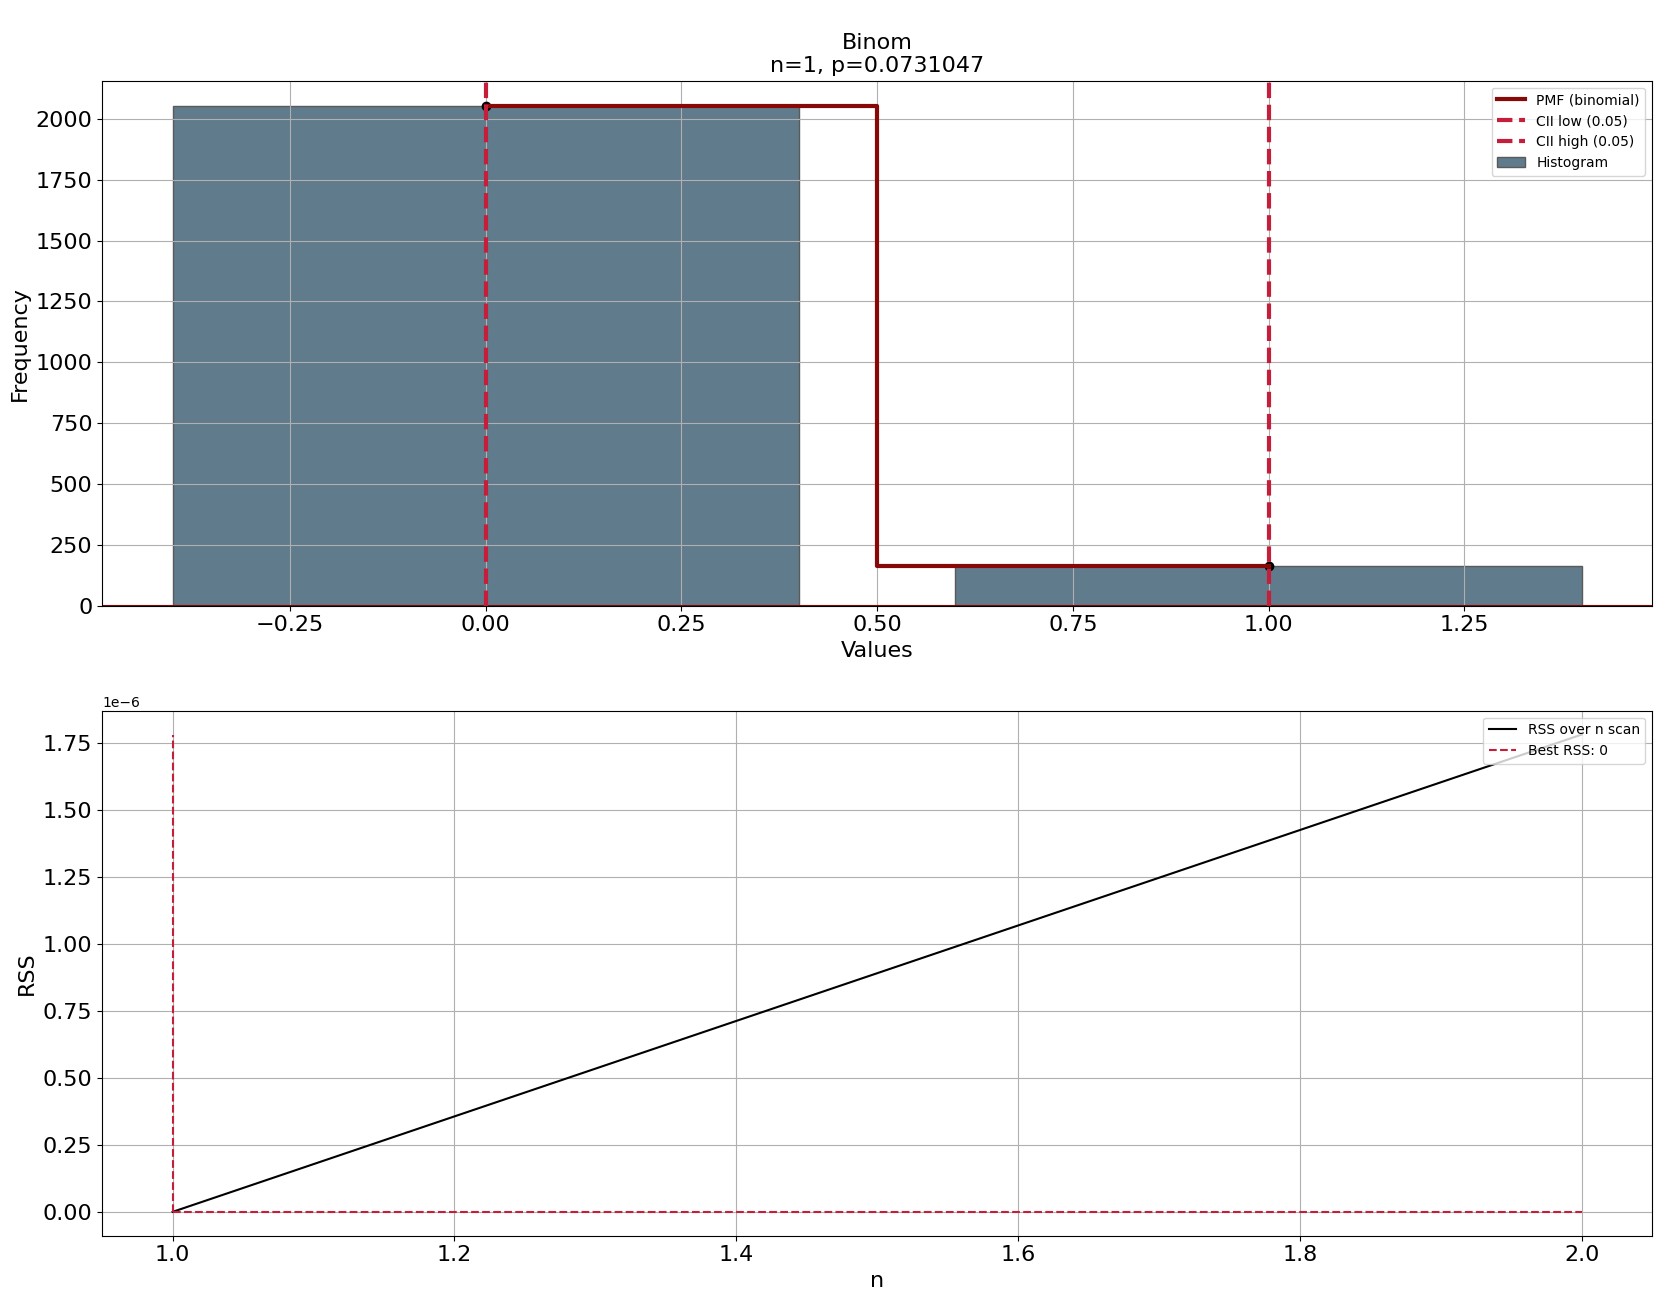

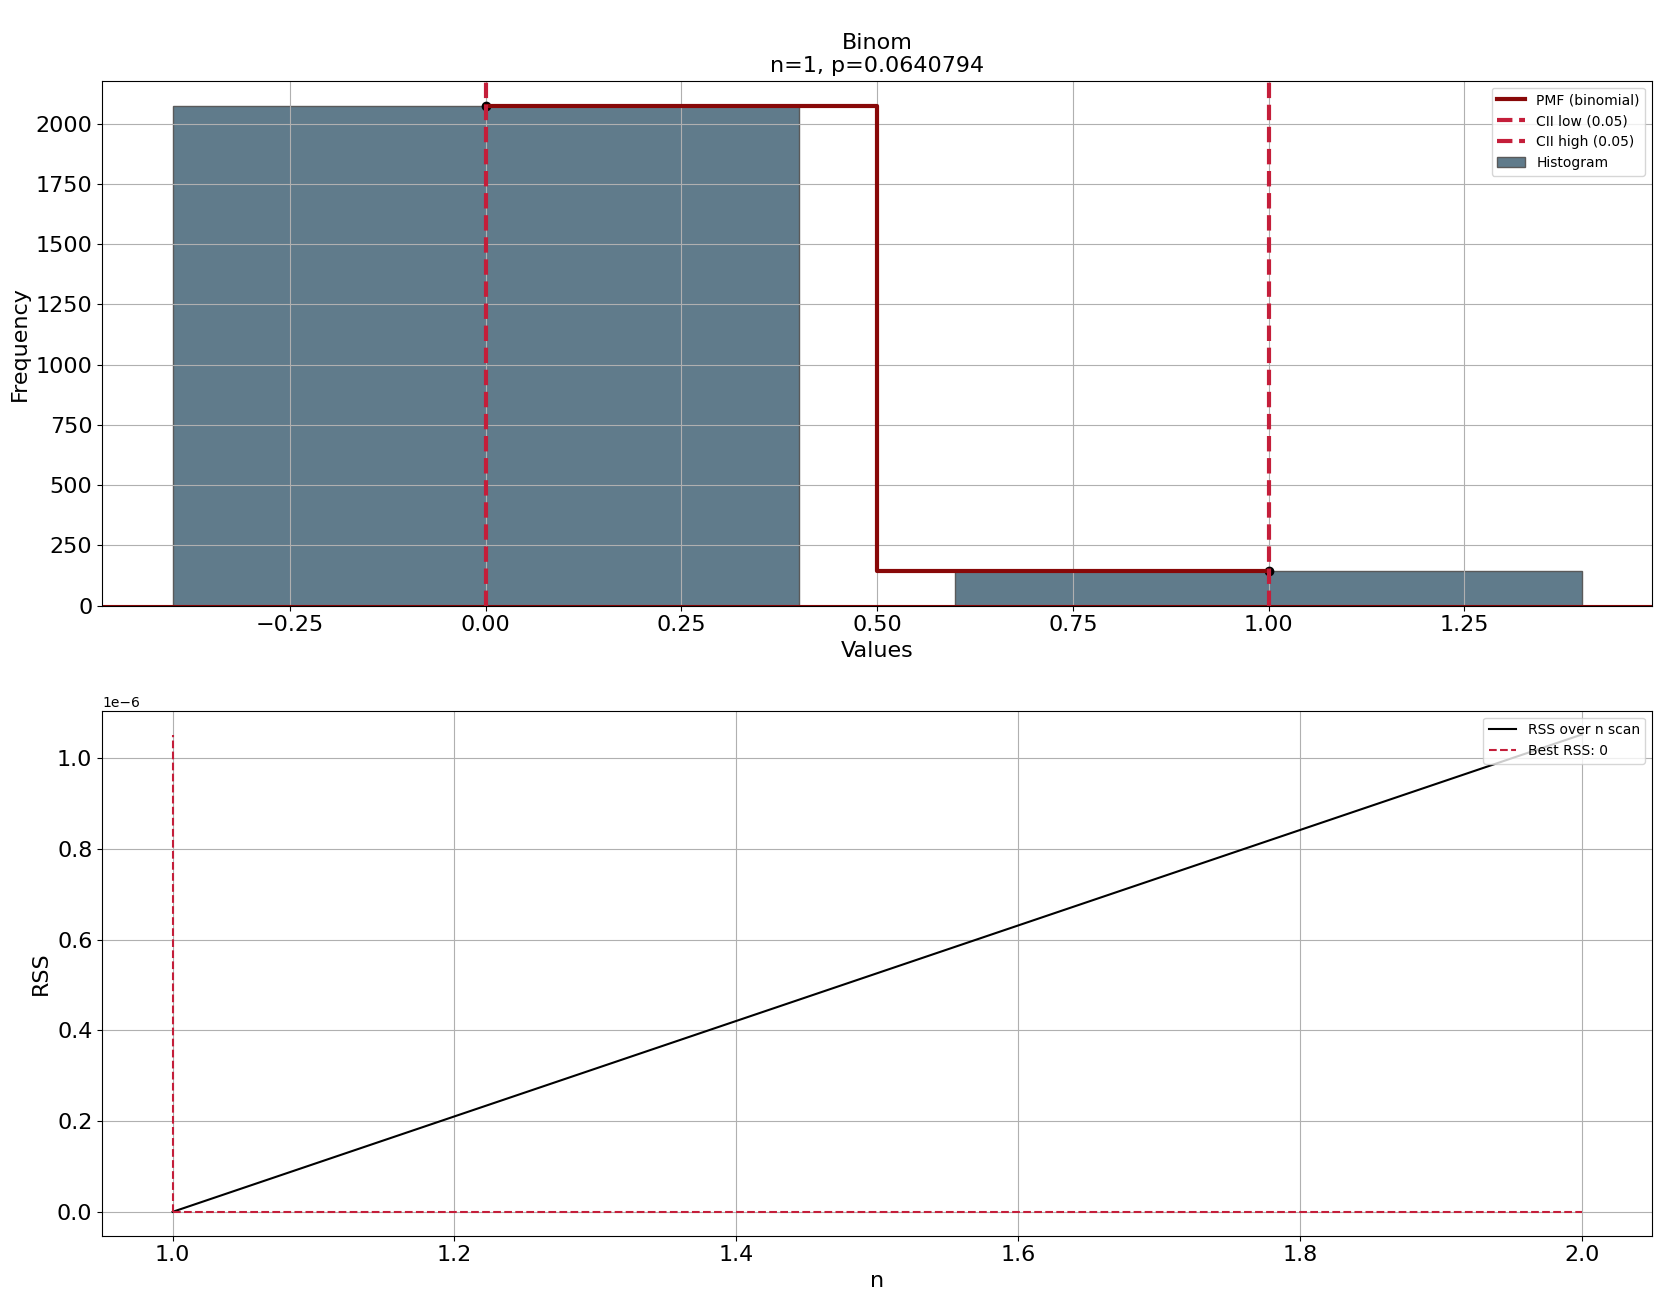

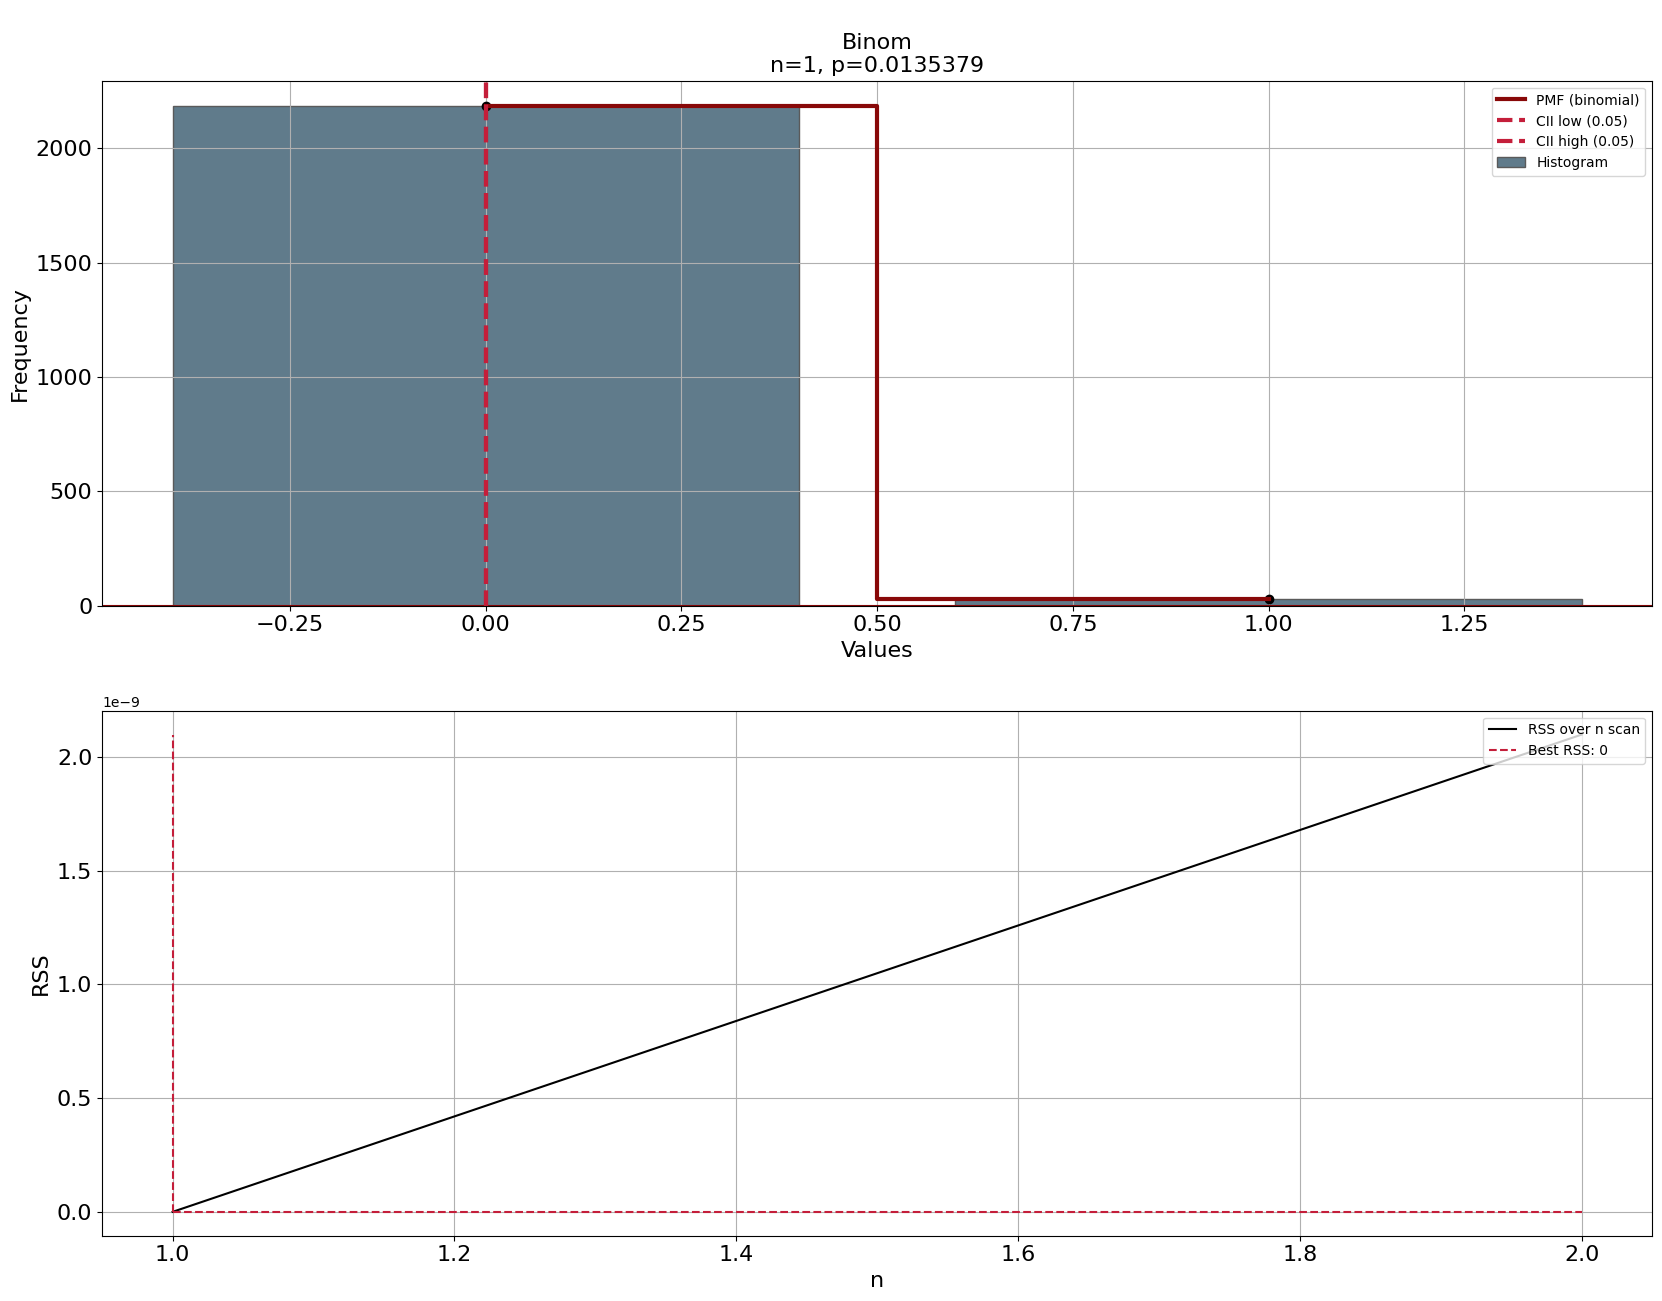

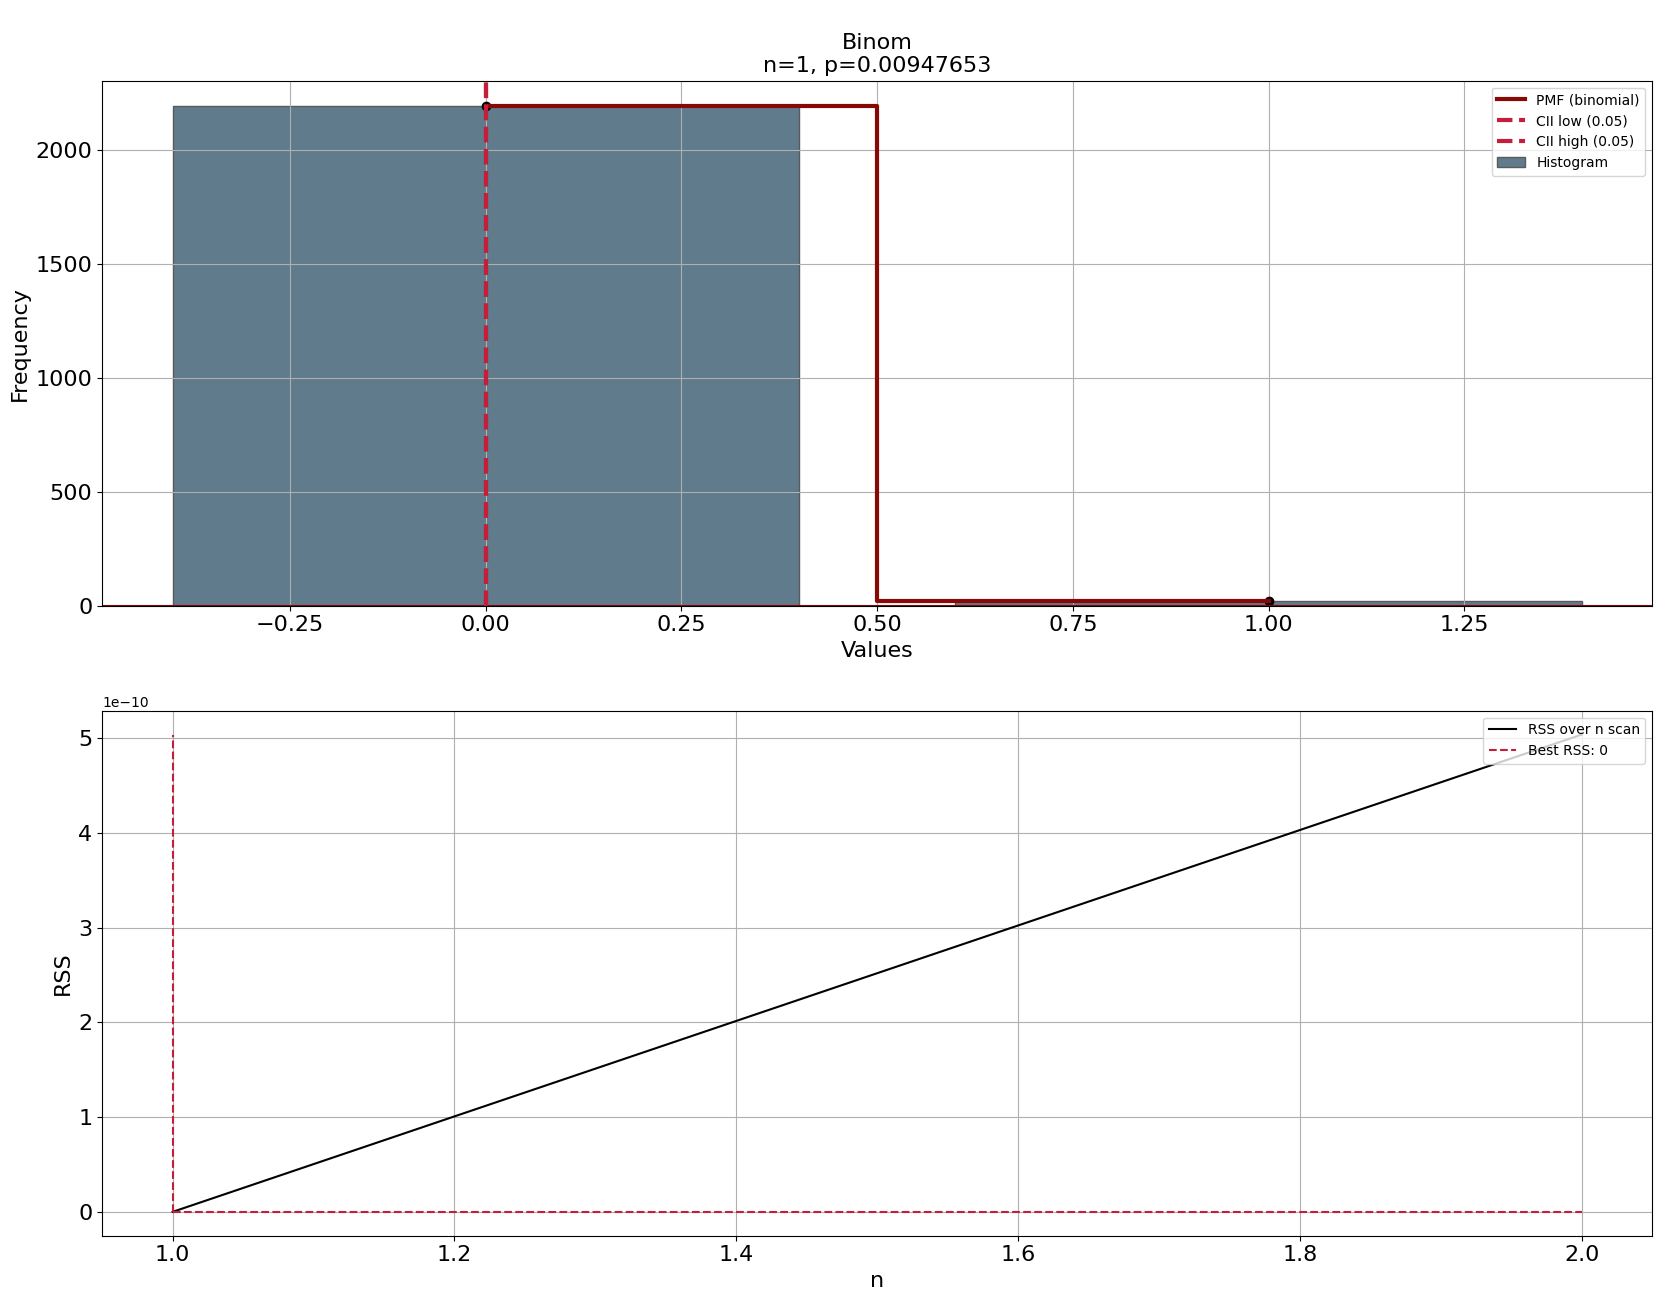

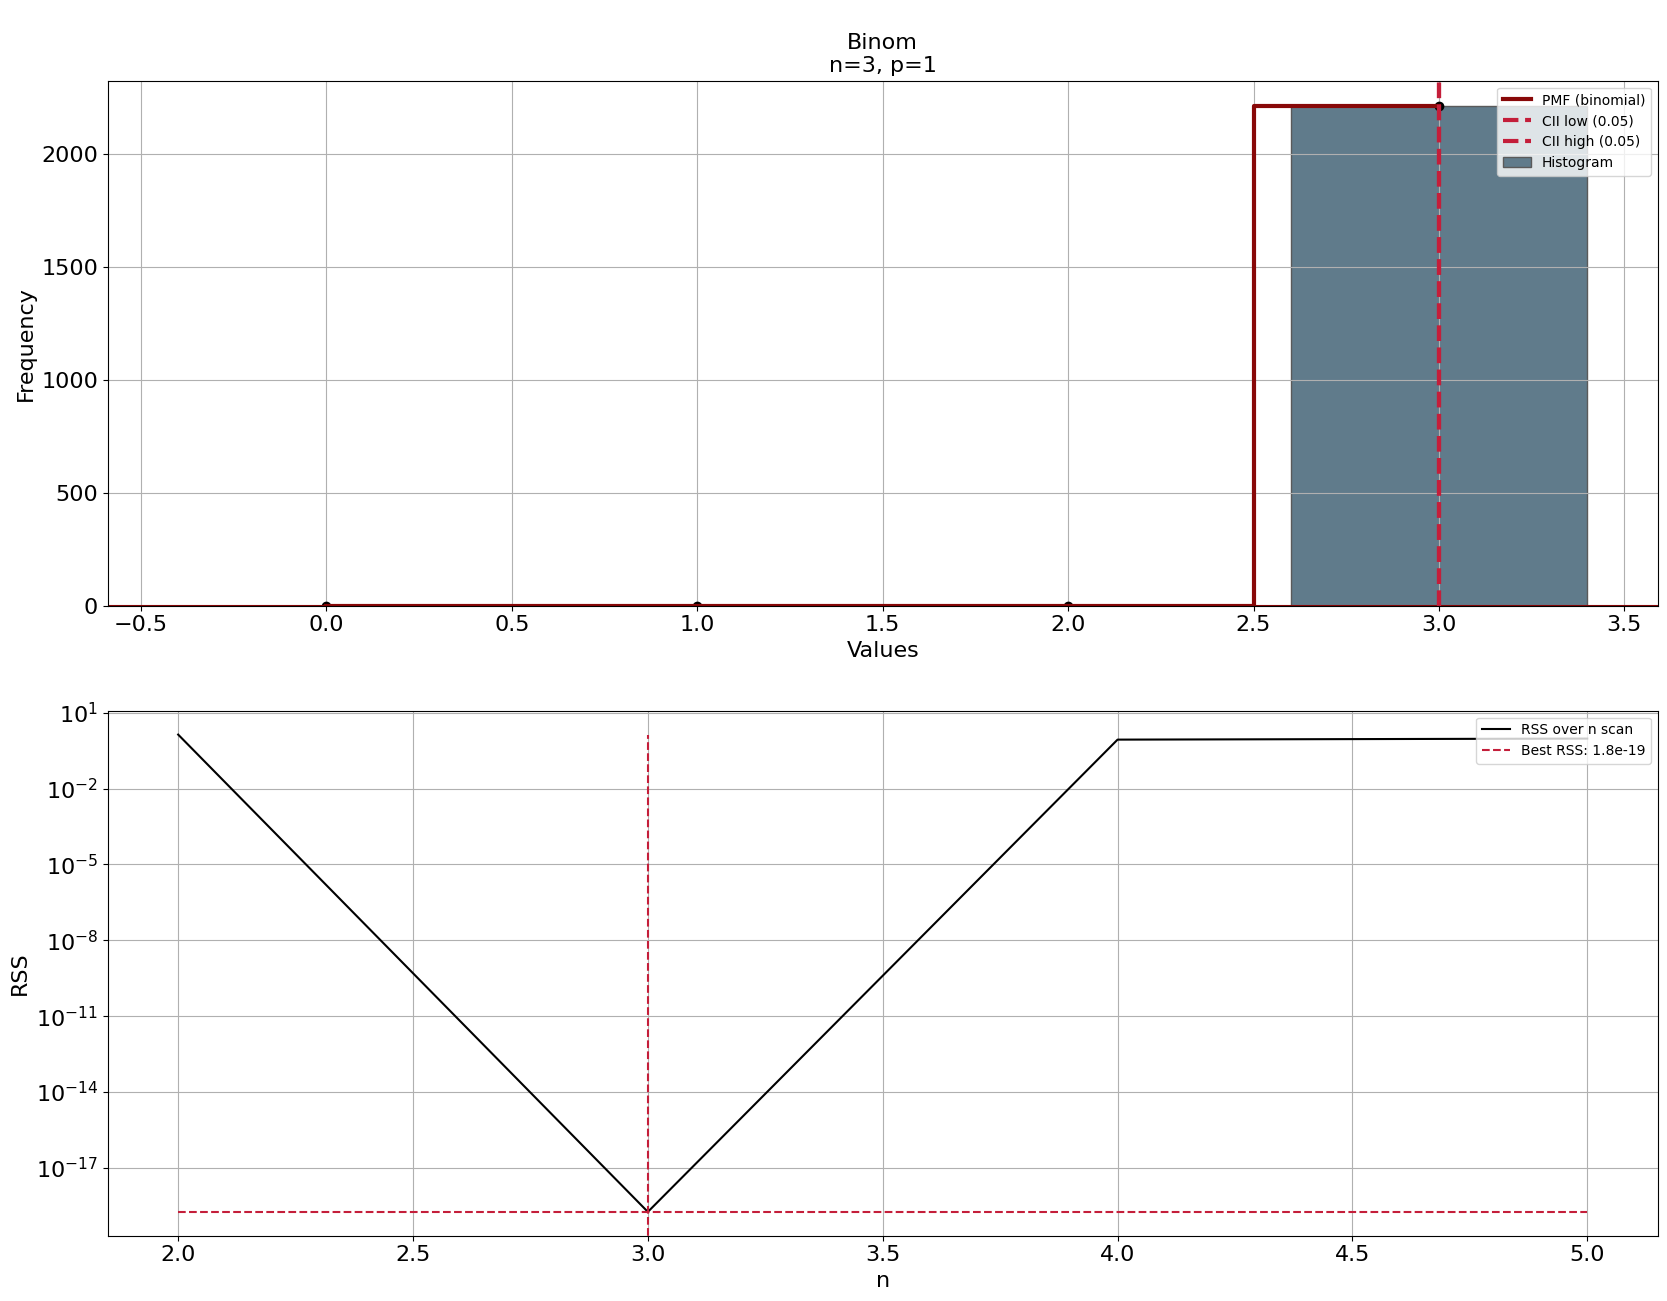

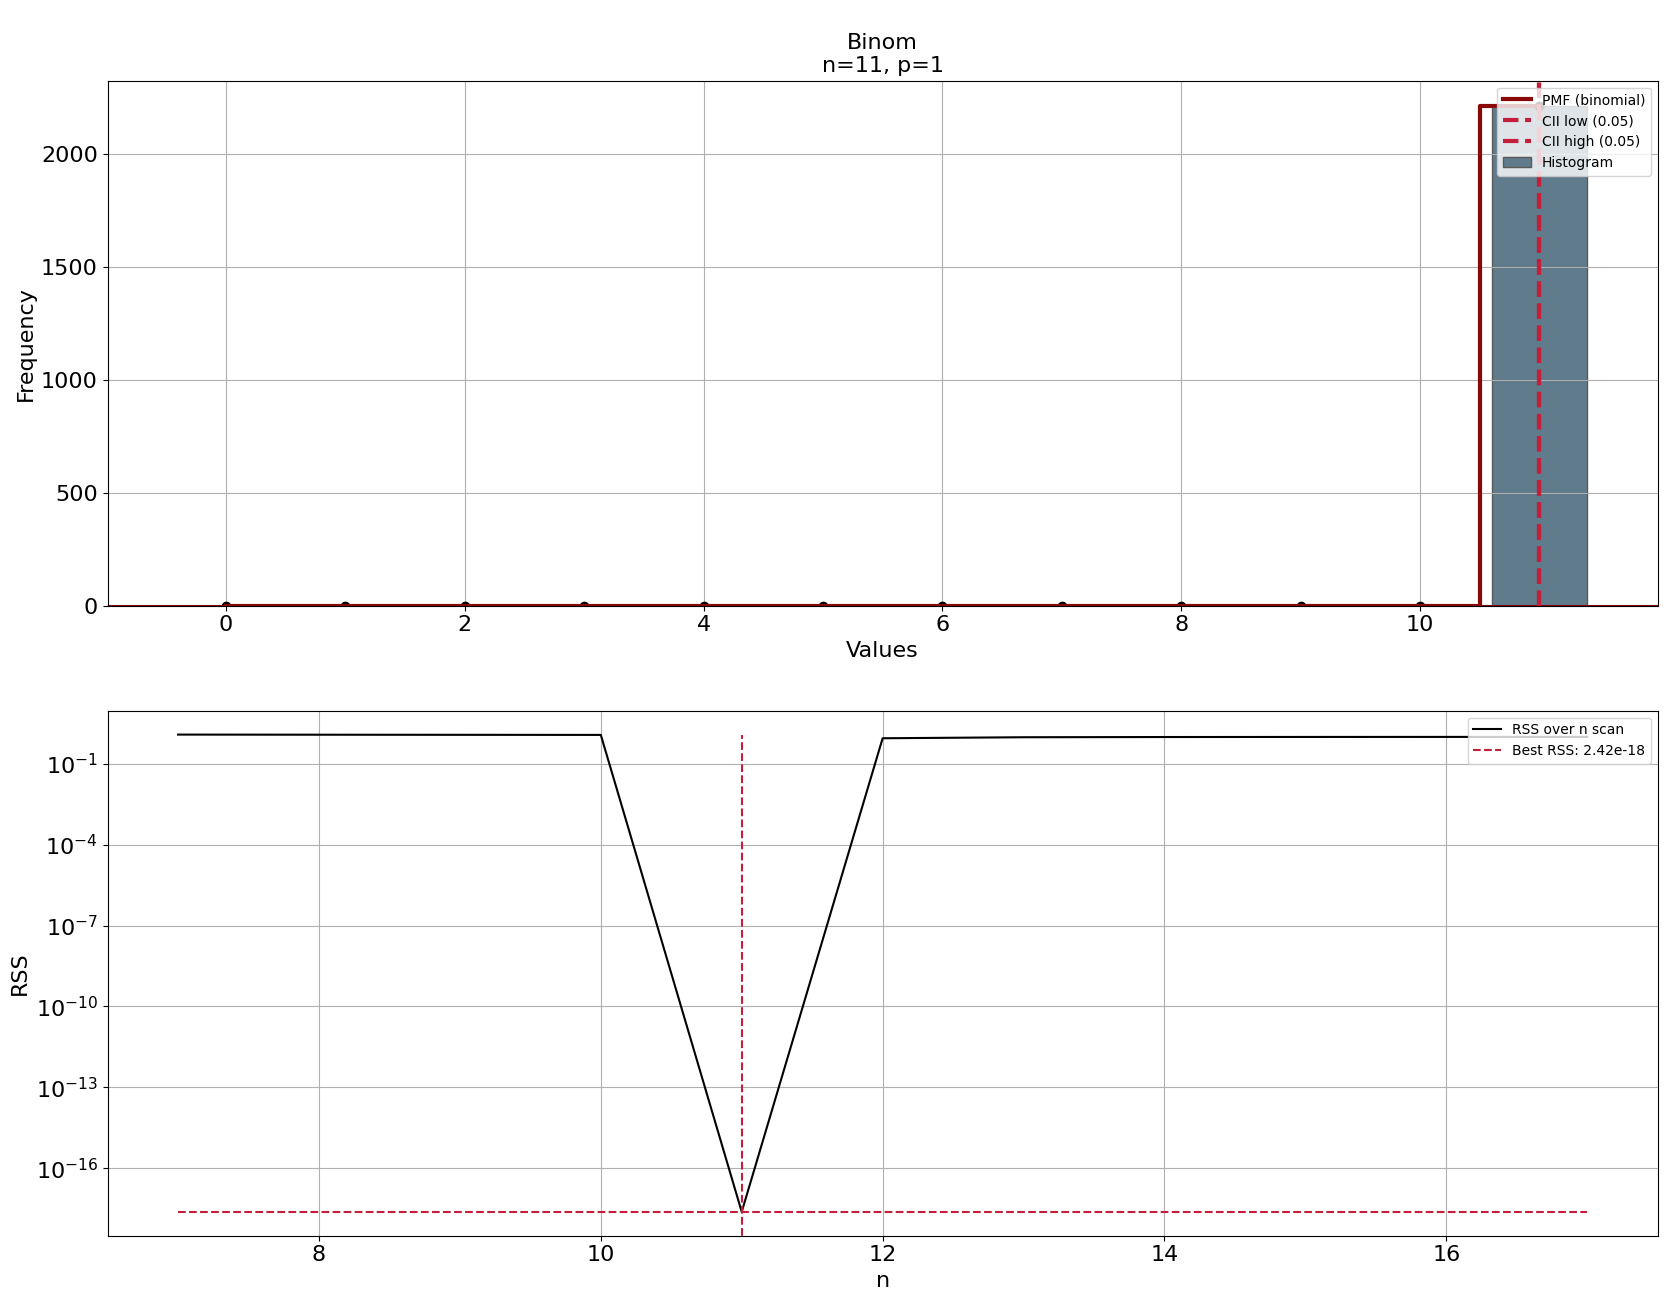

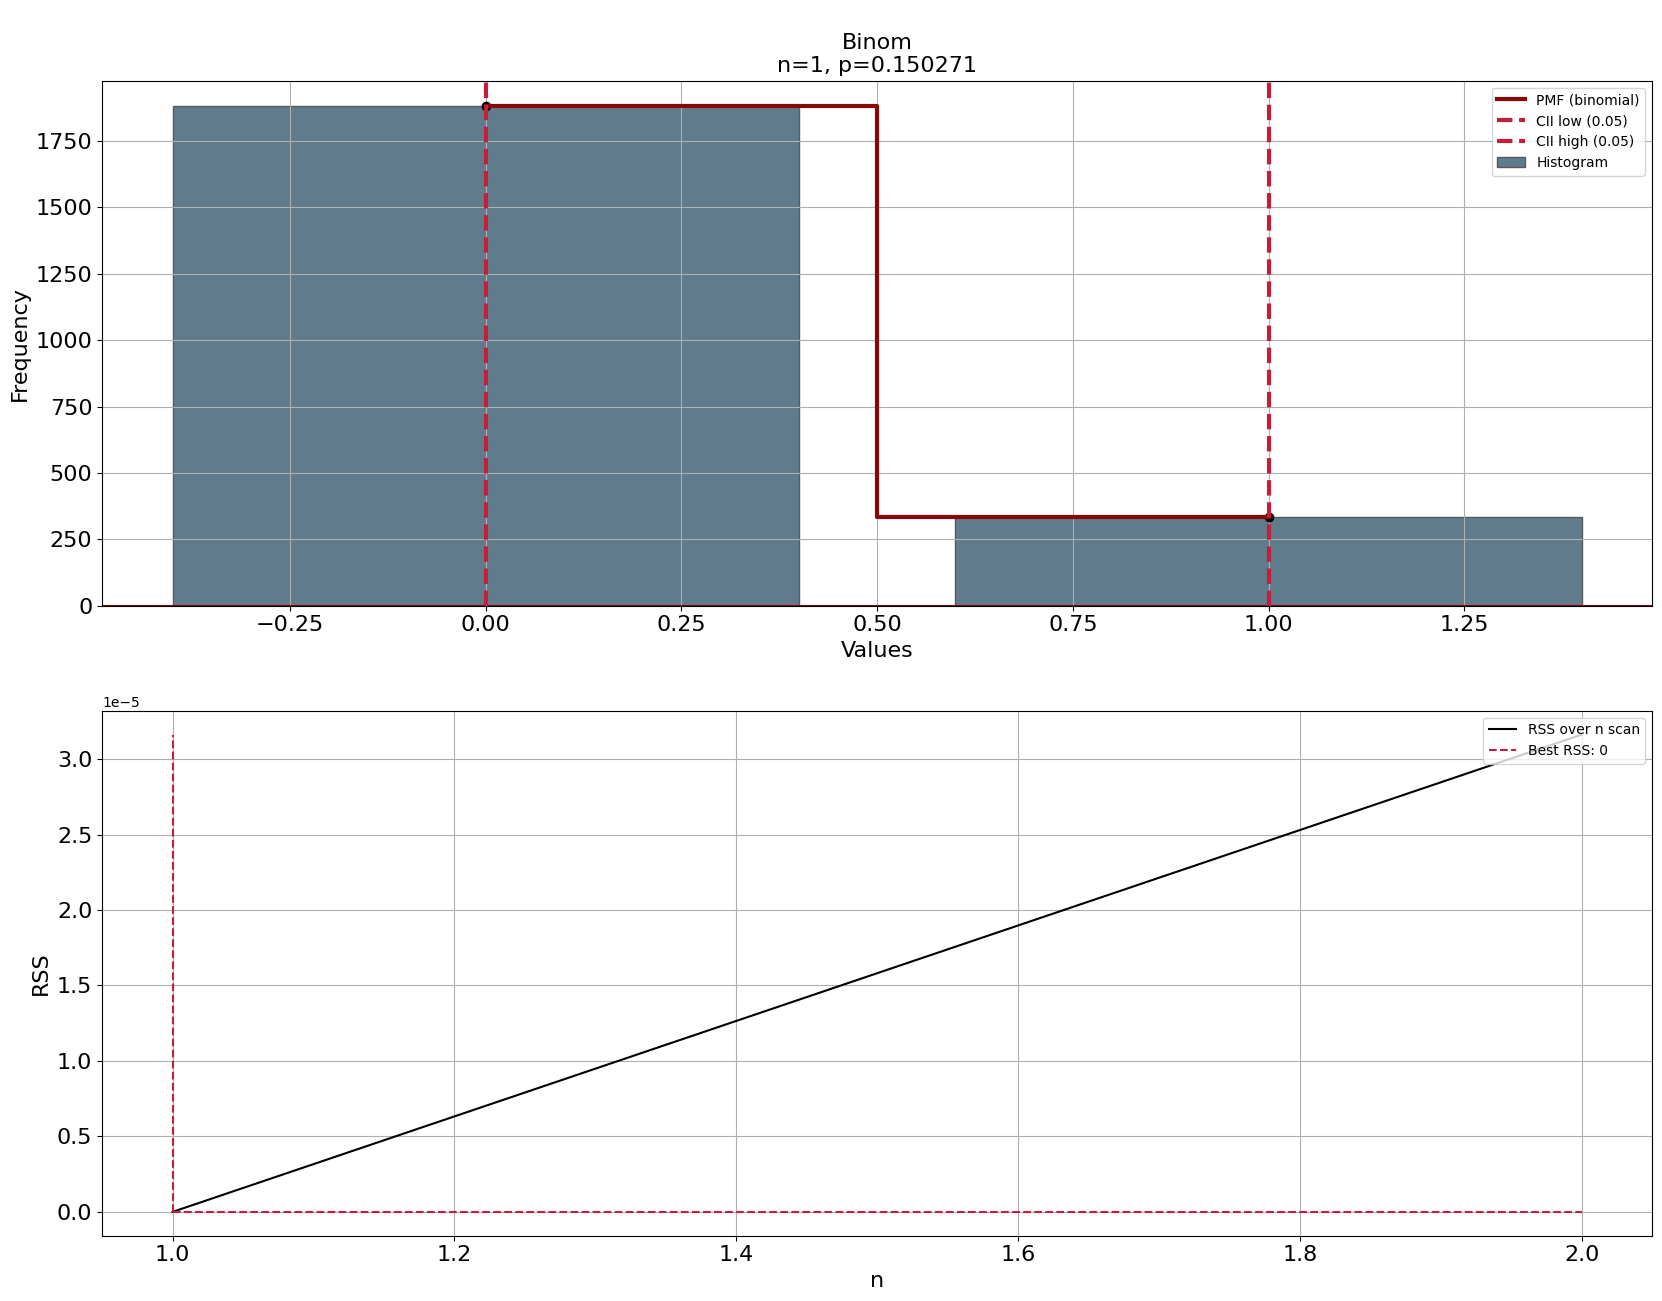

In [48]:
# Import library
from distfit import distfit

# Initialize 
dfit = distfit(method='discrete')  

for col in cat_columns:
    
    results = dfit.fit_transform(null_out_data[col])   # Fit distributions on empirical data X
    dfit.plot()             # Plot the best fitted distribution (y is included if prediction is made)
    results['model']
    
    


#### some pattern the library can not capture well, it was treat all as a bernoulli (binomial with n = 1 )

i treated to make with the discrete distributions as i did with the countious but i faced many problems.

### capturing the distributions by eye

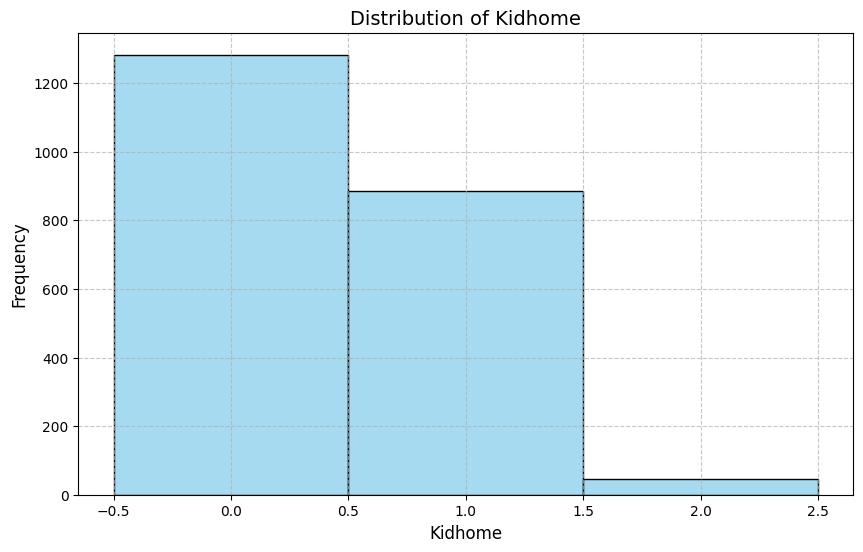

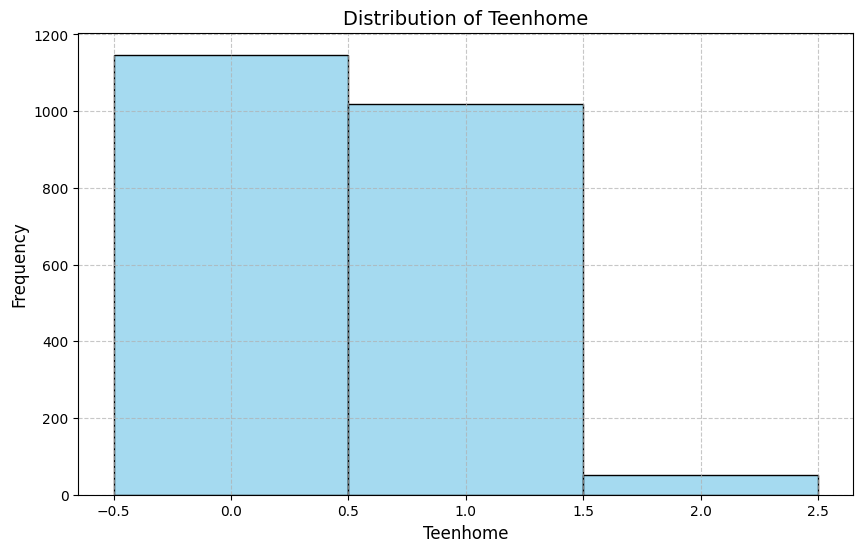

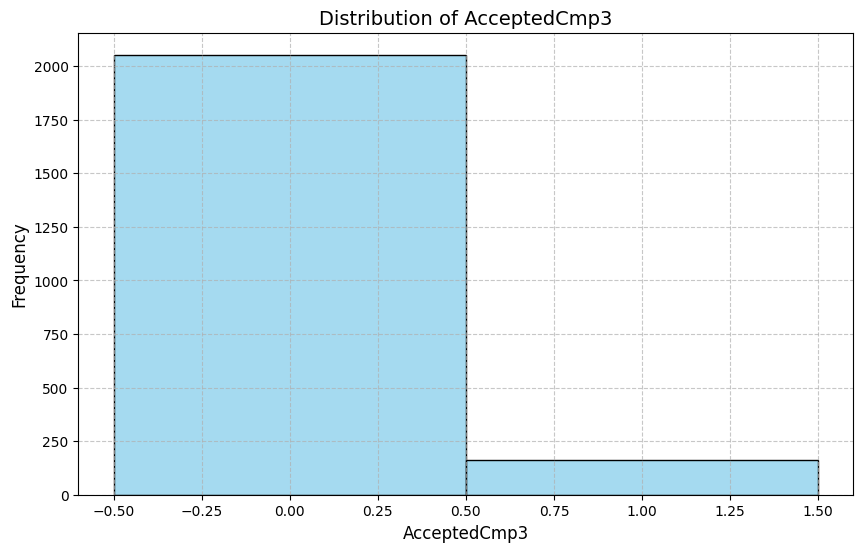

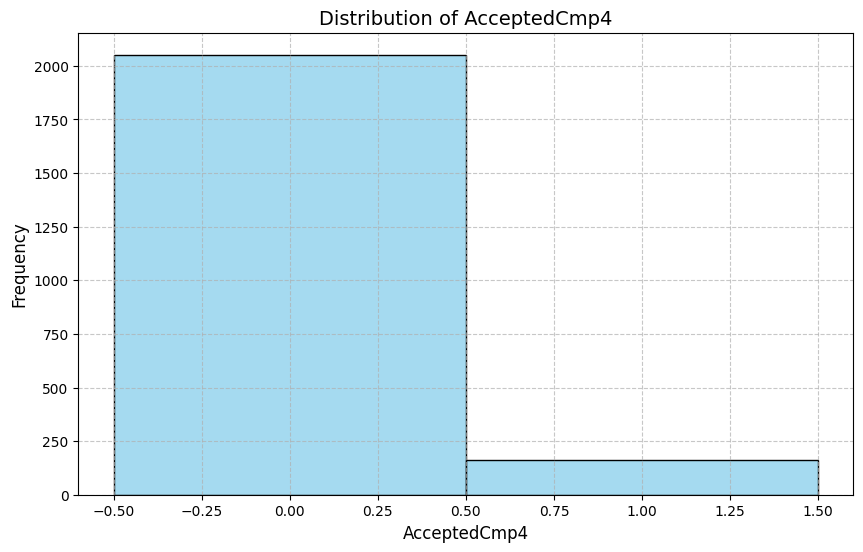

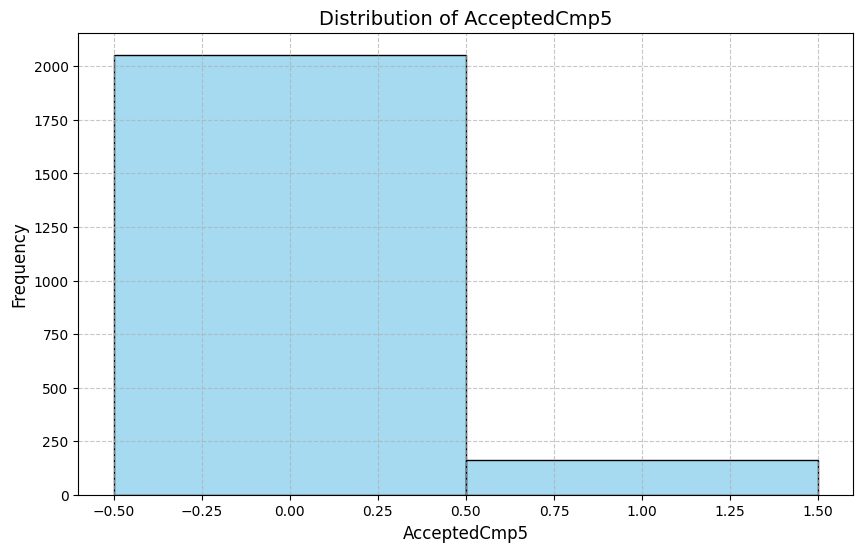

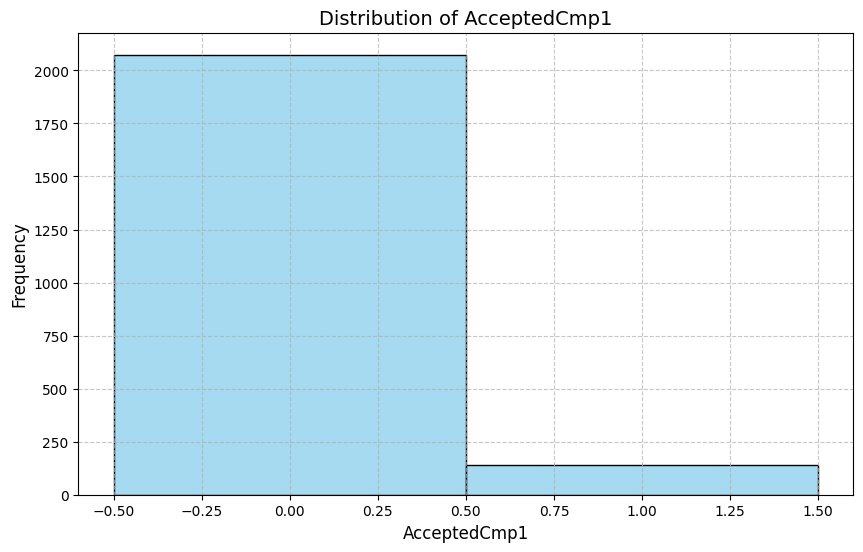

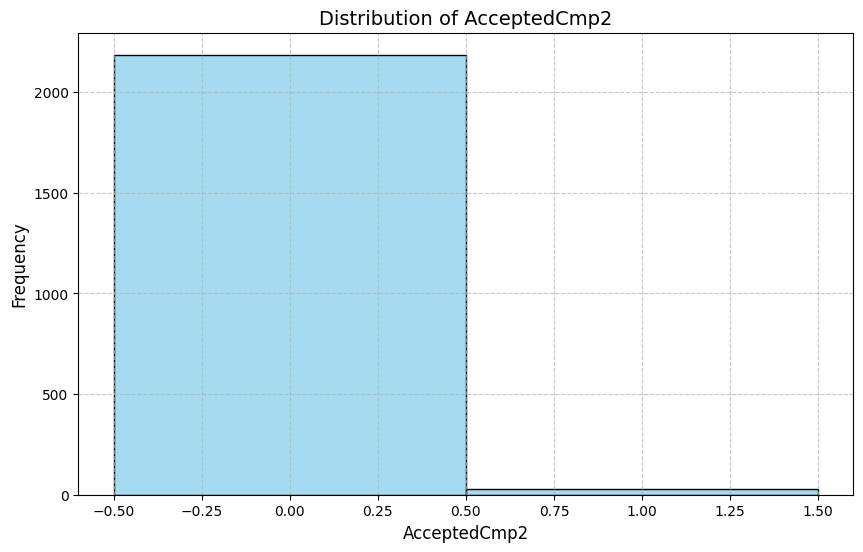

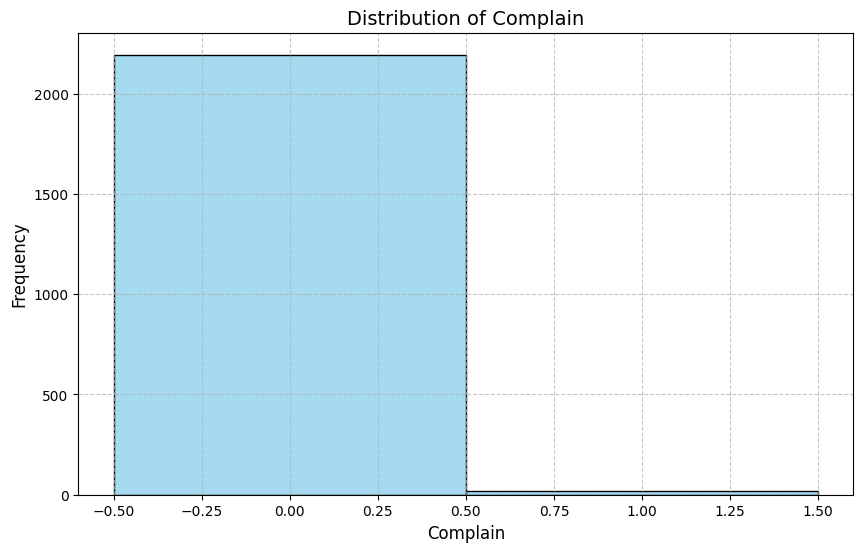

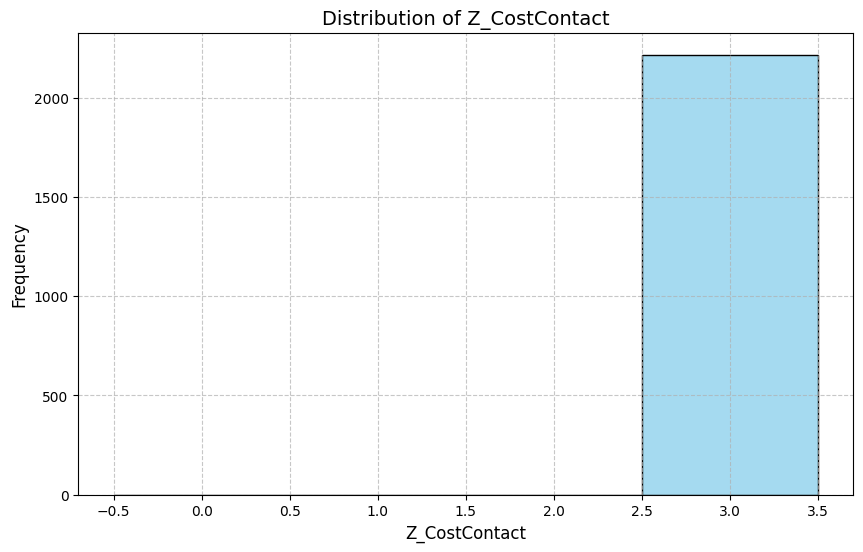

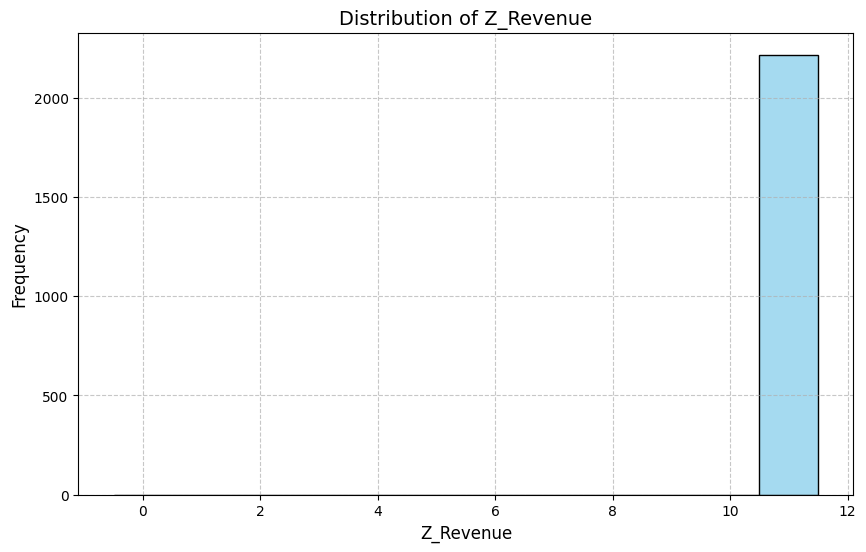

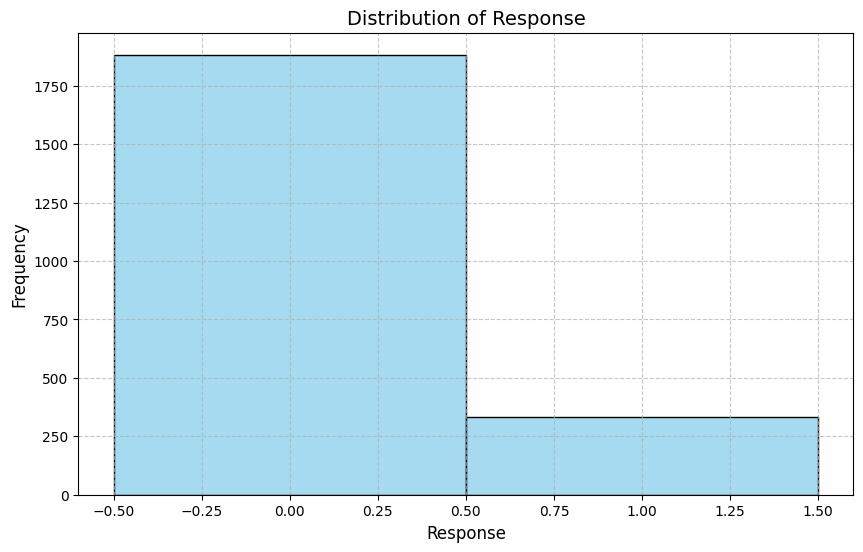

In [49]:
for feature_name in cat_columns:
    plt.figure(figsize=(10, 6))
    
    # Create the histogram
    sns.histplot(null_out_data[feature_name], 
                bins=np.arange(null_out_data[feature_name].max()+2)-0.5, 
                kde=False, 
                color='skyblue')
    
    # Add titles and labels
    plt.title(f'Distribution of {feature_name}', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add grid lines for readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.show()


### that is fine for now, if we want to discover more we will come to here again and again.